In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [3]:
df.drop(['ID'],axis=1,inplace=True)

In [4]:
df.shape

(418, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

## Checking for percentage of null data in each column

In [7]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

## Checking for duplicate data

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

## Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


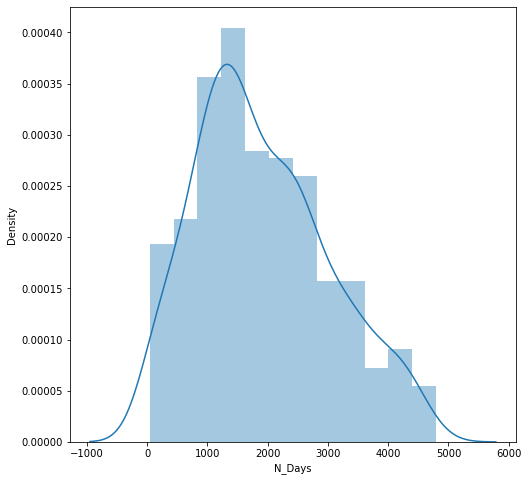

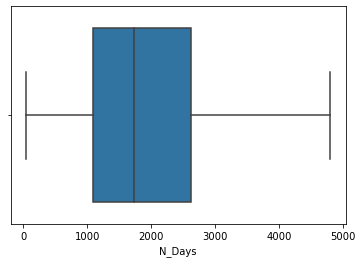

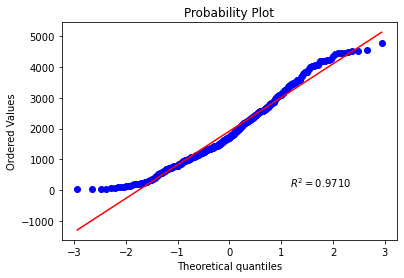

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


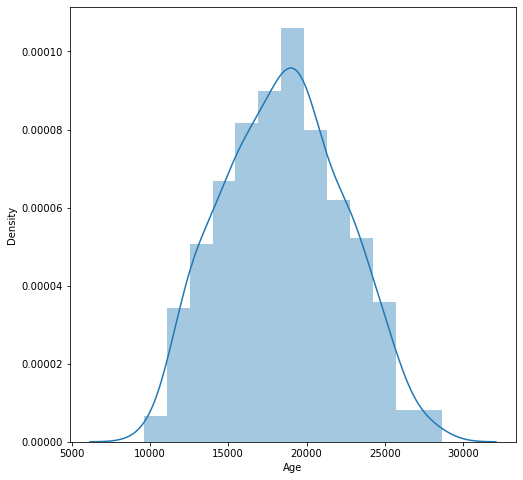

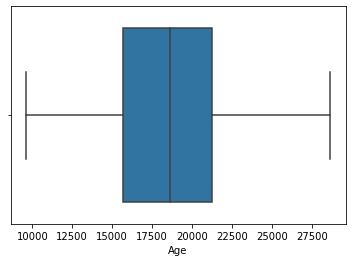

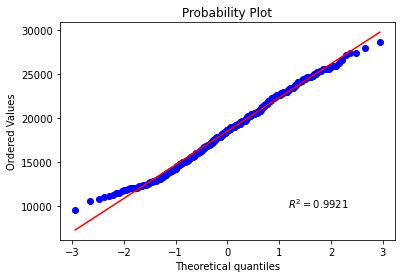

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


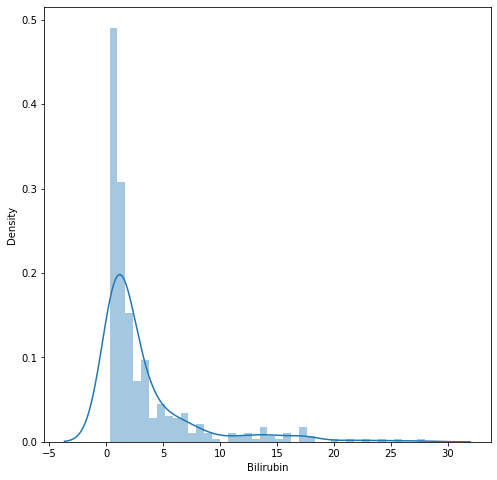

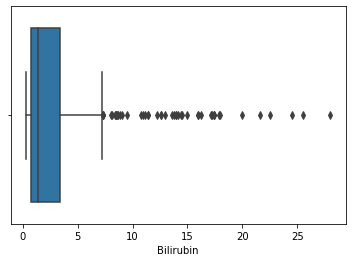

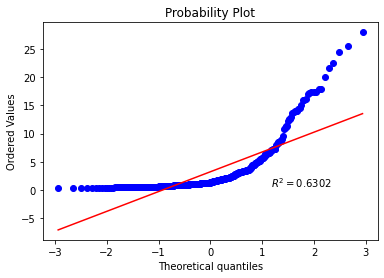

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


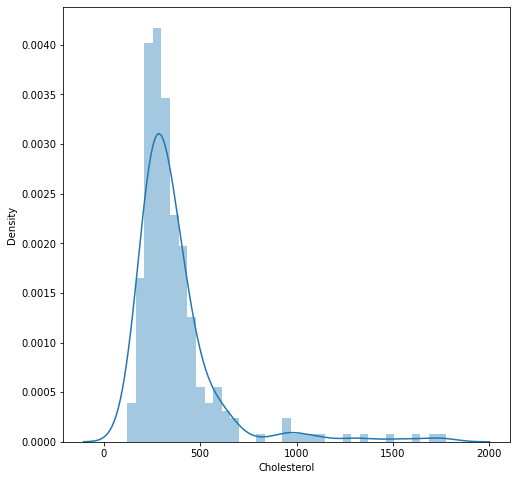

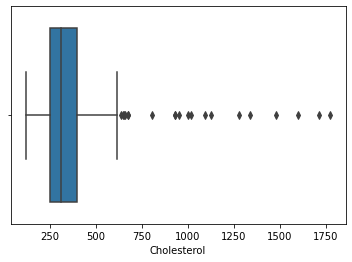

posx and posy should be finite values
posx and posy should be finite values


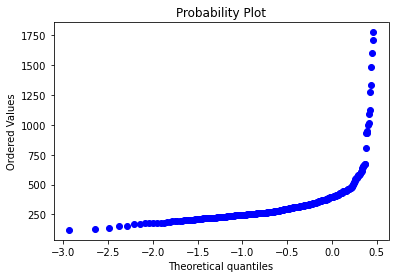

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


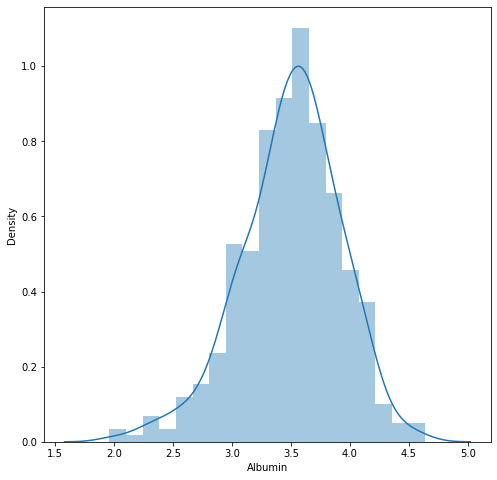

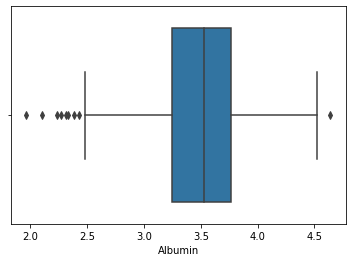

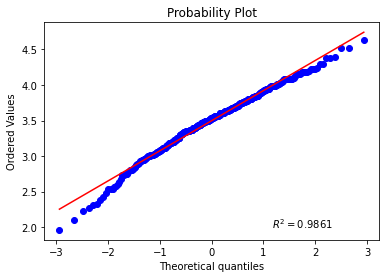

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


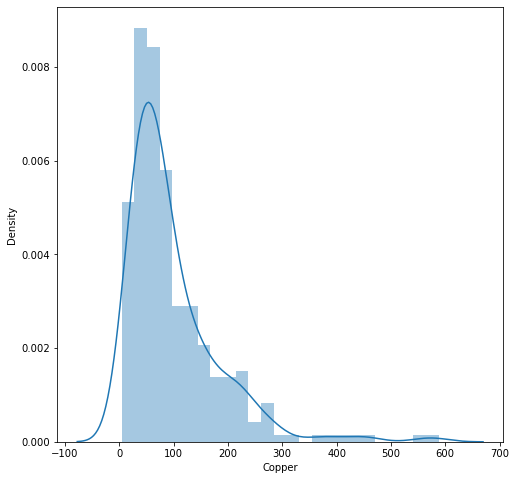

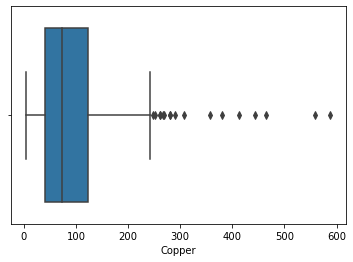

posx and posy should be finite values
posx and posy should be finite values


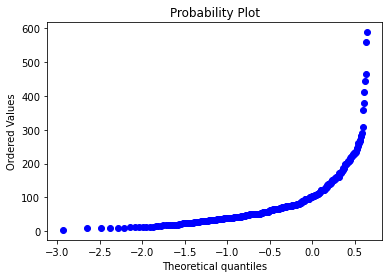

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


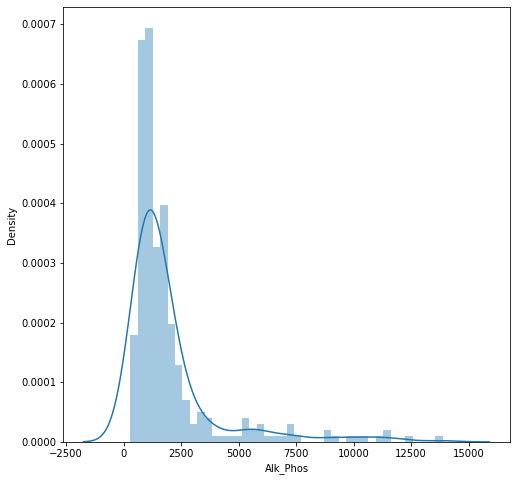

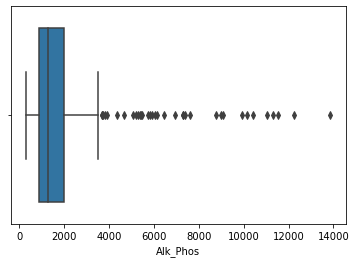

posx and posy should be finite values
posx and posy should be finite values


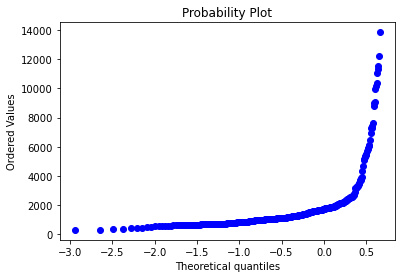

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


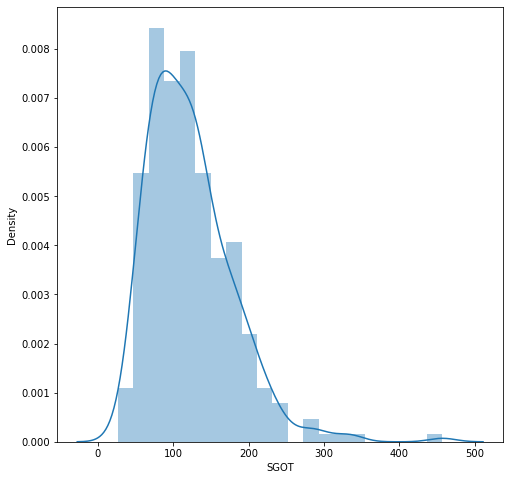

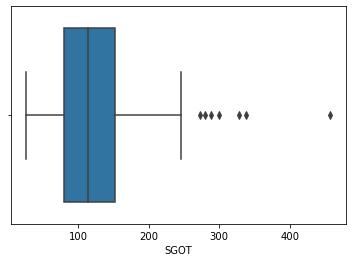

posx and posy should be finite values
posx and posy should be finite values


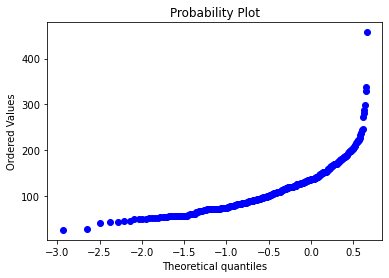

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


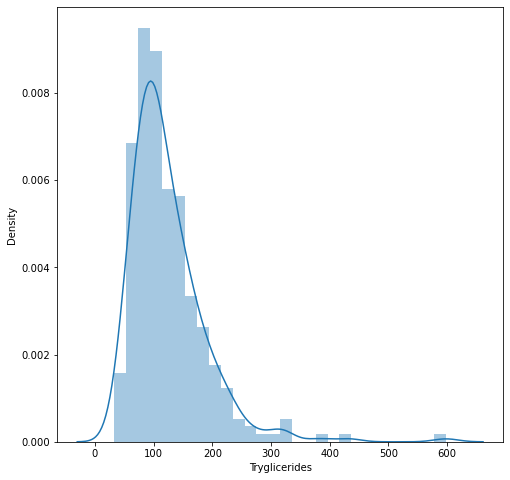

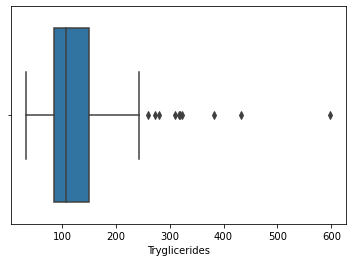

posx and posy should be finite values
posx and posy should be finite values


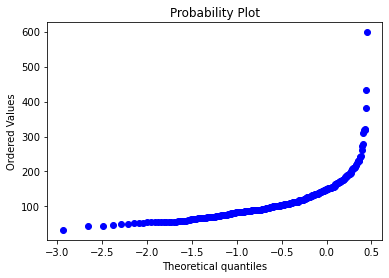

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


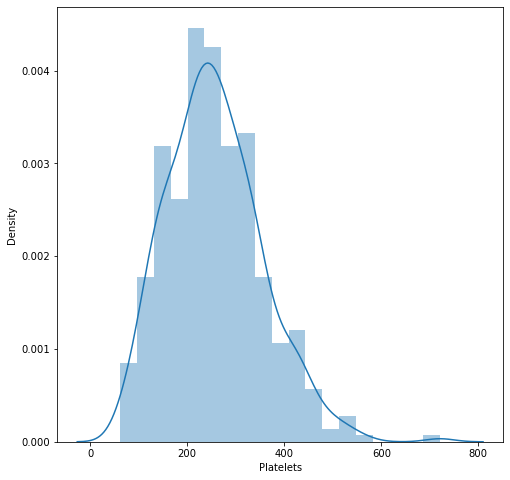

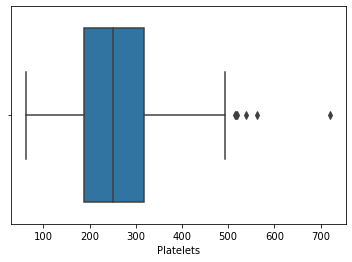

posx and posy should be finite values
posx and posy should be finite values


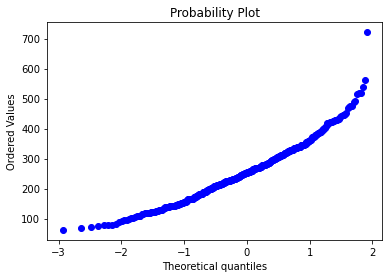

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


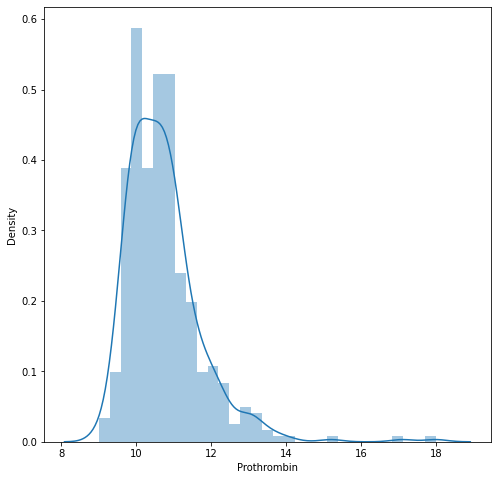

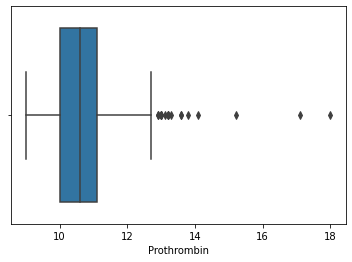

posx and posy should be finite values
posx and posy should be finite values


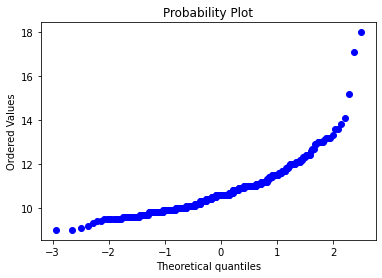

----------------------------


In [9]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [10]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

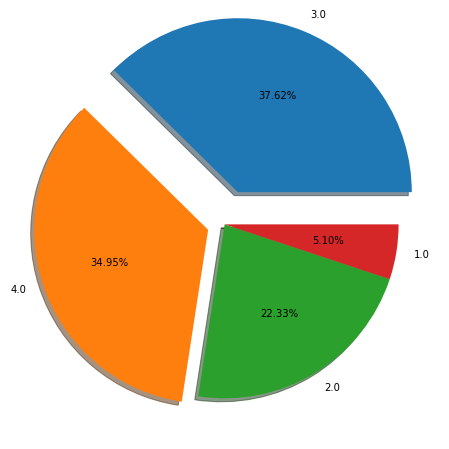

In [11]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

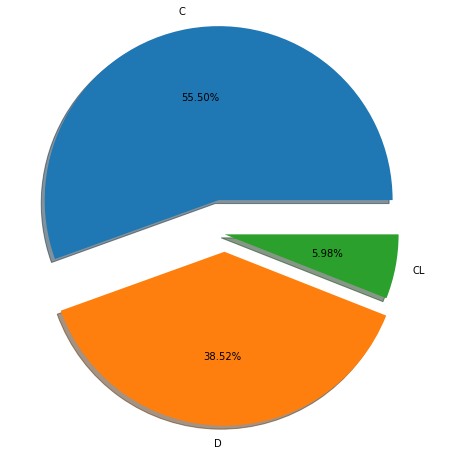

In [12]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

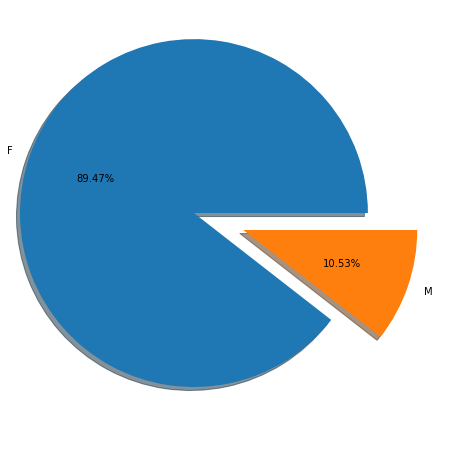

In [13]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

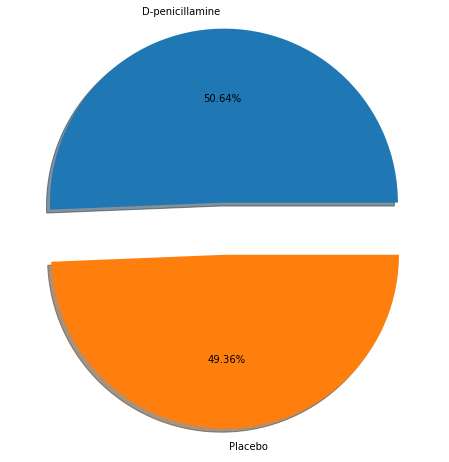

In [14]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

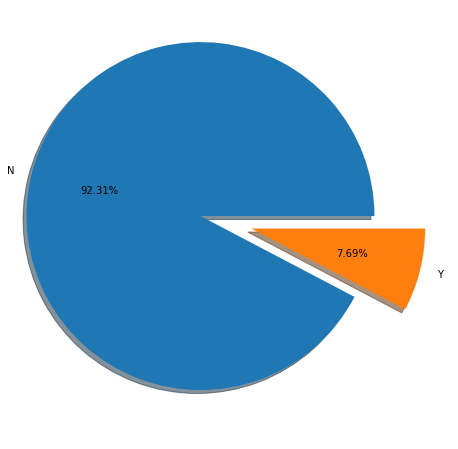

In [15]:
pie_chart(df,'Ascites')

## Only a tiny fraction of the population of patients had Ascites disease.

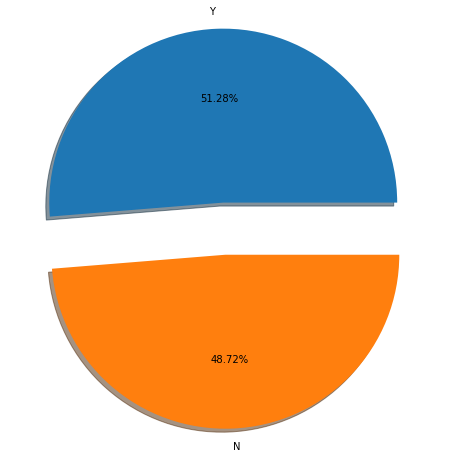

In [16]:
pie_chart(df,'Hepatomegaly')

## The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

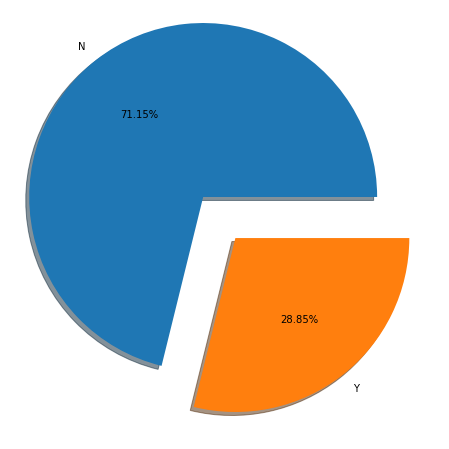

In [17]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

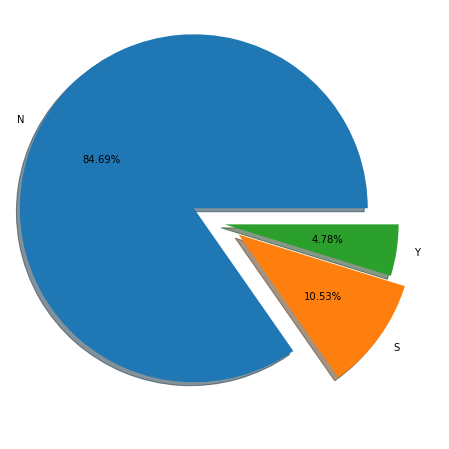

In [18]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of 
just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

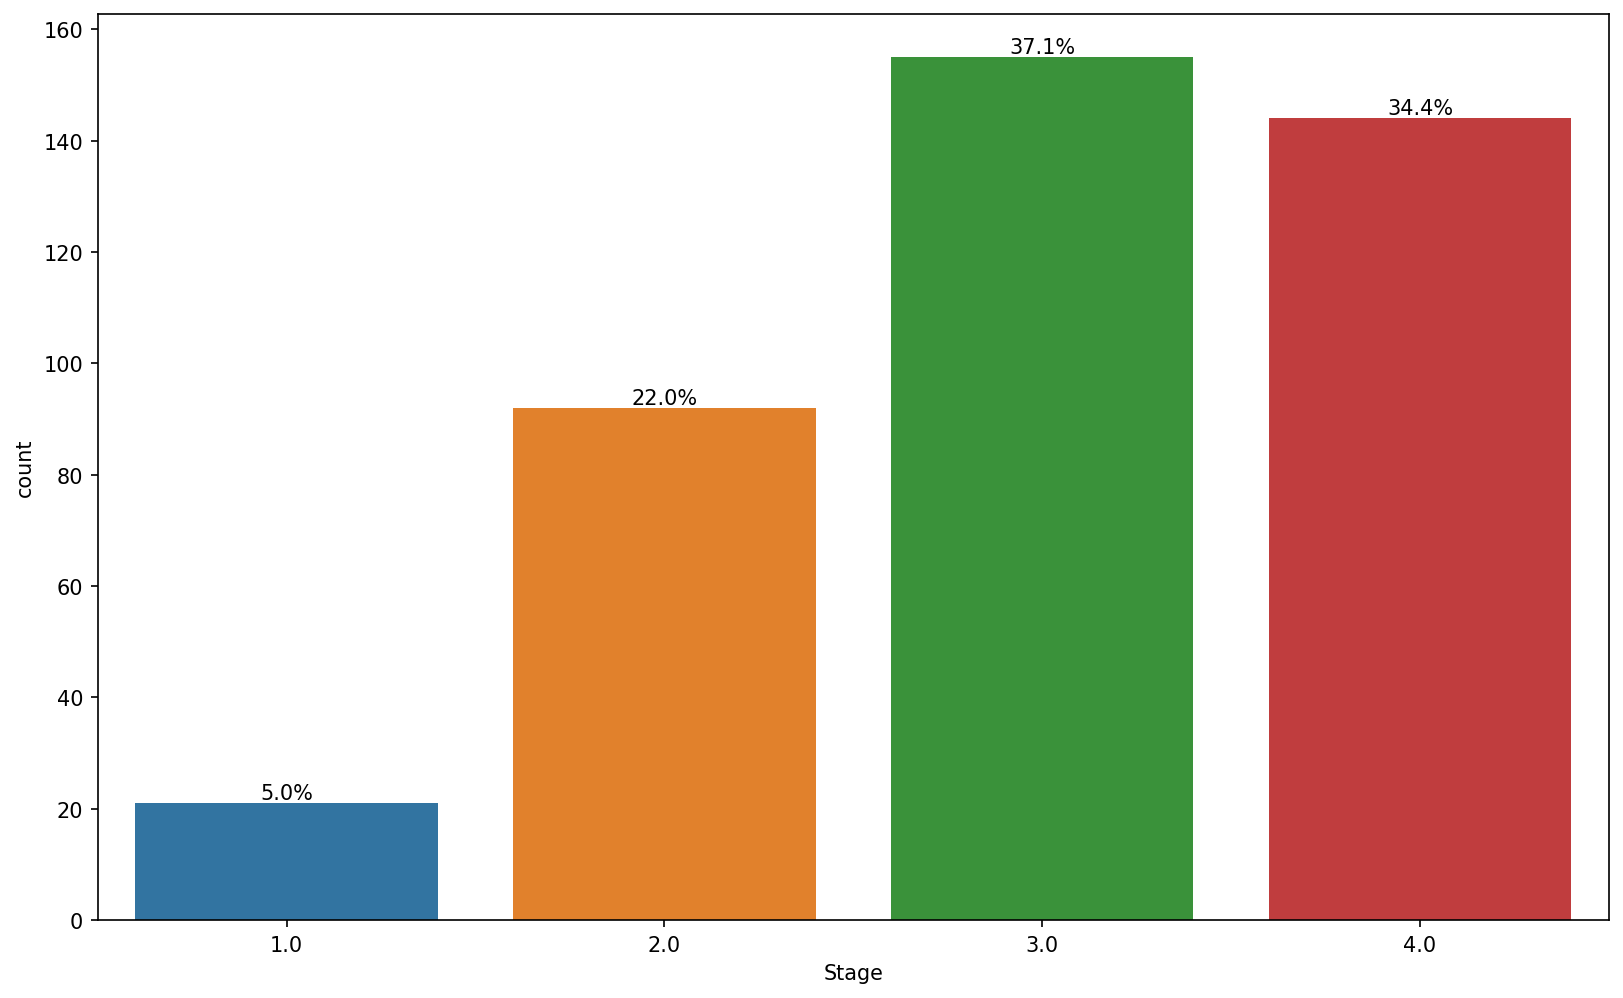

In [19]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class. 

## Bivariate Analysis

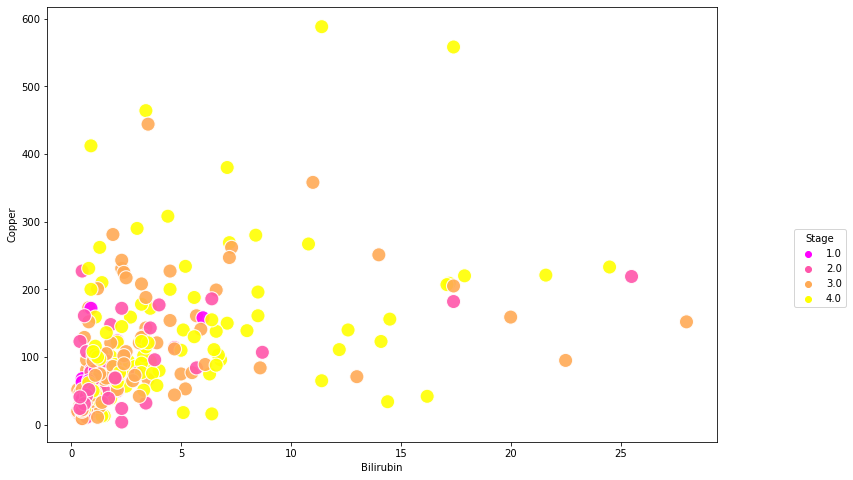

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [21]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [22]:
males.describe()

N_Days           Age  Bilirubin  Cholesterol    Albumin  \
count    44.000000     44.000000  44.000000    35.000000  44.000000   
mean   1894.022727  20348.340909   2.865909   362.457143   3.535000   
std    1213.034356   4009.641699   2.319477   178.993319   0.456598   
min     140.000000  12227.000000   0.600000   151.000000   2.270000   
25%    1060.750000  17886.000000   1.300000   245.000000   3.327500   
50%    1507.000000  19724.000000   2.050000   317.000000   3.645000   
75%    2715.750000  23588.750000   3.500000   426.500000   3.870000   
max    4459.000000  28650.000000   9.500000  1000.000000   4.300000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   36.000000     36.000000   36.000000      35.000000   43.000000   
mean   154.277778   2172.950000  121.990556     133.428571  231.139535   
std    100.665389   2418.446239   47.013095      52.168441   85.225634   
min     13.000000    516.000000   46.500000      49.000000   70.000000   
25%     80.750000    852.000000   82.770000      91.000000  165.500000   
50%    134.500000   1116.000000  121.675000     126.000000  217.000000   
75%    211.750000   2313.000000  153.450000     163.000000  298.500000   
max    444.000000  10396.800000  221.880000     242.000000  394.000000   

       Prothrombin      Stage  
count    44.000000  44.000000  
mean     10.940909   3.068182  
std       0.931445   0.925045  
min       9.700000   1.000000  
25%      10.275000   2.750000  
50%      10.900000   3.000000  
75%      11.225000   4.000000  
max      14.100000   4.000000

In [23]:
females.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [24]:
round(males.Status.value_counts() / len(males) * 100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [25]:
round(females.Status.value_counts() / len(females) * 100,2)

C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [26]:
round(males.Stage.value_counts() / len(males) * 100,2)

4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: Stage, dtype: float64

In [27]:
round(females.Stage.value_counts() / len(females) * 100,2)

3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [28]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Y    47.73
N    34.09
Name: Hepatomegaly, dtype: float64

In [29]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

Male patients are more likely to suffer from Hepatomegaly disease in comparison to female patients.

## Multivariate Analysis

<AxesSubplot:>

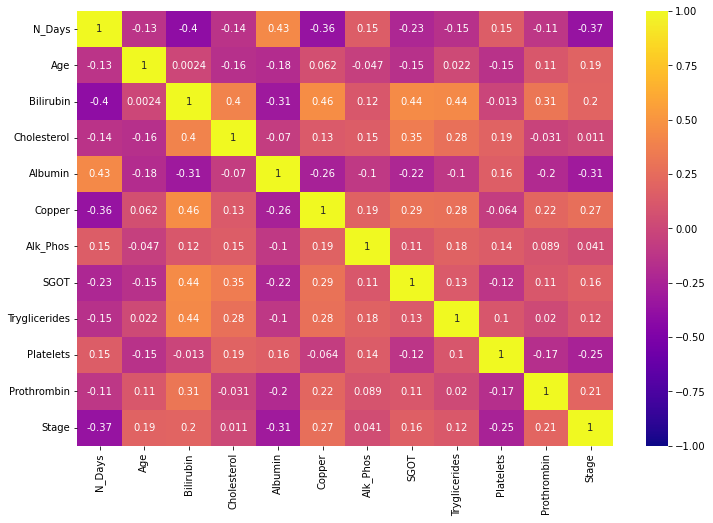

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

There are no major correlations between any pair of features in the dataset.

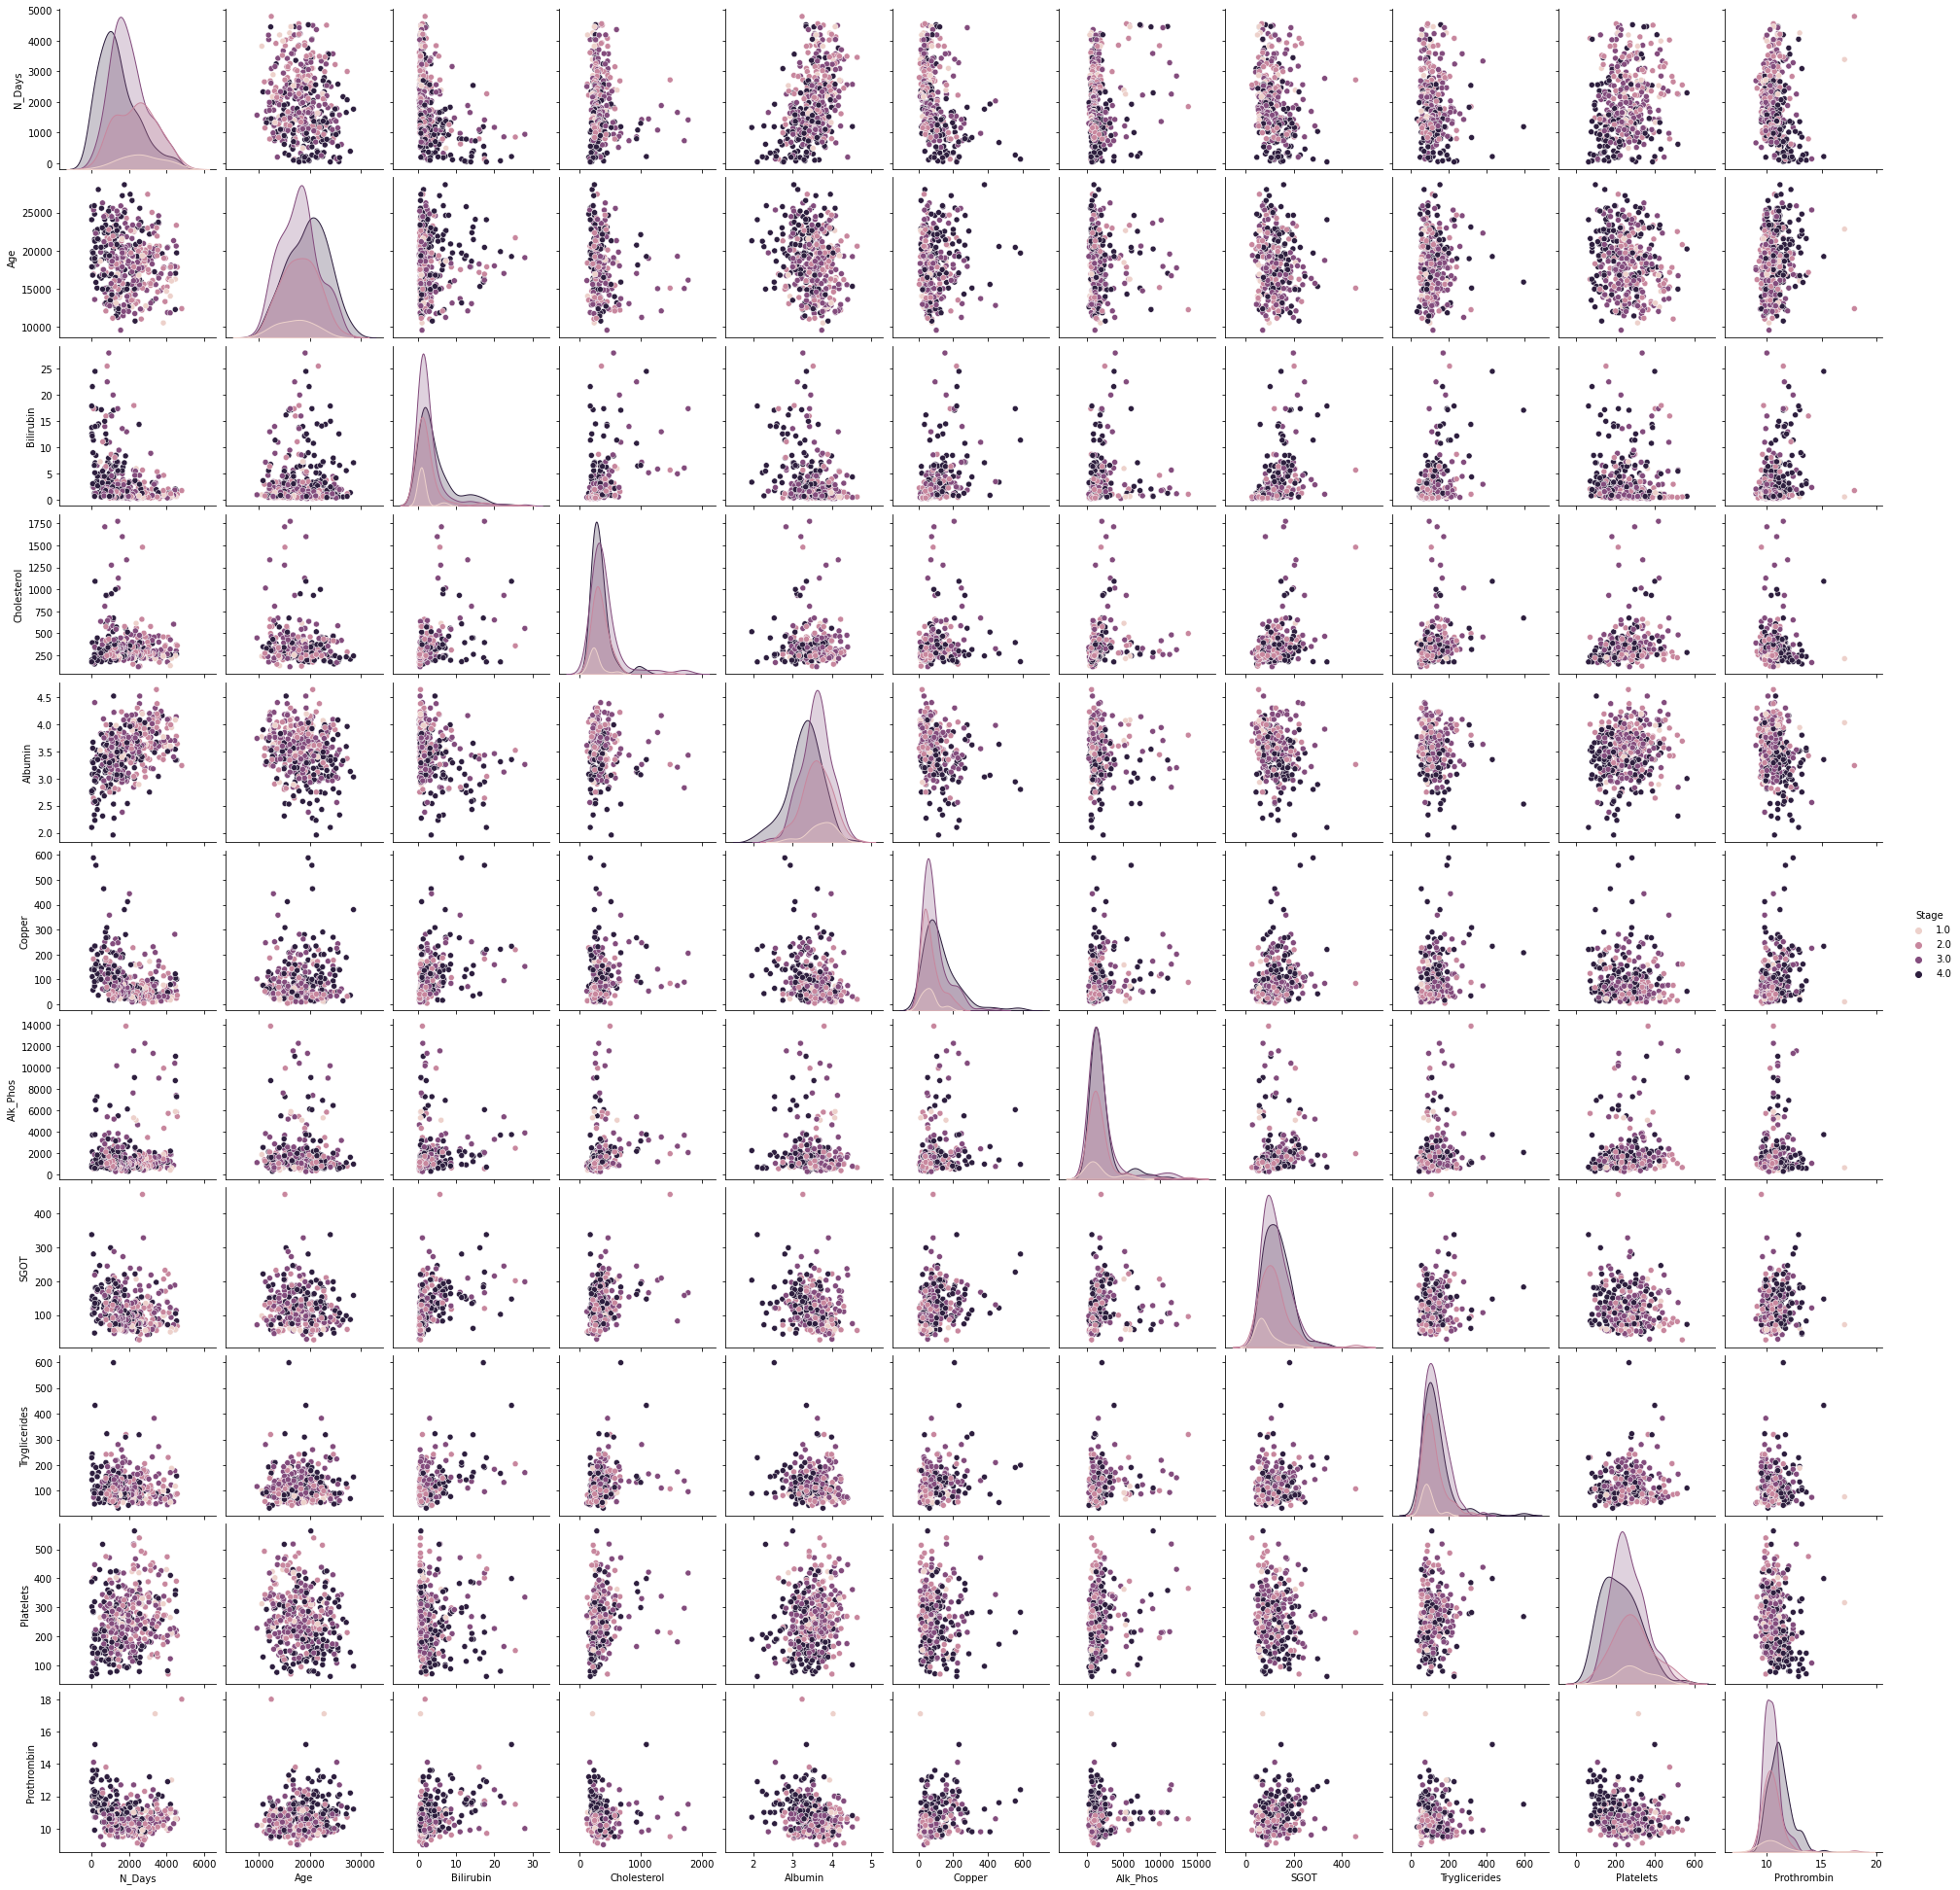

In [31]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

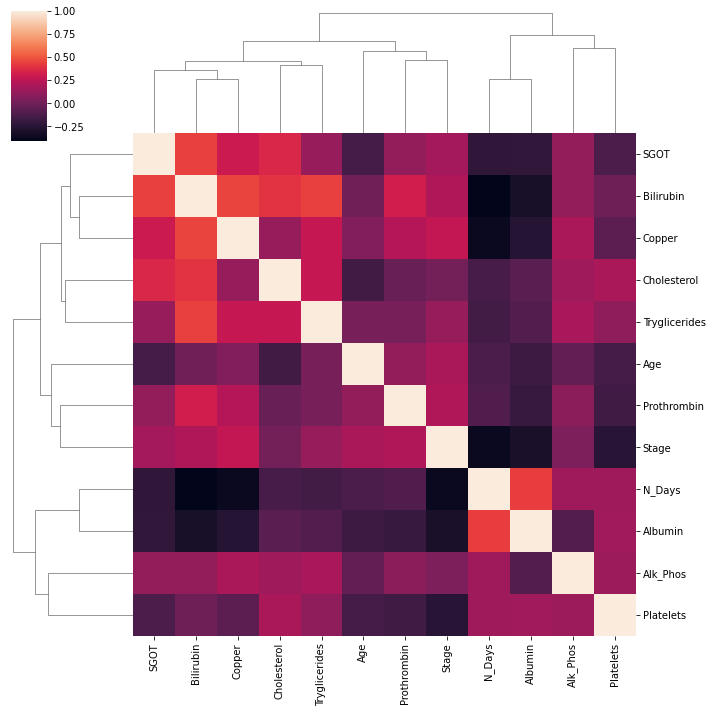

In [32]:
sns.clustermap(df.corr())

## Feature Engineering

In [33]:
df.Age = (df.Age.values/365.0).round()
df.head()

N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

### Imputation of missing values

In [34]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

### Treatment of outliers

In [35]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

### Encoding of categorical features

In [36]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [37]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

## Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [38]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

<AxesSubplot:xlabel='Stage', ylabel='count'>

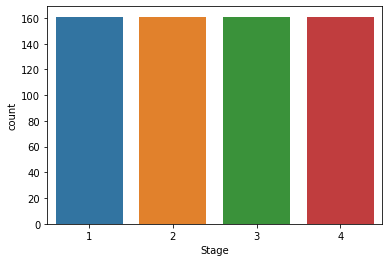

In [39]:
sns.countplot(y)

## Feature Scaling

In [40]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.734123  0.963247 -0.382290  4.983321      0.959091  2.277051  3.172958   
1 -0.734123  0.650533 -0.382290 -0.207707      0.959091  2.277051  0.161855   
2 -0.734123  2.109867  2.964142 -0.207707     -1.112588 -0.464421 -2.849247   
3 -0.734123  0.546295 -0.382290 -0.207707      0.959091  2.277051 -2.849247   
4  1.516276 -1.225754 -0.382290 -0.207707      0.959091  2.277051  0.161855   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.421042    -0.697042 -2.491737  1.912033  0.547791  0.679910   
1  -0.508064    -0.111256  1.515370 -0.534233  2.139974  0.046858   
2  -0.366333    -1.911477 -0.201961  2.367710 -1.315698 -0.404545   
3  -0.177359    -0.939929 -2.647858 -0.294403  2.139974 -1.323676   
4   0.578540    -0.439868 -0.071860  1.600254 -1.075398  0.037270   

   Tryglicerides  Platelets  Prothrombin  
0       2.055591  -0.879940     1.979878  
1      -0.667085  -0.530631    -0.035867  
2      -1.736707  -1.319392     1.727910  
3      -0.537434  -0.958816    -0.413819  
4      -1.185690  -1.488412     0.342085

## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.53      0.64      0.58        50
           2       0.37      0.29      0.32        52
           3       0.37      0.46      0.41        39
           4       0.75      0.62      0.68        53

    accuracy                           0.51       194
   macro avg       0.50      0.50      0.50       194
weighted avg       0.51      0.51      0.50       194



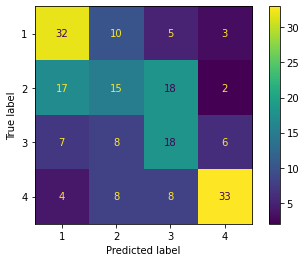

In [44]:
plot_confusion_matrix(logmodel,X_test,y_test)

In [45]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [46]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.65      0.96      0.77        50
           2       0.69      0.48      0.57        52
           3       0.40      0.44      0.42        39
           4       0.64      0.51      0.57        53

    accuracy                           0.60       194
   macro avg       0.60      0.60      0.58       194
weighted avg       0.61      0.60      0.59       194



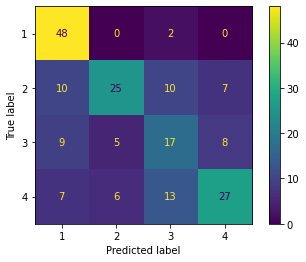

In [47]:
plot_confusion_matrix(svm,X_test,y_test)

In [48]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

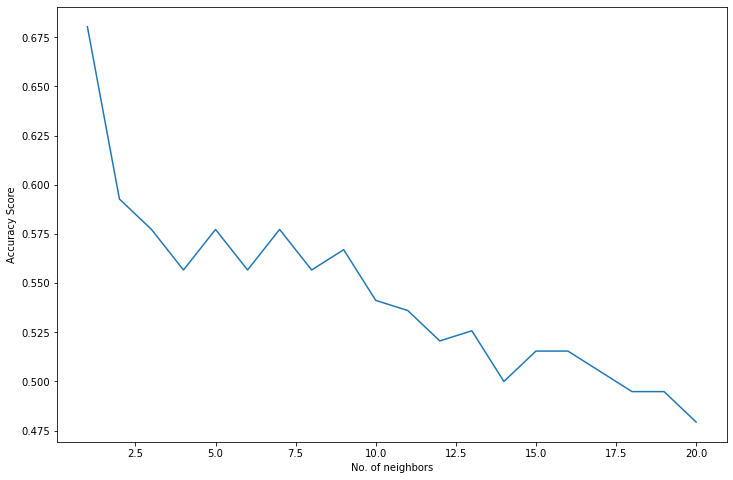

In [49]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[43  4  3  0]
 [23 19  7  3]
 [10  8 13  8]
 [11  5 14 23]]
              precision    recall  f1-score   support

           1       0.49      0.86      0.63        50
           2       0.53      0.37      0.43        52
           3       0.35      0.33      0.34        39
           4       0.68      0.43      0.53        53

    accuracy                           0.51       194
   macro avg       0.51      0.50      0.48       194
weighted avg       0.52      0.51      0.49       194



In [52]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [53]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[21 25  1  3]
 [11 27 10  4]
 [ 5 15 13  6]
 [ 3 10 13 27]]
              precision    recall  f1-score   support

           1       0.53      0.42      0.47        50
           2       0.35      0.52      0.42        52
           3       0.35      0.33      0.34        39
           4       0.68      0.51      0.58        53

    accuracy                           0.45       194
   macro avg       0.48      0.45      0.45       194
weighted avg       0.48      0.45      0.46       194



In [54]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [55]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[33  2  6  9]
 [23  7 14  8]
 [13  2 17  7]
 [ 9  2 15 27]]
              precision    recall  f1-score   support

           1       0.42      0.66      0.52        50
           2       0.54      0.13      0.22        52
           3       0.33      0.44      0.37        39
           4       0.53      0.51      0.52        53

    accuracy                           0.43       194
   macro avg       0.45      0.43      0.41       194
weighted avg       0.46      0.43      0.41       194



In [56]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [57]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[36  6  3  5]
 [21 10 15  6]
 [10  6 16  7]
 [ 5  6 11 31]]
              precision    recall  f1-score   support

           1       0.50      0.72      0.59        50
           2       0.36      0.19      0.25        52
           3       0.36      0.41      0.38        39
           4       0.63      0.58      0.61        53

    accuracy                           0.48       194
   macro avg       0.46      0.48      0.46       194
weighted avg       0.47      0.48      0.46       194



In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[43  3  4  0]
 [ 6 20 12 14]
 [ 8  5 18  8]
 [ 5  6 14 28]]
              precision    recall  f1-score   support

           1       0.69      0.86      0.77        50
           2       0.59      0.38      0.47        52
           3       0.38      0.46      0.41        39
           4       0.56      0.53      0.54        53

    accuracy                           0.56       194
   macro avg       0.55      0.56      0.55       194
weighted avg       0.56      0.56      0.55       194



In [60]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

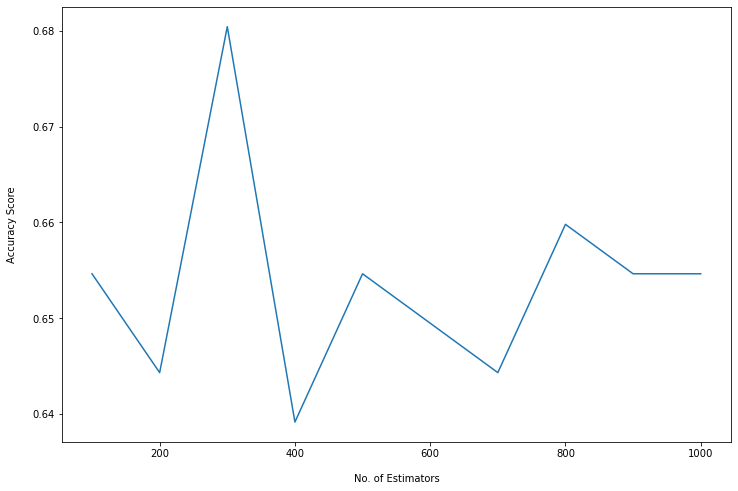

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)

In [62]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[47  0  2  1]
 [ 6 30 11  5]
 [ 7  4 21  7]
 [ 2  6 17 28]]
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        50
           2       0.75      0.58      0.65        52
           3       0.41      0.54      0.47        39
           4       0.68      0.53      0.60        53

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.64       194
weighted avg       0.67      0.65      0.65       194



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

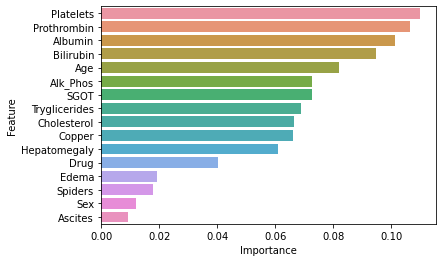

In [64]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

In [65]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[47  1  1  1]
 [ 7 32  9  4]
 [ 5  7 20  7]
 [ 1  4 18 30]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85        50
           2       0.73      0.62      0.67        52
           3       0.42      0.51      0.46        39
           4       0.71      0.57      0.63        53

    accuracy                           0.66       194
   macro avg       0.66      0.66      0.65       194
weighted avg       0.68      0.66      0.66       194



In [67]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [68]:
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[[33 14  3  0]
 [14 18 14  6]
 [ 4 16  8 11]
 [ 1 10 16 26]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65        50
           2       0.31      0.35      0.33        52
           3       0.20      0.21      0.20        39
           4       0.60      0.49      0.54        53

    accuracy                           0.44       194
   macro avg       0.44      0.43      0.43       194
weighted avg       0.45      0.44      0.44       194



In [69]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.075969
0:	learn: 1.3578758	total: 181ms	remaining: 3m 1s
1:	learn: 1.3325306	total: 188ms	remaining: 1m 33s
2:	learn: 1.3138694	total: 195ms	remaining: 1m 4s
3:	learn: 1.2915028	total: 200ms	remaining: 49.9s
4:	learn: 1.2676793	total: 206ms	remaining: 41s
5:	learn: 1.2489312	total: 212ms	remaining: 35.1s
6:	learn: 1.2316358	total: 218ms	remaining: 30.9s
7:	learn: 1.2106926	total: 223ms	remaining: 27.7s
8:	learn: 1.1896775	total: 229ms	remaining: 25.2s
9:	learn: 1.1724982	total: 234ms	remaining: 23.2s
10:	learn: 1.1574604	total: 240ms	remaining: 21.6s
11:	learn: 1.1390180	total: 246ms	remaining: 20.3s
12:	learn: 1.1252521	total: 252ms	remaining: 19.1s
13:	learn: 1.1157054	total: 257ms	remaining: 18.1s
14:	learn: 1.0992312	total: 263ms	remaining: 17.3s
15:	learn: 1.0853755	total: 268ms	remaining: 16.5s
16:	learn: 1.0724082	total: 275ms	remaining: 15.9s
17:	learn: 1.0582688	total: 281ms	remaining: 15.3s
18:	learn: 1.0464924	total: 287ms	remaining: 14.8s
19:	learn: 1

192:	learn: 0.3682529	total: 1.27s	remaining: 5.32s
193:	learn: 0.3668251	total: 1.28s	remaining: 5.32s
194:	learn: 0.3657587	total: 1.29s	remaining: 5.31s
195:	learn: 0.3647619	total: 1.29s	remaining: 5.3s
196:	learn: 0.3625503	total: 1.3s	remaining: 5.29s
197:	learn: 0.3609210	total: 1.3s	remaining: 5.29s
198:	learn: 0.3593631	total: 1.31s	remaining: 5.27s
199:	learn: 0.3576766	total: 1.32s	remaining: 5.26s
200:	learn: 0.3564217	total: 1.32s	remaining: 5.25s
201:	learn: 0.3551909	total: 1.33s	remaining: 5.25s
202:	learn: 0.3540653	total: 1.34s	remaining: 5.25s
203:	learn: 0.3524841	total: 1.34s	remaining: 5.24s
204:	learn: 0.3507884	total: 1.35s	remaining: 5.23s
205:	learn: 0.3484981	total: 1.35s	remaining: 5.22s
206:	learn: 0.3469612	total: 1.36s	remaining: 5.21s
207:	learn: 0.3455440	total: 1.37s	remaining: 5.21s
208:	learn: 0.3442786	total: 1.37s	remaining: 5.2s
209:	learn: 0.3432061	total: 1.38s	remaining: 5.19s
210:	learn: 0.3415531	total: 1.38s	remaining: 5.18s
211:	learn: 0.34

352:	learn: 0.1989669	total: 2.18s	remaining: 4s
353:	learn: 0.1981155	total: 2.19s	remaining: 3.99s
354:	learn: 0.1975495	total: 2.19s	remaining: 3.98s
355:	learn: 0.1966550	total: 2.2s	remaining: 3.97s
356:	learn: 0.1961154	total: 2.2s	remaining: 3.97s
357:	learn: 0.1951788	total: 2.21s	remaining: 3.96s
358:	learn: 0.1946776	total: 2.21s	remaining: 3.95s
359:	learn: 0.1939360	total: 2.22s	remaining: 3.95s
360:	learn: 0.1931392	total: 2.23s	remaining: 3.94s
361:	learn: 0.1923664	total: 2.23s	remaining: 3.94s
362:	learn: 0.1918177	total: 2.24s	remaining: 3.93s
363:	learn: 0.1912778	total: 2.24s	remaining: 3.92s
364:	learn: 0.1906401	total: 2.25s	remaining: 3.92s
365:	learn: 0.1900004	total: 2.25s	remaining: 3.91s
366:	learn: 0.1891811	total: 2.26s	remaining: 3.9s
367:	learn: 0.1887119	total: 2.27s	remaining: 3.89s
368:	learn: 0.1879902	total: 2.27s	remaining: 3.89s
369:	learn: 0.1876149	total: 2.28s	remaining: 3.88s
370:	learn: 0.1867817	total: 2.29s	remaining: 3.87s
371:	learn: 0.1860

517:	learn: 0.1224678	total: 3.08s	remaining: 2.87s
518:	learn: 0.1222667	total: 3.09s	remaining: 2.86s
519:	learn: 0.1220045	total: 3.1s	remaining: 2.86s
520:	learn: 0.1216124	total: 3.1s	remaining: 2.85s
521:	learn: 0.1213667	total: 3.11s	remaining: 2.85s
522:	learn: 0.1209145	total: 3.11s	remaining: 2.84s
523:	learn: 0.1205373	total: 3.12s	remaining: 2.83s
524:	learn: 0.1203771	total: 3.12s	remaining: 2.83s
525:	learn: 0.1200816	total: 3.13s	remaining: 2.82s
526:	learn: 0.1195880	total: 3.13s	remaining: 2.81s
527:	learn: 0.1193361	total: 3.14s	remaining: 2.81s
528:	learn: 0.1191280	total: 3.15s	remaining: 2.8s
529:	learn: 0.1187010	total: 3.15s	remaining: 2.8s
530:	learn: 0.1183290	total: 3.16s	remaining: 2.79s
531:	learn: 0.1181527	total: 3.17s	remaining: 2.78s
532:	learn: 0.1177937	total: 3.17s	remaining: 2.78s
533:	learn: 0.1174088	total: 3.18s	remaining: 2.77s
534:	learn: 0.1171717	total: 3.18s	remaining: 2.77s
535:	learn: 0.1169866	total: 3.19s	remaining: 2.76s
536:	learn: 0.11

681:	learn: 0.0845183	total: 3.99s	remaining: 1.86s
682:	learn: 0.0843961	total: 4s	remaining: 1.85s
683:	learn: 0.0842303	total: 4s	remaining: 1.85s
684:	learn: 0.0840715	total: 4.01s	remaining: 1.84s
685:	learn: 0.0838085	total: 4.01s	remaining: 1.84s
686:	learn: 0.0836272	total: 4.02s	remaining: 1.83s
687:	learn: 0.0835208	total: 4.02s	remaining: 1.82s
688:	learn: 0.0834146	total: 4.03s	remaining: 1.82s
689:	learn: 0.0832329	total: 4.03s	remaining: 1.81s
690:	learn: 0.0830233	total: 4.04s	remaining: 1.8s
691:	learn: 0.0828327	total: 4.04s	remaining: 1.8s
692:	learn: 0.0825682	total: 4.05s	remaining: 1.79s
693:	learn: 0.0823794	total: 4.05s	remaining: 1.79s
694:	learn: 0.0821515	total: 4.06s	remaining: 1.78s
695:	learn: 0.0819870	total: 4.06s	remaining: 1.77s
696:	learn: 0.0818019	total: 4.07s	remaining: 1.77s
697:	learn: 0.0815859	total: 4.08s	remaining: 1.76s
698:	learn: 0.0813994	total: 4.08s	remaining: 1.76s
699:	learn: 0.0812895	total: 4.08s	remaining: 1.75s
700:	learn: 0.081201

852:	learn: 0.0616642	total: 5.32s	remaining: 916ms
853:	learn: 0.0615633	total: 5.33s	remaining: 911ms
854:	learn: 0.0614775	total: 5.34s	remaining: 905ms
855:	learn: 0.0613682	total: 5.34s	remaining: 899ms
856:	learn: 0.0612699	total: 5.36s	remaining: 894ms
857:	learn: 0.0612051	total: 5.37s	remaining: 888ms
858:	learn: 0.0610762	total: 5.38s	remaining: 882ms
859:	learn: 0.0609451	total: 5.38s	remaining: 877ms
860:	learn: 0.0608286	total: 5.4s	remaining: 871ms
861:	learn: 0.0607481	total: 5.41s	remaining: 865ms
862:	learn: 0.0606858	total: 5.42s	remaining: 860ms
863:	learn: 0.0605900	total: 5.42s	remaining: 854ms
864:	learn: 0.0605150	total: 5.43s	remaining: 848ms
865:	learn: 0.0603905	total: 5.44s	remaining: 842ms
866:	learn: 0.0603231	total: 5.45s	remaining: 837ms
867:	learn: 0.0602127	total: 5.46s	remaining: 831ms
868:	learn: 0.0600926	total: 5.47s	remaining: 825ms
869:	learn: 0.0599863	total: 5.48s	remaining: 819ms
870:	learn: 0.0598909	total: 5.49s	remaining: 813ms
871:	learn: 0

In [70]:
cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))

[[46  1  2  1]
 [ 6 36  8  2]
 [ 5  6 22  6]
 [ 0  5 15 33]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.75      0.69      0.72        52
           3       0.47      0.56      0.51        39
           4       0.79      0.62      0.69        53

    accuracy                           0.71       194
   macro avg       0.70      0.70      0.70       194
weighted avg       0.72      0.71      0.71       194



In [71]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [72]:
hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))

[[47  1  1  1]
 [ 2 33 12  5]
 [ 6  2 23  8]
 [ 2  8 15 28]]
              precision    recall  f1-score   support

           1       0.82      0.94      0.88        50
           2       0.75      0.63      0.69        52
           3       0.45      0.59      0.51        39
           4       0.67      0.53      0.59        53

    accuracy                           0.68       194
   macro avg       0.67      0.67      0.67       194
weighted avg       0.69      0.68      0.67       194



In [73]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [74]:
bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))

[[43  2  2  3]
 [13 19 12  8]
 [ 8  4 21  6]
 [ 5  9 15 24]]
              precision    recall  f1-score   support

           1       0.62      0.86      0.72        50
           2       0.56      0.37      0.44        52
           3       0.42      0.54      0.47        39
           4       0.59      0.45      0.51        53

    accuracy                           0.55       194
   macro avg       0.55      0.55      0.54       194
weighted avg       0.55      0.55      0.54       194



In [75]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [76]:
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[45  0  3  2]
 [40  0 10  2]
 [27  0  9  3]
 [28  0  3 22]]
              precision    recall  f1-score   support

           1       0.32      0.90      0.47        50
           2       0.00      0.00      0.00        52
           3       0.36      0.23      0.28        39
           4       0.76      0.42      0.54        53

    accuracy                           0.39       194
   macro avg       0.36      0.39      0.32       194
weighted avg       0.36      0.39      0.33       194



In [77]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[46  0  2  2]
 [ 7 29 12  4]
 [ 5  5 19 10]
 [ 3  6 16 28]]
              precision    recall  f1-score   support

           1       0.75      0.92      0.83        50
           2       0.72      0.56      0.63        52
           3       0.39      0.49      0.43        39
           4       0.64      0.53      0.58        53

    accuracy                           0.63       194
   macro avg       0.63      0.62      0.62       194
weighted avg       0.64      0.63      0.63       194



In [79]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [80]:
lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))

[[47  1  1  1]
 [ 2 34 11  5]
 [ 6  2 23  8]
 [ 3  6 16 28]]
              precision    recall  f1-score   support

           1       0.81      0.94      0.87        50
           2       0.79      0.65      0.72        52
           3       0.45      0.59      0.51        39
           4       0.67      0.53      0.59        53

    accuracy                           0.68       194
   macro avg       0.68      0.68      0.67       194
weighted avg       0.69      0.68      0.68       194



In [81]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [82]:
bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))

[[32  9  4  5]
 [17 15 14  6]
 [ 8  6 17  8]
 [ 6 10  9 28]]
              precision    recall  f1-score   support

           1       0.51      0.64      0.57        50
           2       0.38      0.29      0.33        52
           3       0.39      0.44      0.41        39
           4       0.60      0.53      0.56        53

    accuracy                           0.47       194
   macro avg       0.47      0.47      0.47       194
weighted avg       0.47      0.47      0.47       194



In [83]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [84]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[46  1  1  2]
 [ 7 27 12  6]
 [ 4  6 21  8]
 [ 2  7 18 26]]
              precision    recall  f1-score   support

           1       0.78      0.92      0.84        50
           2       0.66      0.52      0.58        52
           3       0.40      0.54      0.46        39
           4       0.62      0.49      0.55        53

    accuracy                           0.62       194
   macro avg       0.62      0.62      0.61       194
weighted avg       0.63      0.62      0.62       194



## Model Performance Analysis

In [85]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 50.52%
Accuracy Score of Passive Aggressive Classifier: 43.3%
Accuracy Score of SGD Classifer: 45.36%
Accuracy Score of Ridge Classifier: 47.94%
Accuracy Score of Gaussian Naive Bayes: 39.18%
Accuracy Score of Bernoulli Naive Bayes: 47.42%
Accuracy Score of K Neighbors Classifier: 50.52%
Accuracy Score of Support Vector Classifier: 60.31%
Accuracy Score of Decision Tree Classifier: 56.19%
Accuracy Score of Random Forest Classifier: 64.95%
Accuracy Score of XG Boost Classifier: 61.86%
Accuracy Score of Cat Boost Classifier: 70.62%
Accuracy Score of Gradient Boosting Classifier: 62.89%
Accuracy Score of Histogram Gradient Boosting Classifier: 67.53%
Accuracy Score of Bagging Classifier: 55.15%
Accuracy Score of Ada Boost Classifier: 43.81%
Accuracy Score of Extra Trees Classifier: 66.49%
Accuracy Score of Light GBM Classifier: 68.04%


Cat Boost Classifier is the best performing model that boasts a superb prediction accuracy of more than 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [86]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2))
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200, total=   0.3s
[CV] class_weight=b

[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=200, total=   0.3s
[CV] class_weigh

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=200, total=   0.3s
[CV] class

[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.7s
[CV] class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000, total=   1.5s
[CV] cla

[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced, criterion=entropy, max_features=auto, n_estimators=

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   3.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.2s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.9s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=800, 

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=600, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   1.7s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=800, 

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   2.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=600 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, total=   0.5s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=400 
[CV]  class_wei

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   2.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=1000, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, total=   0.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=200, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=800, total=   2.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   3.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   3.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=auto, n_estimators=1000, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=aut

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=600, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=800, total=   2.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_e

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   2.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   2.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=600, total=   2.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_e

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 15.5min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [87]:
grid_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 1000}

In [88]:
grid_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

           1       0.75      0.92      0.83        50
           2       0.73      0.58      0.65        52
           3       0.44      0.56      0.49        39
           4       0.69      0.55      0.61        53

    accuracy                           0.65       194
   macro avg       0.65      0.65      0.64       194
weighted avg       0.67      0.65      0.65       194



In [89]:
cb_cv = cross_validate(cb,X_test,y_test,cv=8,verbose=2)
cb_cv = pd.DataFrame(cb_cv)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cb_cv.test_score.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Learning rate set to 0.072268
0:	learn: 1.3677942	total: 387ms	remaining: 6m 27s
1:	learn: 1.3494775	total: 423ms	remaining: 3m 31s
2:	learn: 1.3341757	total: 427ms	remaining: 2m 21s
3:	learn: 1.3203002	total: 430ms	remaining: 1m 47s
4:	learn: 1.3027592	total: 441ms	remaining: 1m 27s
5:	learn: 1.2795971	total: 452ms	remaining: 1m 14s
6:	learn: 1.2639884	total: 456ms	remaining: 1m 4s
7:	learn: 1.2479110	total: 459ms	remaining: 56.9s
8:	learn: 1.2331875	total: 462ms	remaining: 50.8s
9:	learn: 1.2189526	total: 465ms	remaining: 46s
10:	learn: 1.2045769	total: 468ms	remaining: 42.1s
11:	learn: 1.1902176	total: 471ms	remaining: 38.8s
12:	learn: 1.1725829	total: 474ms	remaining: 36s
13:	learn: 1.1612963	total: 477ms	remaining: 33.6s
14:	learn: 1.1500024	total: 480ms	remaining: 31.5s
15:	learn: 1.1364652	total: 483ms	remaining: 29.7s
16:	learn: 1.1258569	total: 486ms	remaining: 28.1s
17:	learn: 1.1177551	total: 489ms	remain

165:	learn: 0.3481634	total: 1.59s	remaining: 8s
166:	learn: 0.3463847	total: 1.6s	remaining: 7.96s
167:	learn: 0.3448156	total: 1.6s	remaining: 7.94s
168:	learn: 0.3430729	total: 1.61s	remaining: 7.91s
169:	learn: 0.3411743	total: 1.61s	remaining: 7.87s
170:	learn: 0.3397836	total: 1.62s	remaining: 7.83s
171:	learn: 0.3378655	total: 1.62s	remaining: 7.8s
172:	learn: 0.3351822	total: 1.62s	remaining: 7.76s
173:	learn: 0.3335229	total: 1.63s	remaining: 7.72s
174:	learn: 0.3309555	total: 1.63s	remaining: 7.68s
175:	learn: 0.3292003	total: 1.63s	remaining: 7.65s
176:	learn: 0.3280102	total: 1.64s	remaining: 7.61s
177:	learn: 0.3270008	total: 1.64s	remaining: 7.58s
178:	learn: 0.3249318	total: 1.64s	remaining: 7.54s
179:	learn: 0.3231197	total: 1.65s	remaining: 7.51s
180:	learn: 0.3223422	total: 1.65s	remaining: 7.47s
181:	learn: 0.3195681	total: 1.66s	remaining: 7.44s
182:	learn: 0.3173217	total: 1.66s	remaining: 7.41s
183:	learn: 0.3158122	total: 1.66s	remaining: 7.37s
184:	learn: 0.3137

336:	learn: 0.1516481	total: 2.9s	remaining: 5.7s
337:	learn: 0.1511714	total: 2.9s	remaining: 5.68s
338:	learn: 0.1503485	total: 2.9s	remaining: 5.66s
339:	learn: 0.1499845	total: 2.91s	remaining: 5.64s
340:	learn: 0.1497015	total: 2.91s	remaining: 5.63s
341:	learn: 0.1491808	total: 2.91s	remaining: 5.61s
342:	learn: 0.1484242	total: 2.93s	remaining: 5.62s
343:	learn: 0.1478160	total: 2.94s	remaining: 5.6s
344:	learn: 0.1470985	total: 2.94s	remaining: 5.58s
345:	learn: 0.1465713	total: 2.94s	remaining: 5.56s
346:	learn: 0.1461032	total: 2.95s	remaining: 5.54s
347:	learn: 0.1456300	total: 3.01s	remaining: 5.64s
348:	learn: 0.1450981	total: 3.01s	remaining: 5.62s
349:	learn: 0.1445083	total: 3.02s	remaining: 5.6s
350:	learn: 0.1439521	total: 3.02s	remaining: 5.58s
351:	learn: 0.1433364	total: 3.02s	remaining: 5.57s
352:	learn: 0.1426203	total: 3.03s	remaining: 5.55s
353:	learn: 0.1422424	total: 3.03s	remaining: 5.53s
354:	learn: 0.1415209	total: 3.03s	remaining: 5.51s
355:	learn: 0.1410

530:	learn: 0.0860872	total: 3.79s	remaining: 3.34s
531:	learn: 0.0857652	total: 3.79s	remaining: 3.33s
532:	learn: 0.0855907	total: 3.79s	remaining: 3.32s
533:	learn: 0.0853887	total: 3.79s	remaining: 3.31s
534:	learn: 0.0852163	total: 3.81s	remaining: 3.31s
535:	learn: 0.0850227	total: 3.81s	remaining: 3.3s
536:	learn: 0.0848063	total: 3.82s	remaining: 3.29s
537:	learn: 0.0846782	total: 3.82s	remaining: 3.28s
538:	learn: 0.0844846	total: 3.82s	remaining: 3.27s
539:	learn: 0.0842548	total: 3.83s	remaining: 3.26s
540:	learn: 0.0840778	total: 3.83s	remaining: 3.25s
541:	learn: 0.0838214	total: 3.83s	remaining: 3.24s
542:	learn: 0.0836699	total: 3.84s	remaining: 3.23s
543:	learn: 0.0834605	total: 3.84s	remaining: 3.22s
544:	learn: 0.0832277	total: 3.84s	remaining: 3.21s
545:	learn: 0.0830148	total: 3.85s	remaining: 3.2s
546:	learn: 0.0828038	total: 3.85s	remaining: 3.19s
547:	learn: 0.0826719	total: 3.85s	remaining: 3.18s
548:	learn: 0.0824808	total: 3.86s	remaining: 3.17s
549:	learn: 0.

702:	learn: 0.0596436	total: 4.98s	remaining: 2.1s
703:	learn: 0.0595453	total: 4.98s	remaining: 2.1s
704:	learn: 0.0594282	total: 4.99s	remaining: 2.09s
705:	learn: 0.0593131	total: 5s	remaining: 2.08s
706:	learn: 0.0592033	total: 5s	remaining: 2.07s
707:	learn: 0.0590831	total: 5.01s	remaining: 2.06s
708:	learn: 0.0589381	total: 5.01s	remaining: 2.06s
709:	learn: 0.0588371	total: 5.02s	remaining: 2.05s
710:	learn: 0.0587446	total: 5.03s	remaining: 2.04s
711:	learn: 0.0586481	total: 5.04s	remaining: 2.04s
712:	learn: 0.0585614	total: 5.04s	remaining: 2.03s
713:	learn: 0.0584185	total: 5.05s	remaining: 2.02s
714:	learn: 0.0583234	total: 5.05s	remaining: 2.02s
715:	learn: 0.0582164	total: 5.06s	remaining: 2.01s
716:	learn: 0.0581868	total: 5.07s	remaining: 2s
717:	learn: 0.0581138	total: 5.08s	remaining: 2s
718:	learn: 0.0580237	total: 5.09s	remaining: 1.99s
719:	learn: 0.0579020	total: 5.09s	remaining: 1.98s
720:	learn: 0.0577884	total: 5.1s	remaining: 1.97s
721:	learn: 0.0576564	total

905:	learn: 0.0430812	total: 6.04s	remaining: 627ms
906:	learn: 0.0430052	total: 6.05s	remaining: 620ms
907:	learn: 0.0429464	total: 6.14s	remaining: 623ms
908:	learn: 0.0428787	total: 6.15s	remaining: 615ms
909:	learn: 0.0428343	total: 6.15s	remaining: 608ms
910:	learn: 0.0427730	total: 6.15s	remaining: 601ms
911:	learn: 0.0427009	total: 6.16s	remaining: 594ms
912:	learn: 0.0426652	total: 6.16s	remaining: 587ms
913:	learn: 0.0425864	total: 6.16s	remaining: 580ms
914:	learn: 0.0425423	total: 6.17s	remaining: 573ms
915:	learn: 0.0425233	total: 6.17s	remaining: 566ms
916:	learn: 0.0424957	total: 6.17s	remaining: 559ms
917:	learn: 0.0424225	total: 6.18s	remaining: 552ms
918:	learn: 0.0423592	total: 6.18s	remaining: 545ms
919:	learn: 0.0422974	total: 6.19s	remaining: 538ms
920:	learn: 0.0422202	total: 6.19s	remaining: 531ms
921:	learn: 0.0421708	total: 6.2s	remaining: 524ms
922:	learn: 0.0421170	total: 6.2s	remaining: 517ms
923:	learn: 0.0420400	total: 6.2s	remaining: 510ms
924:	learn: 0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


33:	learn: 0.9618020	total: 111ms	remaining: 3.14s
34:	learn: 0.9528045	total: 114ms	remaining: 3.14s
35:	learn: 0.9434198	total: 117ms	remaining: 3.13s
36:	learn: 0.9347882	total: 120ms	remaining: 3.12s
37:	learn: 0.9278376	total: 123ms	remaining: 3.12s
38:	learn: 0.9194155	total: 127ms	remaining: 3.13s
39:	learn: 0.9085614	total: 130ms	remaining: 3.12s
40:	learn: 0.9025677	total: 133ms	remaining: 3.1s
41:	learn: 0.8942545	total: 136ms	remaining: 3.09s
42:	learn: 0.8853920	total: 139ms	remaining: 3.09s
43:	learn: 0.8816534	total: 143ms	remaining: 3.1s
44:	learn: 0.8719586	total: 146ms	remaining: 3.09s
45:	learn: 0.8667340	total: 148ms	remaining: 3.08s
46:	learn: 0.8614326	total: 151ms	remaining: 3.07s
47:	learn: 0.8528008	total: 154ms	remaining: 3.06s
48:	learn: 0.8455818	total: 158ms	remaining: 3.06s
49:	learn: 0.8391464	total: 160ms	remaining: 3.05s
50:	learn: 0.8325428	total: 164ms	remaining: 3.04s
51:	learn: 0.8260132	total: 166ms	remaining: 3.03s
52:	learn: 0.8183855	total: 170ms

206:	learn: 0.2716576	total: 820ms	remaining: 3.14s
207:	learn: 0.2693763	total: 824ms	remaining: 3.14s
208:	learn: 0.2682715	total: 829ms	remaining: 3.14s
209:	learn: 0.2668494	total: 833ms	remaining: 3.13s
210:	learn: 0.2651768	total: 837ms	remaining: 3.13s
211:	learn: 0.2637949	total: 841ms	remaining: 3.13s
212:	learn: 0.2614166	total: 846ms	remaining: 3.13s
213:	learn: 0.2597936	total: 853ms	remaining: 3.13s
214:	learn: 0.2583303	total: 858ms	remaining: 3.13s
215:	learn: 0.2576009	total: 862ms	remaining: 3.13s
216:	learn: 0.2562730	total: 866ms	remaining: 3.13s
217:	learn: 0.2556611	total: 871ms	remaining: 3.12s
218:	learn: 0.2545574	total: 876ms	remaining: 3.12s
219:	learn: 0.2532005	total: 880ms	remaining: 3.12s
220:	learn: 0.2518806	total: 884ms	remaining: 3.12s
221:	learn: 0.2506089	total: 888ms	remaining: 3.11s
222:	learn: 0.2491629	total: 893ms	remaining: 3.11s
223:	learn: 0.2477563	total: 897ms	remaining: 3.11s
224:	learn: 0.2461747	total: 901ms	remaining: 3.1s
225:	learn: 0

371:	learn: 0.1365670	total: 1.65s	remaining: 2.78s
372:	learn: 0.1361399	total: 1.65s	remaining: 2.77s
373:	learn: 0.1358708	total: 1.65s	remaining: 2.77s
374:	learn: 0.1354311	total: 1.66s	remaining: 2.76s
375:	learn: 0.1350400	total: 1.66s	remaining: 2.76s
376:	learn: 0.1343512	total: 1.67s	remaining: 2.75s
377:	learn: 0.1337211	total: 1.67s	remaining: 2.75s
378:	learn: 0.1333201	total: 1.68s	remaining: 2.75s
379:	learn: 0.1328946	total: 1.68s	remaining: 2.74s
380:	learn: 0.1325017	total: 1.68s	remaining: 2.73s
381:	learn: 0.1321998	total: 1.69s	remaining: 2.73s
382:	learn: 0.1317702	total: 1.69s	remaining: 2.72s
383:	learn: 0.1314380	total: 1.69s	remaining: 2.72s
384:	learn: 0.1311871	total: 1.7s	remaining: 2.71s
385:	learn: 0.1306683	total: 1.7s	remaining: 2.71s
386:	learn: 0.1302819	total: 1.71s	remaining: 2.7s
387:	learn: 0.1298075	total: 1.71s	remaining: 2.69s
388:	learn: 0.1291848	total: 1.71s	remaining: 2.69s
389:	learn: 0.1288366	total: 1.72s	remaining: 2.68s
390:	learn: 0.1

564:	learn: 0.0781282	total: 2.35s	remaining: 1.81s
565:	learn: 0.0779788	total: 2.35s	remaining: 1.8s
566:	learn: 0.0777970	total: 2.36s	remaining: 1.8s
567:	learn: 0.0776680	total: 2.36s	remaining: 1.79s
568:	learn: 0.0774420	total: 2.36s	remaining: 1.79s
569:	learn: 0.0772819	total: 2.37s	remaining: 1.79s
570:	learn: 0.0770653	total: 2.37s	remaining: 1.78s
571:	learn: 0.0769342	total: 2.38s	remaining: 1.78s
572:	learn: 0.0767708	total: 2.38s	remaining: 1.78s
573:	learn: 0.0765176	total: 2.39s	remaining: 1.77s
574:	learn: 0.0763456	total: 2.39s	remaining: 1.77s
575:	learn: 0.0761529	total: 2.4s	remaining: 1.76s
576:	learn: 0.0760135	total: 2.4s	remaining: 1.76s
577:	learn: 0.0757770	total: 2.41s	remaining: 1.76s
578:	learn: 0.0756174	total: 2.41s	remaining: 1.75s
579:	learn: 0.0754663	total: 2.42s	remaining: 1.75s
580:	learn: 0.0752222	total: 2.42s	remaining: 1.74s
581:	learn: 0.0750406	total: 2.42s	remaining: 1.74s
582:	learn: 0.0748391	total: 2.43s	remaining: 1.74s
583:	learn: 0.07

750:	learn: 0.0537204	total: 3.06s	remaining: 1.01s
751:	learn: 0.0536186	total: 3.06s	remaining: 1.01s
752:	learn: 0.0535599	total: 3.06s	remaining: 1s
753:	learn: 0.0534873	total: 3.07s	remaining: 1s
754:	learn: 0.0533481	total: 3.07s	remaining: 997ms
755:	learn: 0.0532380	total: 3.07s	remaining: 992ms
756:	learn: 0.0531126	total: 3.08s	remaining: 988ms
757:	learn: 0.0530278	total: 3.08s	remaining: 984ms
758:	learn: 0.0529744	total: 3.08s	remaining: 980ms
759:	learn: 0.0529300	total: 3.09s	remaining: 976ms
760:	learn: 0.0528494	total: 3.09s	remaining: 972ms
761:	learn: 0.0527372	total: 3.1s	remaining: 968ms
762:	learn: 0.0526305	total: 3.1s	remaining: 964ms
763:	learn: 0.0525500	total: 3.1s	remaining: 959ms
764:	learn: 0.0524763	total: 3.11s	remaining: 955ms
765:	learn: 0.0523801	total: 3.11s	remaining: 951ms
766:	learn: 0.0522986	total: 3.12s	remaining: 947ms
767:	learn: 0.0522176	total: 3.12s	remaining: 942ms
768:	learn: 0.0520986	total: 3.12s	remaining: 938ms
769:	learn: 0.0519862

934:	learn: 0.0403384	total: 3.76s	remaining: 261ms
935:	learn: 0.0402688	total: 3.76s	remaining: 257ms
936:	learn: 0.0402010	total: 3.77s	remaining: 253ms
937:	learn: 0.0401523	total: 3.77s	remaining: 249ms
938:	learn: 0.0400740	total: 3.77s	remaining: 245ms
939:	learn: 0.0400089	total: 3.78s	remaining: 241ms
940:	learn: 0.0399479	total: 3.78s	remaining: 237ms
941:	learn: 0.0399010	total: 3.79s	remaining: 233ms
942:	learn: 0.0398593	total: 3.79s	remaining: 229ms
943:	learn: 0.0397982	total: 3.79s	remaining: 225ms
944:	learn: 0.0397706	total: 3.8s	remaining: 221ms
945:	learn: 0.0397094	total: 3.8s	remaining: 217ms
946:	learn: 0.0396436	total: 3.8s	remaining: 213ms
947:	learn: 0.0395823	total: 3.81s	remaining: 209ms
948:	learn: 0.0395136	total: 3.81s	remaining: 205ms
949:	learn: 0.0394610	total: 3.81s	remaining: 201ms
950:	learn: 0.0394160	total: 3.82s	remaining: 197ms
951:	learn: 0.0393503	total: 3.83s	remaining: 193ms
952:	learn: 0.0393010	total: 3.83s	remaining: 189ms
953:	learn: 0.0

125:	learn: 0.4544181	total: 692ms	remaining: 4.8s
126:	learn: 0.4510683	total: 696ms	remaining: 4.79s
127:	learn: 0.4476403	total: 703ms	remaining: 4.79s
128:	learn: 0.4447619	total: 708ms	remaining: 4.78s
129:	learn: 0.4422148	total: 712ms	remaining: 4.77s
130:	learn: 0.4402350	total: 716ms	remaining: 4.75s
131:	learn: 0.4375722	total: 720ms	remaining: 4.74s
132:	learn: 0.4338187	total: 724ms	remaining: 4.72s
133:	learn: 0.4319052	total: 728ms	remaining: 4.7s
134:	learn: 0.4290060	total: 731ms	remaining: 4.69s
135:	learn: 0.4251777	total: 735ms	remaining: 4.67s
136:	learn: 0.4223701	total: 739ms	remaining: 4.65s
137:	learn: 0.4207475	total: 742ms	remaining: 4.63s
138:	learn: 0.4171199	total: 746ms	remaining: 4.62s
139:	learn: 0.4137129	total: 749ms	remaining: 4.6s
140:	learn: 0.4116276	total: 753ms	remaining: 4.58s
141:	learn: 0.4081235	total: 756ms	remaining: 4.57s
142:	learn: 0.4066238	total: 760ms	remaining: 4.55s
143:	learn: 0.4047577	total: 763ms	remaining: 4.54s
144:	learn: 0.4

305:	learn: 0.1807217	total: 1.4s	remaining: 3.17s
306:	learn: 0.1801771	total: 1.4s	remaining: 3.16s
307:	learn: 0.1792573	total: 1.4s	remaining: 3.15s
308:	learn: 0.1785363	total: 1.41s	remaining: 3.14s
309:	learn: 0.1783935	total: 1.41s	remaining: 3.13s
310:	learn: 0.1775684	total: 1.41s	remaining: 3.12s
311:	learn: 0.1770376	total: 1.41s	remaining: 3.12s
312:	learn: 0.1762496	total: 1.42s	remaining: 3.11s
313:	learn: 0.1755314	total: 1.42s	remaining: 3.1s
314:	learn: 0.1747144	total: 1.42s	remaining: 3.09s
315:	learn: 0.1739950	total: 1.43s	remaining: 3.09s
316:	learn: 0.1730816	total: 1.43s	remaining: 3.08s
317:	learn: 0.1723731	total: 1.43s	remaining: 3.07s
318:	learn: 0.1715676	total: 1.44s	remaining: 3.07s
319:	learn: 0.1709278	total: 1.44s	remaining: 3.06s
320:	learn: 0.1703826	total: 1.44s	remaining: 3.05s
321:	learn: 0.1698319	total: 1.45s	remaining: 3.05s
322:	learn: 0.1690878	total: 1.46s	remaining: 3.05s
323:	learn: 0.1685634	total: 1.46s	remaining: 3.04s
324:	learn: 0.16

497:	learn: 0.0989815	total: 2.1s	remaining: 2.12s
498:	learn: 0.0987965	total: 2.11s	remaining: 2.12s
499:	learn: 0.0984762	total: 2.11s	remaining: 2.11s
500:	learn: 0.0981971	total: 2.12s	remaining: 2.11s
501:	learn: 0.0978603	total: 2.12s	remaining: 2.1s
502:	learn: 0.0975621	total: 2.12s	remaining: 2.1s
503:	learn: 0.0973011	total: 2.12s	remaining: 2.09s
504:	learn: 0.0970227	total: 2.13s	remaining: 2.09s
505:	learn: 0.0967280	total: 2.13s	remaining: 2.08s
506:	learn: 0.0964796	total: 2.13s	remaining: 2.08s
507:	learn: 0.0962828	total: 2.14s	remaining: 2.07s
508:	learn: 0.0960574	total: 2.14s	remaining: 2.07s
509:	learn: 0.0958399	total: 2.15s	remaining: 2.06s
510:	learn: 0.0955926	total: 2.15s	remaining: 2.06s
511:	learn: 0.0954092	total: 2.15s	remaining: 2.05s
512:	learn: 0.0952417	total: 2.16s	remaining: 2.05s
513:	learn: 0.0950427	total: 2.17s	remaining: 2.05s
514:	learn: 0.0947251	total: 2.17s	remaining: 2.04s
515:	learn: 0.0944039	total: 2.18s	remaining: 2.04s
516:	learn: 0.0

672:	learn: 0.0665844	total: 2.84s	remaining: 1.38s
673:	learn: 0.0664278	total: 2.84s	remaining: 1.38s
674:	learn: 0.0662072	total: 2.85s	remaining: 1.37s
675:	learn: 0.0661211	total: 2.85s	remaining: 1.37s
676:	learn: 0.0659448	total: 2.86s	remaining: 1.36s
677:	learn: 0.0658492	total: 2.87s	remaining: 1.36s
678:	learn: 0.0656841	total: 2.87s	remaining: 1.36s
679:	learn: 0.0654835	total: 2.88s	remaining: 1.35s
680:	learn: 0.0654097	total: 2.88s	remaining: 1.35s
681:	learn: 0.0653538	total: 2.89s	remaining: 1.35s
682:	learn: 0.0652444	total: 2.89s	remaining: 1.34s
683:	learn: 0.0650566	total: 2.9s	remaining: 1.34s
684:	learn: 0.0649128	total: 2.9s	remaining: 1.33s
685:	learn: 0.0647461	total: 2.91s	remaining: 1.33s
686:	learn: 0.0646729	total: 2.92s	remaining: 1.33s
687:	learn: 0.0645332	total: 2.92s	remaining: 1.32s
688:	learn: 0.0643826	total: 2.92s	remaining: 1.32s
689:	learn: 0.0642658	total: 2.93s	remaining: 1.32s
690:	learn: 0.0641169	total: 2.94s	remaining: 1.31s
691:	learn: 0.

838:	learn: 0.0498694	total: 3.91s	remaining: 751ms
839:	learn: 0.0497769	total: 3.92s	remaining: 747ms
840:	learn: 0.0496766	total: 3.93s	remaining: 743ms
841:	learn: 0.0496025	total: 3.94s	remaining: 740ms
842:	learn: 0.0495064	total: 3.96s	remaining: 738ms
843:	learn: 0.0494202	total: 3.97s	remaining: 734ms
844:	learn: 0.0493622	total: 3.98s	remaining: 731ms
845:	learn: 0.0493063	total: 3.99s	remaining: 727ms
846:	learn: 0.0492598	total: 4.01s	remaining: 724ms
847:	learn: 0.0491841	total: 4.01s	remaining: 720ms
848:	learn: 0.0490649	total: 4.02s	remaining: 716ms
849:	learn: 0.0490179	total: 4.03s	remaining: 711ms
850:	learn: 0.0489517	total: 4.04s	remaining: 707ms
851:	learn: 0.0488890	total: 4.04s	remaining: 703ms
852:	learn: 0.0488058	total: 4.05s	remaining: 698ms
853:	learn: 0.0487376	total: 4.06s	remaining: 694ms
854:	learn: 0.0486502	total: 4.06s	remaining: 689ms
855:	learn: 0.0485666	total: 4.07s	remaining: 684ms
856:	learn: 0.0484702	total: 4.08s	remaining: 680ms
857:	learn: 

0:	learn: 1.3741958	total: 7.92ms	remaining: 7.91s
1:	learn: 1.3557897	total: 42.5ms	remaining: 21.2s
2:	learn: 1.3399689	total: 46.4ms	remaining: 15.4s
3:	learn: 1.3184615	total: 50.5ms	remaining: 12.6s
4:	learn: 1.3006770	total: 54.9ms	remaining: 10.9s
5:	learn: 1.2816141	total: 58.4ms	remaining: 9.68s
6:	learn: 1.2654927	total: 62.2ms	remaining: 8.82s
7:	learn: 1.2526778	total: 66.3ms	remaining: 8.23s
8:	learn: 1.2388868	total: 70.2ms	remaining: 7.72s
9:	learn: 1.2225416	total: 73.8ms	remaining: 7.3s
10:	learn: 1.2063875	total: 77.2ms	remaining: 6.94s
11:	learn: 1.1874796	total: 81.6ms	remaining: 6.72s
12:	learn: 1.1745389	total: 85.6ms	remaining: 6.5s
13:	learn: 1.1620056	total: 89.4ms	remaining: 6.3s
14:	learn: 1.1473354	total: 92.9ms	remaining: 6.1s
15:	learn: 1.1354029	total: 97.2ms	remaining: 5.98s
16:	learn: 1.1209516	total: 101ms	remaining: 5.86s
17:	learn: 1.1067924	total: 105ms	remaining: 5.72s
18:	learn: 1.0952074	total: 108ms	remaining: 5.59s
19:	learn: 1.0824254	total: 1

173:	learn: 0.3340616	total: 1.08s	remaining: 5.13s
174:	learn: 0.3322084	total: 1.08s	remaining: 5.12s
175:	learn: 0.3300633	total: 1.09s	remaining: 5.11s
176:	learn: 0.3284980	total: 1.1s	remaining: 5.11s
177:	learn: 0.3269153	total: 1.1s	remaining: 5.1s
178:	learn: 0.3252301	total: 1.11s	remaining: 5.11s
179:	learn: 0.3236566	total: 1.12s	remaining: 5.1s
180:	learn: 0.3212648	total: 1.13s	remaining: 5.1s
181:	learn: 0.3195470	total: 1.13s	remaining: 5.1s
182:	learn: 0.3177104	total: 1.15s	remaining: 5.14s
183:	learn: 0.3157498	total: 1.17s	remaining: 5.17s
184:	learn: 0.3142866	total: 1.18s	remaining: 5.19s
185:	learn: 0.3123417	total: 1.19s	remaining: 5.19s
186:	learn: 0.3108811	total: 1.19s	remaining: 5.18s
187:	learn: 0.3090028	total: 1.2s	remaining: 5.18s
188:	learn: 0.3077623	total: 1.21s	remaining: 5.19s
189:	learn: 0.3057495	total: 1.22s	remaining: 5.18s
190:	learn: 0.3039463	total: 1.23s	remaining: 5.2s
191:	learn: 0.3023640	total: 1.24s	remaining: 5.21s
192:	learn: 0.300648

350:	learn: 0.1505445	total: 2.39s	remaining: 4.42s
351:	learn: 0.1500233	total: 2.4s	remaining: 4.41s
352:	learn: 0.1495423	total: 2.4s	remaining: 4.41s
353:	learn: 0.1491409	total: 2.42s	remaining: 4.41s
354:	learn: 0.1487160	total: 2.43s	remaining: 4.42s
355:	learn: 0.1481589	total: 2.44s	remaining: 4.41s
356:	learn: 0.1475823	total: 2.44s	remaining: 4.4s
357:	learn: 0.1471547	total: 2.45s	remaining: 4.4s
358:	learn: 0.1465674	total: 2.46s	remaining: 4.4s
359:	learn: 0.1459542	total: 2.47s	remaining: 4.39s
360:	learn: 0.1453754	total: 2.48s	remaining: 4.39s
361:	learn: 0.1446883	total: 2.48s	remaining: 4.38s
362:	learn: 0.1442749	total: 2.49s	remaining: 4.37s
363:	learn: 0.1438783	total: 2.49s	remaining: 4.36s
364:	learn: 0.1435136	total: 2.51s	remaining: 4.36s
365:	learn: 0.1430262	total: 2.53s	remaining: 4.38s
366:	learn: 0.1423582	total: 2.55s	remaining: 4.39s
367:	learn: 0.1420272	total: 2.56s	remaining: 4.4s
368:	learn: 0.1413011	total: 2.58s	remaining: 4.42s
369:	learn: 0.1408

512:	learn: 0.0921382	total: 4.09s	remaining: 3.88s
513:	learn: 0.0919693	total: 4.1s	remaining: 3.88s
514:	learn: 0.0917717	total: 4.1s	remaining: 3.86s
515:	learn: 0.0915742	total: 4.11s	remaining: 3.85s
516:	learn: 0.0913571	total: 4.11s	remaining: 3.84s
517:	learn: 0.0911151	total: 4.12s	remaining: 3.83s
518:	learn: 0.0908105	total: 4.12s	remaining: 3.82s
519:	learn: 0.0904306	total: 4.13s	remaining: 3.81s
520:	learn: 0.0902078	total: 4.13s	remaining: 3.8s
521:	learn: 0.0899009	total: 4.14s	remaining: 3.79s
522:	learn: 0.0897449	total: 4.14s	remaining: 3.78s
523:	learn: 0.0894832	total: 4.15s	remaining: 3.77s
524:	learn: 0.0892357	total: 4.15s	remaining: 3.76s
525:	learn: 0.0889516	total: 4.16s	remaining: 3.75s
526:	learn: 0.0887535	total: 4.17s	remaining: 3.74s
527:	learn: 0.0886400	total: 4.18s	remaining: 3.73s
528:	learn: 0.0884277	total: 4.18s	remaining: 3.73s
529:	learn: 0.0882294	total: 4.19s	remaining: 3.71s
530:	learn: 0.0880144	total: 4.2s	remaining: 3.71s
531:	learn: 0.08

697:	learn: 0.0612081	total: 4.98s	remaining: 2.15s
698:	learn: 0.0610450	total: 4.98s	remaining: 2.14s
699:	learn: 0.0608784	total: 4.98s	remaining: 2.14s
700:	learn: 0.0607342	total: 4.99s	remaining: 2.13s
701:	learn: 0.0606518	total: 4.99s	remaining: 2.12s
702:	learn: 0.0605510	total: 4.99s	remaining: 2.11s
703:	learn: 0.0603995	total: 5s	remaining: 2.1s
704:	learn: 0.0602686	total: 5s	remaining: 2.09s
705:	learn: 0.0601607	total: 5s	remaining: 2.08s
706:	learn: 0.0600839	total: 5.01s	remaining: 2.08s
707:	learn: 0.0599506	total: 5.01s	remaining: 2.07s
708:	learn: 0.0598873	total: 5.01s	remaining: 2.06s
709:	learn: 0.0597856	total: 5.02s	remaining: 2.05s
710:	learn: 0.0597098	total: 5.02s	remaining: 2.04s
711:	learn: 0.0596017	total: 5.03s	remaining: 2.03s
712:	learn: 0.0594729	total: 5.03s	remaining: 2.02s
713:	learn: 0.0593664	total: 5.03s	remaining: 2.02s
714:	learn: 0.0592611	total: 5.04s	remaining: 2.01s
715:	learn: 0.0591164	total: 5.04s	remaining: 2s
716:	learn: 0.0590222	tot

900:	learn: 0.0442633	total: 5.86s	remaining: 644ms
901:	learn: 0.0442063	total: 5.86s	remaining: 637ms
902:	learn: 0.0441299	total: 5.87s	remaining: 630ms
903:	learn: 0.0440889	total: 5.87s	remaining: 623ms
904:	learn: 0.0440161	total: 5.87s	remaining: 617ms
905:	learn: 0.0439383	total: 5.88s	remaining: 610ms
906:	learn: 0.0438756	total: 5.88s	remaining: 603ms
907:	learn: 0.0438304	total: 5.88s	remaining: 596ms
908:	learn: 0.0437711	total: 5.89s	remaining: 590ms
909:	learn: 0.0437023	total: 5.89s	remaining: 583ms
910:	learn: 0.0436500	total: 5.89s	remaining: 576ms
911:	learn: 0.0435745	total: 5.9s	remaining: 569ms
912:	learn: 0.0435310	total: 5.9s	remaining: 562ms
913:	learn: 0.0434612	total: 5.91s	remaining: 556ms
914:	learn: 0.0434239	total: 5.91s	remaining: 549ms
915:	learn: 0.0433559	total: 5.91s	remaining: 542ms
916:	learn: 0.0432888	total: 5.92s	remaining: 536ms
917:	learn: 0.0432194	total: 5.92s	remaining: 529ms
918:	learn: 0.0431763	total: 5.92s	remaining: 522ms
919:	learn: 0.

94:	learn: 0.5820101	total: 331ms	remaining: 3.16s
95:	learn: 0.5769205	total: 335ms	remaining: 3.15s
96:	learn: 0.5722772	total: 339ms	remaining: 3.15s
97:	learn: 0.5671917	total: 342ms	remaining: 3.15s
98:	learn: 0.5620134	total: 345ms	remaining: 3.14s
99:	learn: 0.5569969	total: 349ms	remaining: 3.14s
100:	learn: 0.5506153	total: 352ms	remaining: 3.13s
101:	learn: 0.5457310	total: 355ms	remaining: 3.13s
102:	learn: 0.5408823	total: 359ms	remaining: 3.12s
103:	learn: 0.5367526	total: 362ms	remaining: 3.12s
104:	learn: 0.5320523	total: 365ms	remaining: 3.11s
105:	learn: 0.5286281	total: 369ms	remaining: 3.11s
106:	learn: 0.5260969	total: 372ms	remaining: 3.1s
107:	learn: 0.5228330	total: 376ms	remaining: 3.1s
108:	learn: 0.5182487	total: 379ms	remaining: 3.1s
109:	learn: 0.5160073	total: 383ms	remaining: 3.1s
110:	learn: 0.5125128	total: 386ms	remaining: 3.09s
111:	learn: 0.5074741	total: 389ms	remaining: 3.08s
112:	learn: 0.5026818	total: 392ms	remaining: 3.08s
113:	learn: 0.4992159	

284:	learn: 0.1928154	total: 1.05s	remaining: 2.63s
285:	learn: 0.1917905	total: 1.05s	remaining: 2.63s
286:	learn: 0.1906538	total: 1.06s	remaining: 2.64s
287:	learn: 0.1897487	total: 1.06s	remaining: 2.63s
288:	learn: 0.1889896	total: 1.07s	remaining: 2.63s
289:	learn: 0.1883819	total: 1.07s	remaining: 2.63s
290:	learn: 0.1879187	total: 1.08s	remaining: 2.63s
291:	learn: 0.1873904	total: 1.08s	remaining: 2.63s
292:	learn: 0.1866824	total: 1.09s	remaining: 2.63s
293:	learn: 0.1858780	total: 1.09s	remaining: 2.63s
294:	learn: 0.1853079	total: 1.1s	remaining: 2.63s
295:	learn: 0.1844206	total: 1.1s	remaining: 2.63s
296:	learn: 0.1835797	total: 1.11s	remaining: 2.63s
297:	learn: 0.1827232	total: 1.12s	remaining: 2.63s
298:	learn: 0.1818093	total: 1.13s	remaining: 2.64s
299:	learn: 0.1809871	total: 1.13s	remaining: 2.64s
300:	learn: 0.1800290	total: 1.13s	remaining: 2.63s
301:	learn: 0.1793498	total: 1.14s	remaining: 2.63s
302:	learn: 0.1786509	total: 1.14s	remaining: 2.63s
303:	learn: 0.

462:	learn: 0.1035075	total: 1.75s	remaining: 2.04s
463:	learn: 0.1032159	total: 1.76s	remaining: 2.03s
464:	learn: 0.1030426	total: 1.77s	remaining: 2.03s
465:	learn: 0.1028845	total: 1.77s	remaining: 2.03s
466:	learn: 0.1026974	total: 1.78s	remaining: 2.03s
467:	learn: 0.1024154	total: 1.78s	remaining: 2.02s
468:	learn: 0.1020973	total: 1.78s	remaining: 2.02s
469:	learn: 0.1017117	total: 1.79s	remaining: 2.02s
470:	learn: 0.1013749	total: 1.79s	remaining: 2.02s
471:	learn: 0.1012196	total: 1.8s	remaining: 2.01s
472:	learn: 0.1009313	total: 1.8s	remaining: 2.01s
473:	learn: 0.1006731	total: 1.81s	remaining: 2s
474:	learn: 0.1004775	total: 1.81s	remaining: 2s
475:	learn: 0.1001605	total: 1.81s	remaining: 2s
476:	learn: 0.0999032	total: 1.82s	remaining: 2s
477:	learn: 0.0996963	total: 1.83s	remaining: 2s
478:	learn: 0.0993917	total: 1.83s	remaining: 1.99s
479:	learn: 0.0991227	total: 1.84s	remaining: 1.99s
480:	learn: 0.0987332	total: 1.85s	remaining: 1.99s
481:	learn: 0.0984744	total: 

626:	learn: 0.0696335	total: 2.65s	remaining: 1.57s
627:	learn: 0.0695064	total: 2.65s	remaining: 1.57s
628:	learn: 0.0693870	total: 2.65s	remaining: 1.56s
629:	learn: 0.0691830	total: 2.66s	remaining: 1.56s
630:	learn: 0.0690097	total: 2.66s	remaining: 1.56s
631:	learn: 0.0688719	total: 2.67s	remaining: 1.55s
632:	learn: 0.0686967	total: 2.67s	remaining: 1.55s
633:	learn: 0.0685671	total: 2.68s	remaining: 1.54s
634:	learn: 0.0684834	total: 2.68s	remaining: 1.54s
635:	learn: 0.0683407	total: 2.69s	remaining: 1.54s
636:	learn: 0.0682391	total: 2.69s	remaining: 1.53s
637:	learn: 0.0681616	total: 2.69s	remaining: 1.53s
638:	learn: 0.0680107	total: 2.7s	remaining: 1.52s
639:	learn: 0.0678855	total: 2.7s	remaining: 1.52s
640:	learn: 0.0677607	total: 2.71s	remaining: 1.52s
641:	learn: 0.0676412	total: 2.71s	remaining: 1.51s
642:	learn: 0.0674757	total: 2.71s	remaining: 1.51s
643:	learn: 0.0673709	total: 2.72s	remaining: 1.5s
644:	learn: 0.0672402	total: 2.72s	remaining: 1.5s
645:	learn: 0.06

805:	learn: 0.0506625	total: 3.35s	remaining: 807ms
806:	learn: 0.0505546	total: 3.35s	remaining: 802ms
807:	learn: 0.0504793	total: 3.36s	remaining: 798ms
808:	learn: 0.0504301	total: 3.36s	remaining: 794ms
809:	learn: 0.0503665	total: 3.37s	remaining: 790ms
810:	learn: 0.0502694	total: 3.37s	remaining: 786ms
811:	learn: 0.0501858	total: 3.38s	remaining: 782ms
812:	learn: 0.0501206	total: 3.38s	remaining: 778ms
813:	learn: 0.0500165	total: 3.38s	remaining: 773ms
814:	learn: 0.0499526	total: 3.39s	remaining: 769ms
815:	learn: 0.0498355	total: 3.39s	remaining: 765ms
816:	learn: 0.0497693	total: 3.4s	remaining: 761ms
817:	learn: 0.0496988	total: 3.4s	remaining: 756ms
818:	learn: 0.0496134	total: 3.4s	remaining: 752ms
819:	learn: 0.0495150	total: 3.41s	remaining: 748ms
820:	learn: 0.0494496	total: 3.41s	remaining: 744ms
821:	learn: 0.0493538	total: 3.42s	remaining: 740ms
822:	learn: 0.0492918	total: 3.42s	remaining: 736ms
823:	learn: 0.0491973	total: 3.42s	remaining: 732ms
824:	learn: 0.0

968:	learn: 0.0401158	total: 4.06s	remaining: 130ms
969:	learn: 0.0400661	total: 4.1s	remaining: 127ms
970:	learn: 0.0400168	total: 4.11s	remaining: 123ms
971:	learn: 0.0399622	total: 4.11s	remaining: 119ms
972:	learn: 0.0399477	total: 4.12s	remaining: 114ms
973:	learn: 0.0398904	total: 4.12s	remaining: 110ms
974:	learn: 0.0398457	total: 4.12s	remaining: 106ms
975:	learn: 0.0398012	total: 4.13s	remaining: 102ms
976:	learn: 0.0397497	total: 4.13s	remaining: 97.3ms
977:	learn: 0.0396941	total: 4.13s	remaining: 93ms
978:	learn: 0.0396442	total: 4.14s	remaining: 88.8ms
979:	learn: 0.0396027	total: 4.14s	remaining: 84.6ms
980:	learn: 0.0395616	total: 4.15s	remaining: 80.3ms
981:	learn: 0.0394945	total: 4.15s	remaining: 76.1ms
982:	learn: 0.0394348	total: 4.16s	remaining: 71.9ms
983:	learn: 0.0393870	total: 4.16s	remaining: 67.6ms
984:	learn: 0.0393248	total: 4.16s	remaining: 63.4ms
985:	learn: 0.0392774	total: 4.17s	remaining: 59.2ms
986:	learn: 0.0392235	total: 4.17s	remaining: 54.9ms
987:

163:	learn: 0.3565036	total: 663ms	remaining: 3.38s
164:	learn: 0.3538090	total: 666ms	remaining: 3.37s
165:	learn: 0.3517851	total: 669ms	remaining: 3.36s
166:	learn: 0.3494885	total: 674ms	remaining: 3.36s
167:	learn: 0.3469474	total: 677ms	remaining: 3.35s
168:	learn: 0.3446636	total: 681ms	remaining: 3.35s
169:	learn: 0.3435491	total: 685ms	remaining: 3.35s
170:	learn: 0.3421534	total: 689ms	remaining: 3.34s
171:	learn: 0.3394388	total: 693ms	remaining: 3.33s
172:	learn: 0.3366634	total: 696ms	remaining: 3.33s
173:	learn: 0.3345827	total: 700ms	remaining: 3.32s
174:	learn: 0.3331304	total: 704ms	remaining: 3.32s
175:	learn: 0.3309835	total: 707ms	remaining: 3.31s
176:	learn: 0.3294297	total: 710ms	remaining: 3.3s
177:	learn: 0.3280813	total: 713ms	remaining: 3.29s
178:	learn: 0.3255518	total: 717ms	remaining: 3.29s
179:	learn: 0.3244989	total: 720ms	remaining: 3.28s
180:	learn: 0.3218016	total: 724ms	remaining: 3.27s
181:	learn: 0.3190487	total: 727ms	remaining: 3.27s
182:	learn: 0

345:	learn: 0.1499647	total: 1.36s	remaining: 2.58s
346:	learn: 0.1494298	total: 1.37s	remaining: 2.57s
347:	learn: 0.1490092	total: 1.37s	remaining: 2.57s
348:	learn: 0.1484698	total: 1.37s	remaining: 2.56s
349:	learn: 0.1480106	total: 1.38s	remaining: 2.56s
350:	learn: 0.1473668	total: 1.38s	remaining: 2.55s
351:	learn: 0.1469164	total: 1.38s	remaining: 2.54s
352:	learn: 0.1464700	total: 1.39s	remaining: 2.54s
353:	learn: 0.1459913	total: 1.39s	remaining: 2.54s
354:	learn: 0.1456813	total: 1.39s	remaining: 2.53s
355:	learn: 0.1451079	total: 1.4s	remaining: 2.52s
356:	learn: 0.1446715	total: 1.4s	remaining: 2.52s
357:	learn: 0.1441145	total: 1.4s	remaining: 2.52s
358:	learn: 0.1438617	total: 1.41s	remaining: 2.51s
359:	learn: 0.1434722	total: 1.41s	remaining: 2.5s
360:	learn: 0.1428713	total: 1.41s	remaining: 2.5s
361:	learn: 0.1422434	total: 1.42s	remaining: 2.5s
362:	learn: 0.1418253	total: 1.42s	remaining: 2.49s
363:	learn: 0.1412392	total: 1.42s	remaining: 2.48s
364:	learn: 0.1408

539:	learn: 0.0846281	total: 2.07s	remaining: 1.77s
540:	learn: 0.0845261	total: 2.08s	remaining: 1.76s
541:	learn: 0.0843225	total: 2.08s	remaining: 1.76s
542:	learn: 0.0840333	total: 2.08s	remaining: 1.75s
543:	learn: 0.0838405	total: 2.09s	remaining: 1.75s
544:	learn: 0.0836225	total: 2.09s	remaining: 1.75s
545:	learn: 0.0834324	total: 2.1s	remaining: 1.74s
546:	learn: 0.0832183	total: 2.1s	remaining: 1.74s
547:	learn: 0.0829836	total: 2.1s	remaining: 1.74s
548:	learn: 0.0827812	total: 2.11s	remaining: 1.73s
549:	learn: 0.0825723	total: 2.11s	remaining: 1.73s
550:	learn: 0.0823888	total: 2.12s	remaining: 1.73s
551:	learn: 0.0821452	total: 2.12s	remaining: 1.72s
552:	learn: 0.0818647	total: 2.13s	remaining: 1.72s
553:	learn: 0.0816148	total: 2.13s	remaining: 1.71s
554:	learn: 0.0814097	total: 2.13s	remaining: 1.71s
555:	learn: 0.0812604	total: 2.14s	remaining: 1.71s
556:	learn: 0.0811197	total: 2.14s	remaining: 1.7s
557:	learn: 0.0809590	total: 2.15s	remaining: 1.7s
558:	learn: 0.080

715:	learn: 0.0584497	total: 2.77s	remaining: 1.1s
716:	learn: 0.0583726	total: 2.78s	remaining: 1.1s
717:	learn: 0.0582476	total: 2.78s	remaining: 1.09s
718:	learn: 0.0581333	total: 2.79s	remaining: 1.09s
719:	learn: 0.0580256	total: 2.79s	remaining: 1.09s
720:	learn: 0.0578988	total: 2.8s	remaining: 1.08s
721:	learn: 0.0577731	total: 2.81s	remaining: 1.08s
722:	learn: 0.0576702	total: 2.81s	remaining: 1.08s
723:	learn: 0.0575608	total: 2.82s	remaining: 1.07s
724:	learn: 0.0574842	total: 2.82s	remaining: 1.07s
725:	learn: 0.0573987	total: 2.83s	remaining: 1.07s
726:	learn: 0.0573465	total: 2.83s	remaining: 1.06s
727:	learn: 0.0572071	total: 2.83s	remaining: 1.06s
728:	learn: 0.0571409	total: 2.84s	remaining: 1.05s
729:	learn: 0.0570735	total: 2.84s	remaining: 1.05s
730:	learn: 0.0570015	total: 2.85s	remaining: 1.05s
731:	learn: 0.0568659	total: 2.85s	remaining: 1.04s
732:	learn: 0.0568065	total: 2.85s	remaining: 1.04s
733:	learn: 0.0567334	total: 2.86s	remaining: 1.04s
734:	learn: 0.0

909:	learn: 0.0433518	total: 3.66s	remaining: 362ms
910:	learn: 0.0432981	total: 3.67s	remaining: 358ms
911:	learn: 0.0431635	total: 3.67s	remaining: 354ms
912:	learn: 0.0431002	total: 3.67s	remaining: 350ms
913:	learn: 0.0430641	total: 3.68s	remaining: 346ms
914:	learn: 0.0430174	total: 3.68s	remaining: 342ms
915:	learn: 0.0429700	total: 3.69s	remaining: 338ms
916:	learn: 0.0429044	total: 3.69s	remaining: 334ms
917:	learn: 0.0428576	total: 3.7s	remaining: 330ms
918:	learn: 0.0428023	total: 3.7s	remaining: 326ms
919:	learn: 0.0427818	total: 3.7s	remaining: 322ms
920:	learn: 0.0427132	total: 3.71s	remaining: 318ms
921:	learn: 0.0426509	total: 3.71s	remaining: 314ms
922:	learn: 0.0425734	total: 3.72s	remaining: 310ms
923:	learn: 0.0425024	total: 3.72s	remaining: 306ms
924:	learn: 0.0424285	total: 3.73s	remaining: 302ms
925:	learn: 0.0423585	total: 3.73s	remaining: 298ms
926:	learn: 0.0422764	total: 3.73s	remaining: 294ms
927:	learn: 0.0422410	total: 3.74s	remaining: 290ms
928:	learn: 0.0

100:	learn: 0.5408402	total: 409ms	remaining: 3.64s
101:	learn: 0.5374454	total: 413ms	remaining: 3.64s
102:	learn: 0.5335551	total: 417ms	remaining: 3.63s
103:	learn: 0.5291940	total: 420ms	remaining: 3.62s
104:	learn: 0.5247425	total: 424ms	remaining: 3.61s
105:	learn: 0.5207733	total: 428ms	remaining: 3.61s
106:	learn: 0.5167968	total: 431ms	remaining: 3.6s
107:	learn: 0.5129707	total: 435ms	remaining: 3.59s
108:	learn: 0.5089414	total: 438ms	remaining: 3.58s
109:	learn: 0.5054351	total: 442ms	remaining: 3.58s
110:	learn: 0.5009678	total: 445ms	remaining: 3.57s
111:	learn: 0.4964803	total: 449ms	remaining: 3.56s
112:	learn: 0.4924247	total: 453ms	remaining: 3.56s
113:	learn: 0.4881022	total: 458ms	remaining: 3.56s
114:	learn: 0.4840220	total: 463ms	remaining: 3.56s
115:	learn: 0.4798825	total: 467ms	remaining: 3.56s
116:	learn: 0.4760954	total: 471ms	remaining: 3.55s
117:	learn: 0.4719300	total: 475ms	remaining: 3.55s
118:	learn: 0.4687870	total: 478ms	remaining: 3.54s
119:	learn: 0

296:	learn: 0.1679051	total: 1.3s	remaining: 3.07s
297:	learn: 0.1673816	total: 1.3s	remaining: 3.06s
298:	learn: 0.1668463	total: 1.3s	remaining: 3.06s
299:	learn: 0.1660003	total: 1.31s	remaining: 3.05s
300:	learn: 0.1654801	total: 1.31s	remaining: 3.04s
301:	learn: 0.1647823	total: 1.31s	remaining: 3.04s
302:	learn: 0.1640183	total: 1.32s	remaining: 3.03s
303:	learn: 0.1631989	total: 1.32s	remaining: 3.02s
304:	learn: 0.1626410	total: 1.32s	remaining: 3.02s
305:	learn: 0.1617631	total: 1.33s	remaining: 3.01s
306:	learn: 0.1612380	total: 1.33s	remaining: 3.01s
307:	learn: 0.1604357	total: 1.34s	remaining: 3s
308:	learn: 0.1597837	total: 1.34s	remaining: 3s
309:	learn: 0.1591290	total: 1.34s	remaining: 2.99s
310:	learn: 0.1585878	total: 1.35s	remaining: 2.98s
311:	learn: 0.1577015	total: 1.35s	remaining: 2.98s
312:	learn: 0.1569157	total: 1.35s	remaining: 2.97s
313:	learn: 0.1563771	total: 1.36s	remaining: 2.97s
314:	learn: 0.1557514	total: 1.36s	remaining: 2.96s
315:	learn: 0.1549979

481:	learn: 0.0923940	total: 2s	remaining: 2.15s
482:	learn: 0.0921802	total: 2s	remaining: 2.15s
483:	learn: 0.0917736	total: 2.01s	remaining: 2.14s
484:	learn: 0.0914948	total: 2.01s	remaining: 2.14s
485:	learn: 0.0912517	total: 2.02s	remaining: 2.13s
486:	learn: 0.0909291	total: 2.02s	remaining: 2.13s
487:	learn: 0.0906385	total: 2.02s	remaining: 2.12s
488:	learn: 0.0904867	total: 2.03s	remaining: 2.12s
489:	learn: 0.0902313	total: 2.03s	remaining: 2.11s
490:	learn: 0.0900299	total: 2.03s	remaining: 2.11s
491:	learn: 0.0898420	total: 2.04s	remaining: 2.1s
492:	learn: 0.0897327	total: 2.04s	remaining: 2.1s
493:	learn: 0.0894978	total: 2.04s	remaining: 2.09s
494:	learn: 0.0892695	total: 2.05s	remaining: 2.09s
495:	learn: 0.0890578	total: 2.05s	remaining: 2.08s
496:	learn: 0.0889202	total: 2.05s	remaining: 2.08s
497:	learn: 0.0887097	total: 2.06s	remaining: 2.08s
498:	learn: 0.0885262	total: 2.06s	remaining: 2.07s
499:	learn: 0.0883071	total: 2.06s	remaining: 2.06s
500:	learn: 0.088036

683:	learn: 0.0588456	total: 2.71s	remaining: 1.25s
684:	learn: 0.0587771	total: 2.71s	remaining: 1.25s
685:	learn: 0.0586604	total: 2.72s	remaining: 1.24s
686:	learn: 0.0585431	total: 2.72s	remaining: 1.24s
687:	learn: 0.0584263	total: 2.72s	remaining: 1.23s
688:	learn: 0.0583254	total: 2.73s	remaining: 1.23s
689:	learn: 0.0582297	total: 2.73s	remaining: 1.23s
690:	learn: 0.0581176	total: 2.73s	remaining: 1.22s
691:	learn: 0.0579421	total: 2.74s	remaining: 1.22s
692:	learn: 0.0578481	total: 2.74s	remaining: 1.21s
693:	learn: 0.0577633	total: 2.74s	remaining: 1.21s
694:	learn: 0.0576393	total: 2.75s	remaining: 1.21s
695:	learn: 0.0575421	total: 2.75s	remaining: 1.2s
696:	learn: 0.0574061	total: 2.75s	remaining: 1.2s
697:	learn: 0.0572878	total: 2.76s	remaining: 1.19s
698:	learn: 0.0572232	total: 2.76s	remaining: 1.19s
699:	learn: 0.0570858	total: 2.76s	remaining: 1.18s
700:	learn: 0.0570057	total: 2.77s	remaining: 1.18s
701:	learn: 0.0568900	total: 2.77s	remaining: 1.18s
702:	learn: 0.

866:	learn: 0.0433764	total: 3.43s	remaining: 526ms
867:	learn: 0.0433054	total: 3.43s	remaining: 522ms
868:	learn: 0.0432253	total: 3.44s	remaining: 518ms
869:	learn: 0.0431521	total: 3.44s	remaining: 514ms
870:	learn: 0.0430828	total: 3.45s	remaining: 511ms
871:	learn: 0.0430048	total: 3.45s	remaining: 507ms
872:	learn: 0.0429413	total: 3.45s	remaining: 503ms
873:	learn: 0.0428610	total: 3.46s	remaining: 499ms
874:	learn: 0.0427857	total: 3.46s	remaining: 495ms
875:	learn: 0.0426722	total: 3.47s	remaining: 491ms
876:	learn: 0.0425941	total: 3.47s	remaining: 487ms
877:	learn: 0.0425205	total: 3.47s	remaining: 483ms
878:	learn: 0.0424457	total: 3.48s	remaining: 479ms
879:	learn: 0.0424002	total: 3.48s	remaining: 475ms
880:	learn: 0.0423213	total: 3.48s	remaining: 471ms
881:	learn: 0.0422708	total: 3.49s	remaining: 467ms
882:	learn: 0.0422160	total: 3.49s	remaining: 463ms
883:	learn: 0.0421565	total: 3.5s	remaining: 459ms
884:	learn: 0.0420964	total: 3.5s	remaining: 455ms
885:	learn: 0.

29:	learn: 0.9928100	total: 128ms	remaining: 4.15s
30:	learn: 0.9837634	total: 132ms	remaining: 4.12s
31:	learn: 0.9739071	total: 135ms	remaining: 4.09s
32:	learn: 0.9644507	total: 138ms	remaining: 4.06s
33:	learn: 0.9563300	total: 142ms	remaining: 4.03s
34:	learn: 0.9478814	total: 145ms	remaining: 4.01s
35:	learn: 0.9335266	total: 149ms	remaining: 3.99s
36:	learn: 0.9254404	total: 153ms	remaining: 3.97s
37:	learn: 0.9172730	total: 156ms	remaining: 3.94s
38:	learn: 0.9085697	total: 160ms	remaining: 3.93s
39:	learn: 0.9016508	total: 163ms	remaining: 3.92s
40:	learn: 0.8955812	total: 167ms	remaining: 3.9s
41:	learn: 0.8894178	total: 170ms	remaining: 3.88s
42:	learn: 0.8818192	total: 174ms	remaining: 3.87s
43:	learn: 0.8743017	total: 177ms	remaining: 3.85s
44:	learn: 0.8682199	total: 181ms	remaining: 3.83s
45:	learn: 0.8603166	total: 184ms	remaining: 3.82s
46:	learn: 0.8526302	total: 188ms	remaining: 3.8s
47:	learn: 0.8437329	total: 191ms	remaining: 3.79s
48:	learn: 0.8359431	total: 195ms

213:	learn: 0.2640691	total: 836ms	remaining: 3.07s
214:	learn: 0.2628884	total: 839ms	remaining: 3.06s
215:	learn: 0.2617923	total: 842ms	remaining: 3.06s
216:	learn: 0.2606163	total: 846ms	remaining: 3.05s
217:	learn: 0.2596461	total: 850ms	remaining: 3.05s
218:	learn: 0.2585506	total: 853ms	remaining: 3.04s
219:	learn: 0.2571482	total: 857ms	remaining: 3.04s
220:	learn: 0.2556664	total: 860ms	remaining: 3.03s
221:	learn: 0.2539525	total: 864ms	remaining: 3.03s
222:	learn: 0.2526873	total: 868ms	remaining: 3.02s
223:	learn: 0.2512867	total: 871ms	remaining: 3.02s
224:	learn: 0.2499969	total: 875ms	remaining: 3.01s
225:	learn: 0.2482914	total: 879ms	remaining: 3.01s
226:	learn: 0.2470699	total: 882ms	remaining: 3s
227:	learn: 0.2457425	total: 886ms	remaining: 3s
228:	learn: 0.2447951	total: 890ms	remaining: 2.99s
229:	learn: 0.2437412	total: 893ms	remaining: 2.99s
230:	learn: 0.2430781	total: 897ms	remaining: 2.99s
231:	learn: 0.2414293	total: 900ms	remaining: 2.98s
232:	learn: 0.2400

416:	learn: 0.1133302	total: 1.54s	remaining: 2.15s
417:	learn: 0.1129039	total: 1.54s	remaining: 2.15s
418:	learn: 0.1124451	total: 1.55s	remaining: 2.15s
419:	learn: 0.1121690	total: 1.55s	remaining: 2.14s
420:	learn: 0.1118578	total: 1.55s	remaining: 2.14s
421:	learn: 0.1113892	total: 1.56s	remaining: 2.13s
422:	learn: 0.1109525	total: 1.56s	remaining: 2.13s
423:	learn: 0.1106450	total: 1.56s	remaining: 2.13s
424:	learn: 0.1102809	total: 1.57s	remaining: 2.12s
425:	learn: 0.1098637	total: 1.57s	remaining: 2.12s
426:	learn: 0.1094106	total: 1.57s	remaining: 2.11s
427:	learn: 0.1091511	total: 1.58s	remaining: 2.11s
428:	learn: 0.1088328	total: 1.58s	remaining: 2.11s
429:	learn: 0.1087080	total: 1.58s	remaining: 2.1s
430:	learn: 0.1084271	total: 1.59s	remaining: 2.1s
431:	learn: 0.1082499	total: 1.59s	remaining: 2.09s
432:	learn: 0.1078421	total: 1.59s	remaining: 2.09s
433:	learn: 0.1075727	total: 1.6s	remaining: 2.08s
434:	learn: 0.1073218	total: 1.6s	remaining: 2.08s
435:	learn: 0.10

628:	learn: 0.0661542	total: 2.25s	remaining: 1.33s
629:	learn: 0.0660423	total: 2.25s	remaining: 1.32s
630:	learn: 0.0658805	total: 2.26s	remaining: 1.32s
631:	learn: 0.0657376	total: 2.26s	remaining: 1.32s
632:	learn: 0.0655678	total: 2.27s	remaining: 1.31s
633:	learn: 0.0654162	total: 2.27s	remaining: 1.31s
634:	learn: 0.0653100	total: 2.27s	remaining: 1.31s
635:	learn: 0.0651887	total: 2.27s	remaining: 1.3s
636:	learn: 0.0651042	total: 2.28s	remaining: 1.3s
637:	learn: 0.0649340	total: 2.28s	remaining: 1.29s
638:	learn: 0.0648194	total: 2.29s	remaining: 1.29s
639:	learn: 0.0646756	total: 2.29s	remaining: 1.29s
640:	learn: 0.0645472	total: 2.29s	remaining: 1.28s
641:	learn: 0.0643988	total: 2.29s	remaining: 1.28s
642:	learn: 0.0642585	total: 2.3s	remaining: 1.27s
643:	learn: 0.0641394	total: 2.3s	remaining: 1.27s
644:	learn: 0.0639960	total: 2.3s	remaining: 1.27s
645:	learn: 0.0638654	total: 2.31s	remaining: 1.26s
646:	learn: 0.0637765	total: 2.31s	remaining: 1.26s
647:	learn: 0.063

819:	learn: 0.0468642	total: 2.96s	remaining: 649ms
820:	learn: 0.0468116	total: 2.96s	remaining: 646ms
821:	learn: 0.0467401	total: 2.96s	remaining: 642ms
822:	learn: 0.0466581	total: 2.97s	remaining: 638ms
823:	learn: 0.0465695	total: 2.97s	remaining: 635ms
824:	learn: 0.0465090	total: 2.98s	remaining: 632ms
825:	learn: 0.0464221	total: 2.98s	remaining: 629ms
826:	learn: 0.0463751	total: 2.99s	remaining: 625ms
827:	learn: 0.0462707	total: 2.99s	remaining: 622ms
828:	learn: 0.0462172	total: 3s	remaining: 618ms
829:	learn: 0.0461782	total: 3s	remaining: 615ms
830:	learn: 0.0461366	total: 3.01s	remaining: 612ms
831:	learn: 0.0460415	total: 3.01s	remaining: 608ms
832:	learn: 0.0459738	total: 3.02s	remaining: 605ms
833:	learn: 0.0458935	total: 3.02s	remaining: 602ms
834:	learn: 0.0458393	total: 3.03s	remaining: 598ms
835:	learn: 0.0457992	total: 3.03s	remaining: 595ms
836:	learn: 0.0457322	total: 3.04s	remaining: 591ms
837:	learn: 0.0456852	total: 3.04s	remaining: 588ms
838:	learn: 0.0456

986:	learn: 0.0370185	total: 3.66s	remaining: 48.2ms
987:	learn: 0.0369704	total: 3.66s	remaining: 44.5ms
988:	learn: 0.0369244	total: 3.67s	remaining: 40.8ms
989:	learn: 0.0368668	total: 3.67s	remaining: 37.1ms
990:	learn: 0.0368322	total: 3.67s	remaining: 33.4ms
991:	learn: 0.0367737	total: 3.68s	remaining: 29.7ms
992:	learn: 0.0367377	total: 3.68s	remaining: 26ms
993:	learn: 0.0367127	total: 3.69s	remaining: 22.2ms
994:	learn: 0.0366693	total: 3.69s	remaining: 18.5ms
995:	learn: 0.0366114	total: 3.69s	remaining: 14.8ms
996:	learn: 0.0365625	total: 3.7s	remaining: 11.1ms
997:	learn: 0.0365339	total: 3.7s	remaining: 7.42ms
998:	learn: 0.0364685	total: 3.7s	remaining: 3.71ms
999:	learn: 0.0364409	total: 3.71s	remaining: 0us
[CV] ................................................. , total=   4.0s
Mean Accuracy Score of Cat Boost Classifier: 54.73%


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   43.1s finished


In [90]:
cv_cb = cross_validate(cb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_cb = pd.DataFrame(cv_cb)
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cb.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Learning rate set to 0.07195
0:	learn: 1.3715387	total: 4.25ms	remaining: 4.25s
1:	learn: 1.3526208	total: 7.2ms	remaining: 3.59s
2:	learn: 1.3338573	total: 10.5ms	remaining: 3.5s
3:	learn: 1.3104495	total: 13.6ms	remaining: 3.38s
4:	learn: 1.2924760	total: 16.3ms	remaining: 3.25s
5:	learn: 1.2743064	total: 19.2ms	remaining: 3.18s
6:	learn: 1.2538080	total: 22.2ms	remaining: 3.15s
7:	learn: 1.2352791	total: 25.2ms	remaining: 3.13s
8:	learn: 1.2213238	total: 28.4ms	remaining: 3.12s
9:	learn: 1.2047243	total: 32.7ms	remaining: 3.24s
10:	learn: 1.1909858	total: 35.8ms	remaining: 3.22s
11:	learn: 1.1762240	total: 38.7ms	remaining: 3.19s
12:	learn: 1.1615328	total: 41.9ms	remaining: 3.18s
13:	learn: 1.1475315	total: 44.9ms	remaining: 3.16s
14:	learn: 1.1358601	total: 47.7ms	remaining: 3.13s
15:	learn: 1.1219477	total: 50.6ms	remaining: 3.11s
16:	learn: 1.1096907	total: 53.7ms	remaining: 3.1s
17:	learn: 1.1018996	total: 5

162:	learn: 0.3521674	total: 514ms	remaining: 2.64s
163:	learn: 0.3504051	total: 519ms	remaining: 2.65s
164:	learn: 0.3483026	total: 523ms	remaining: 2.64s
165:	learn: 0.3471046	total: 526ms	remaining: 2.64s
166:	learn: 0.3451382	total: 529ms	remaining: 2.64s
167:	learn: 0.3431142	total: 532ms	remaining: 2.63s
168:	learn: 0.3407710	total: 535ms	remaining: 2.63s
169:	learn: 0.3390843	total: 538ms	remaining: 2.63s
170:	learn: 0.3373506	total: 541ms	remaining: 2.62s
171:	learn: 0.3349598	total: 545ms	remaining: 2.62s
172:	learn: 0.3328239	total: 548ms	remaining: 2.62s
173:	learn: 0.3301450	total: 551ms	remaining: 2.62s
174:	learn: 0.3280074	total: 554ms	remaining: 2.61s
175:	learn: 0.3260104	total: 557ms	remaining: 2.61s
176:	learn: 0.3247987	total: 560ms	remaining: 2.6s
177:	learn: 0.3232920	total: 563ms	remaining: 2.6s
178:	learn: 0.3223389	total: 566ms	remaining: 2.6s
179:	learn: 0.3212225	total: 570ms	remaining: 2.59s
180:	learn: 0.3188257	total: 573ms	remaining: 2.59s
181:	learn: 0.3

339:	learn: 0.1545783	total: 1.16s	remaining: 2.25s
340:	learn: 0.1541766	total: 1.16s	remaining: 2.24s
341:	learn: 0.1537786	total: 1.16s	remaining: 2.24s
342:	learn: 0.1532463	total: 1.17s	remaining: 2.24s
343:	learn: 0.1526274	total: 1.17s	remaining: 2.23s
344:	learn: 0.1520905	total: 1.17s	remaining: 2.23s
345:	learn: 0.1515600	total: 1.18s	remaining: 2.23s
346:	learn: 0.1511142	total: 1.18s	remaining: 2.22s
347:	learn: 0.1503431	total: 1.18s	remaining: 2.22s
348:	learn: 0.1499366	total: 1.19s	remaining: 2.21s
349:	learn: 0.1492615	total: 1.19s	remaining: 2.21s
350:	learn: 0.1486991	total: 1.19s	remaining: 2.21s
351:	learn: 0.1482901	total: 1.2s	remaining: 2.2s
352:	learn: 0.1478456	total: 1.2s	remaining: 2.2s
353:	learn: 0.1474464	total: 1.2s	remaining: 2.19s
354:	learn: 0.1470742	total: 1.21s	remaining: 2.19s
355:	learn: 0.1467817	total: 1.21s	remaining: 2.19s
356:	learn: 0.1461291	total: 1.21s	remaining: 2.18s
357:	learn: 0.1455651	total: 1.22s	remaining: 2.18s
358:	learn: 0.144

504:	learn: 0.0937431	total: 1.75s	remaining: 1.71s
505:	learn: 0.0935600	total: 1.75s	remaining: 1.71s
506:	learn: 0.0933421	total: 1.75s	remaining: 1.71s
507:	learn: 0.0931729	total: 1.76s	remaining: 1.7s
508:	learn: 0.0928979	total: 1.76s	remaining: 1.7s
509:	learn: 0.0927428	total: 1.77s	remaining: 1.7s
510:	learn: 0.0924217	total: 1.77s	remaining: 1.7s
511:	learn: 0.0921965	total: 1.78s	remaining: 1.69s
512:	learn: 0.0919314	total: 1.78s	remaining: 1.69s
513:	learn: 0.0917810	total: 1.78s	remaining: 1.69s
514:	learn: 0.0915742	total: 1.79s	remaining: 1.69s
515:	learn: 0.0913614	total: 1.79s	remaining: 1.68s
516:	learn: 0.0912484	total: 1.8s	remaining: 1.68s
517:	learn: 0.0909231	total: 1.8s	remaining: 1.68s
518:	learn: 0.0906621	total: 1.81s	remaining: 1.68s
519:	learn: 0.0904254	total: 1.81s	remaining: 1.67s
520:	learn: 0.0901580	total: 1.81s	remaining: 1.67s
521:	learn: 0.0899337	total: 1.82s	remaining: 1.67s
522:	learn: 0.0898395	total: 1.82s	remaining: 1.66s
523:	learn: 0.0896

682:	learn: 0.0628337	total: 2.56s	remaining: 1.19s
683:	learn: 0.0627359	total: 2.57s	remaining: 1.19s
684:	learn: 0.0626437	total: 2.57s	remaining: 1.18s
685:	learn: 0.0625100	total: 2.58s	remaining: 1.18s
686:	learn: 0.0623606	total: 2.58s	remaining: 1.18s
687:	learn: 0.0622069	total: 2.58s	remaining: 1.17s
688:	learn: 0.0620870	total: 2.59s	remaining: 1.17s
689:	learn: 0.0619691	total: 2.59s	remaining: 1.16s
690:	learn: 0.0618795	total: 2.59s	remaining: 1.16s
691:	learn: 0.0617603	total: 2.6s	remaining: 1.16s
692:	learn: 0.0616235	total: 2.6s	remaining: 1.15s
693:	learn: 0.0615235	total: 2.6s	remaining: 1.15s
694:	learn: 0.0613920	total: 2.61s	remaining: 1.14s
695:	learn: 0.0612658	total: 2.61s	remaining: 1.14s
696:	learn: 0.0611901	total: 2.61s	remaining: 1.14s
697:	learn: 0.0610782	total: 2.62s	remaining: 1.13s
698:	learn: 0.0609454	total: 2.62s	remaining: 1.13s
699:	learn: 0.0608404	total: 2.62s	remaining: 1.12s
700:	learn: 0.0607575	total: 2.63s	remaining: 1.12s
701:	learn: 0.0

846:	learn: 0.0476026	total: 3.15s	remaining: 570ms
847:	learn: 0.0475176	total: 3.16s	remaining: 566ms
848:	learn: 0.0474658	total: 3.16s	remaining: 562ms
849:	learn: 0.0474094	total: 3.16s	remaining: 558ms
850:	learn: 0.0473403	total: 3.17s	remaining: 554ms
851:	learn: 0.0472516	total: 3.17s	remaining: 550ms
852:	learn: 0.0471953	total: 3.17s	remaining: 547ms
853:	learn: 0.0471477	total: 3.17s	remaining: 543ms
854:	learn: 0.0471076	total: 3.18s	remaining: 539ms
855:	learn: 0.0470566	total: 3.18s	remaining: 535ms
856:	learn: 0.0470017	total: 3.18s	remaining: 531ms
857:	learn: 0.0469056	total: 3.19s	remaining: 528ms
858:	learn: 0.0468461	total: 3.19s	remaining: 524ms
859:	learn: 0.0467776	total: 3.19s	remaining: 520ms
860:	learn: 0.0466822	total: 3.2s	remaining: 516ms
861:	learn: 0.0466217	total: 3.2s	remaining: 513ms
862:	learn: 0.0465593	total: 3.2s	remaining: 509ms
863:	learn: 0.0465055	total: 3.21s	remaining: 505ms
864:	learn: 0.0464244	total: 3.21s	remaining: 501ms
865:	learn: 0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


47:	learn: 0.8655143	total: 148ms	remaining: 2.93s
48:	learn: 0.8589798	total: 151ms	remaining: 2.93s
49:	learn: 0.8539791	total: 154ms	remaining: 2.93s
50:	learn: 0.8460077	total: 157ms	remaining: 2.92s
51:	learn: 0.8398901	total: 160ms	remaining: 2.92s
52:	learn: 0.8328442	total: 163ms	remaining: 2.92s
53:	learn: 0.8280312	total: 166ms	remaining: 2.91s
54:	learn: 0.8203214	total: 169ms	remaining: 2.91s
55:	learn: 0.8151844	total: 172ms	remaining: 2.91s
56:	learn: 0.8105977	total: 176ms	remaining: 2.9s
57:	learn: 0.8034402	total: 179ms	remaining: 2.9s
58:	learn: 0.7976527	total: 182ms	remaining: 2.9s
59:	learn: 0.7917237	total: 185ms	remaining: 2.9s
60:	learn: 0.7850069	total: 188ms	remaining: 2.9s
61:	learn: 0.7791469	total: 191ms	remaining: 2.89s
62:	learn: 0.7742049	total: 194ms	remaining: 2.89s
63:	learn: 0.7699397	total: 197ms	remaining: 2.88s
64:	learn: 0.7654834	total: 200ms	remaining: 2.88s
65:	learn: 0.7605705	total: 203ms	remaining: 2.87s
66:	learn: 0.7549531	total: 206ms	re

219:	learn: 0.2634170	total: 678ms	remaining: 2.4s
220:	learn: 0.2615798	total: 681ms	remaining: 2.4s
221:	learn: 0.2601823	total: 684ms	remaining: 2.4s
222:	learn: 0.2588992	total: 687ms	remaining: 2.39s
223:	learn: 0.2576868	total: 690ms	remaining: 2.39s
224:	learn: 0.2556824	total: 693ms	remaining: 2.38s
225:	learn: 0.2542981	total: 696ms	remaining: 2.38s
226:	learn: 0.2534193	total: 699ms	remaining: 2.38s
227:	learn: 0.2522038	total: 702ms	remaining: 2.38s
228:	learn: 0.2506749	total: 705ms	remaining: 2.37s
229:	learn: 0.2494576	total: 708ms	remaining: 2.37s
230:	learn: 0.2484996	total: 711ms	remaining: 2.37s
231:	learn: 0.2470223	total: 714ms	remaining: 2.36s
232:	learn: 0.2462614	total: 717ms	remaining: 2.36s
233:	learn: 0.2449122	total: 720ms	remaining: 2.36s
234:	learn: 0.2438510	total: 723ms	remaining: 2.35s
235:	learn: 0.2425761	total: 726ms	remaining: 2.35s
236:	learn: 0.2417474	total: 729ms	remaining: 2.35s
237:	learn: 0.2404432	total: 732ms	remaining: 2.34s
238:	learn: 0.2

378:	learn: 0.1368313	total: 1.2s	remaining: 1.97s
379:	learn: 0.1365007	total: 1.21s	remaining: 1.97s
380:	learn: 0.1359599	total: 1.21s	remaining: 1.97s
381:	learn: 0.1355774	total: 1.21s	remaining: 1.96s
382:	learn: 0.1350678	total: 1.22s	remaining: 1.96s
383:	learn: 0.1347925	total: 1.22s	remaining: 1.96s
384:	learn: 0.1341849	total: 1.23s	remaining: 1.96s
385:	learn: 0.1336810	total: 1.23s	remaining: 1.95s
386:	learn: 0.1332125	total: 1.23s	remaining: 1.95s
387:	learn: 0.1327023	total: 1.23s	remaining: 1.95s
388:	learn: 0.1323471	total: 1.24s	remaining: 1.94s
389:	learn: 0.1321553	total: 1.24s	remaining: 1.94s
390:	learn: 0.1316665	total: 1.24s	remaining: 1.94s
391:	learn: 0.1313073	total: 1.25s	remaining: 1.93s
392:	learn: 0.1307919	total: 1.25s	remaining: 1.93s
393:	learn: 0.1303478	total: 1.25s	remaining: 1.93s
394:	learn: 0.1298561	total: 1.26s	remaining: 1.92s
395:	learn: 0.1294116	total: 1.26s	remaining: 1.92s
396:	learn: 0.1288939	total: 1.26s	remaining: 1.92s
397:	learn: 0

558:	learn: 0.0830407	total: 1.91s	remaining: 1.5s
559:	learn: 0.0828345	total: 1.91s	remaining: 1.5s
560:	learn: 0.0826378	total: 1.92s	remaining: 1.5s
561:	learn: 0.0824543	total: 1.92s	remaining: 1.5s
562:	learn: 0.0823282	total: 1.93s	remaining: 1.49s
563:	learn: 0.0820756	total: 1.93s	remaining: 1.49s
564:	learn: 0.0818799	total: 1.93s	remaining: 1.49s
565:	learn: 0.0817290	total: 1.94s	remaining: 1.48s
566:	learn: 0.0815765	total: 1.94s	remaining: 1.48s
567:	learn: 0.0814088	total: 1.94s	remaining: 1.48s
568:	learn: 0.0811236	total: 1.94s	remaining: 1.47s
569:	learn: 0.0809679	total: 1.95s	remaining: 1.47s
570:	learn: 0.0808045	total: 1.95s	remaining: 1.47s
571:	learn: 0.0805831	total: 1.96s	remaining: 1.46s
572:	learn: 0.0803463	total: 1.96s	remaining: 1.46s
573:	learn: 0.0801193	total: 1.96s	remaining: 1.46s
574:	learn: 0.0798886	total: 1.97s	remaining: 1.45s
575:	learn: 0.0797302	total: 1.97s	remaining: 1.45s
576:	learn: 0.0795005	total: 1.97s	remaining: 1.45s
577:	learn: 0.07

763:	learn: 0.0547226	total: 2.61s	remaining: 806ms
764:	learn: 0.0545805	total: 2.61s	remaining: 803ms
765:	learn: 0.0545246	total: 2.62s	remaining: 799ms
766:	learn: 0.0544343	total: 2.62s	remaining: 796ms
767:	learn: 0.0543525	total: 2.62s	remaining: 792ms
768:	learn: 0.0542349	total: 2.63s	remaining: 789ms
769:	learn: 0.0541870	total: 2.63s	remaining: 785ms
770:	learn: 0.0540967	total: 2.63s	remaining: 782ms
771:	learn: 0.0539850	total: 2.63s	remaining: 778ms
772:	learn: 0.0538966	total: 2.64s	remaining: 775ms
773:	learn: 0.0537872	total: 2.64s	remaining: 771ms
774:	learn: 0.0536794	total: 2.64s	remaining: 768ms
775:	learn: 0.0535604	total: 2.65s	remaining: 764ms
776:	learn: 0.0534552	total: 2.65s	remaining: 761ms
777:	learn: 0.0533278	total: 2.65s	remaining: 757ms
778:	learn: 0.0532144	total: 2.66s	remaining: 754ms
779:	learn: 0.0531350	total: 2.66s	remaining: 750ms
780:	learn: 0.0530307	total: 2.66s	remaining: 747ms
781:	learn: 0.0529718	total: 2.67s	remaining: 744ms
782:	learn: 

932:	learn: 0.0418736	total: 3.14s	remaining: 225ms
933:	learn: 0.0418113	total: 3.14s	remaining: 222ms
934:	learn: 0.0417795	total: 3.14s	remaining: 218ms
935:	learn: 0.0417349	total: 3.15s	remaining: 215ms
936:	learn: 0.0416591	total: 3.15s	remaining: 212ms
937:	learn: 0.0415801	total: 3.15s	remaining: 208ms
938:	learn: 0.0415179	total: 3.15s	remaining: 205ms
939:	learn: 0.0414379	total: 3.16s	remaining: 202ms
940:	learn: 0.0413936	total: 3.16s	remaining: 198ms
941:	learn: 0.0413342	total: 3.17s	remaining: 195ms
942:	learn: 0.0412713	total: 3.17s	remaining: 192ms
943:	learn: 0.0412261	total: 3.17s	remaining: 188ms
944:	learn: 0.0411785	total: 3.17s	remaining: 185ms
945:	learn: 0.0411125	total: 3.18s	remaining: 181ms
946:	learn: 0.0410622	total: 3.18s	remaining: 178ms
947:	learn: 0.0409656	total: 3.19s	remaining: 175ms
948:	learn: 0.0409000	total: 3.19s	remaining: 171ms
949:	learn: 0.0408517	total: 3.19s	remaining: 168ms
950:	learn: 0.0407812	total: 3.19s	remaining: 165ms
951:	learn: 

108:	learn: 0.5160719	total: 406ms	remaining: 3.32s
109:	learn: 0.5113537	total: 410ms	remaining: 3.32s
110:	learn: 0.5077370	total: 413ms	remaining: 3.31s
111:	learn: 0.5021845	total: 417ms	remaining: 3.3s
112:	learn: 0.4987263	total: 419ms	remaining: 3.29s
113:	learn: 0.4946573	total: 422ms	remaining: 3.28s
114:	learn: 0.4910007	total: 426ms	remaining: 3.28s
115:	learn: 0.4860505	total: 429ms	remaining: 3.27s
116:	learn: 0.4824063	total: 433ms	remaining: 3.27s
117:	learn: 0.4791448	total: 436ms	remaining: 3.26s
118:	learn: 0.4755596	total: 440ms	remaining: 3.25s
119:	learn: 0.4718106	total: 442ms	remaining: 3.24s
120:	learn: 0.4691064	total: 446ms	remaining: 3.24s
121:	learn: 0.4662453	total: 449ms	remaining: 3.23s
122:	learn: 0.4627693	total: 452ms	remaining: 3.22s
123:	learn: 0.4592079	total: 455ms	remaining: 3.22s
124:	learn: 0.4563544	total: 459ms	remaining: 3.21s
125:	learn: 0.4536084	total: 462ms	remaining: 3.2s
126:	learn: 0.4505677	total: 465ms	remaining: 3.2s
127:	learn: 0.4

308:	learn: 0.1672805	total: 1.11s	remaining: 2.49s
309:	learn: 0.1667197	total: 1.12s	remaining: 2.5s
310:	learn: 0.1661698	total: 1.13s	remaining: 2.5s
311:	learn: 0.1657464	total: 1.14s	remaining: 2.51s
312:	learn: 0.1651225	total: 1.15s	remaining: 2.51s
313:	learn: 0.1643162	total: 1.15s	remaining: 2.52s
314:	learn: 0.1635267	total: 1.16s	remaining: 2.52s
315:	learn: 0.1627491	total: 1.16s	remaining: 2.52s
316:	learn: 0.1623377	total: 1.17s	remaining: 2.52s
317:	learn: 0.1617027	total: 1.18s	remaining: 2.53s
318:	learn: 0.1609858	total: 1.18s	remaining: 2.53s
319:	learn: 0.1601983	total: 1.19s	remaining: 2.53s
320:	learn: 0.1593717	total: 1.2s	remaining: 2.53s
321:	learn: 0.1590773	total: 1.2s	remaining: 2.52s
322:	learn: 0.1583420	total: 1.2s	remaining: 2.52s
323:	learn: 0.1576993	total: 1.21s	remaining: 2.52s
324:	learn: 0.1571494	total: 1.21s	remaining: 2.51s
325:	learn: 0.1565091	total: 1.21s	remaining: 2.51s
326:	learn: 0.1560042	total: 1.22s	remaining: 2.5s
327:	learn: 0.1553

495:	learn: 0.0914581	total: 1.99s	remaining: 2.02s
496:	learn: 0.0911802	total: 2s	remaining: 2.02s
497:	learn: 0.0909102	total: 2s	remaining: 2.02s
498:	learn: 0.0906911	total: 2.01s	remaining: 2.01s
499:	learn: 0.0905003	total: 2.02s	remaining: 2.02s
500:	learn: 0.0903078	total: 2.02s	remaining: 2.02s
501:	learn: 0.0901062	total: 2.03s	remaining: 2.01s
502:	learn: 0.0898310	total: 2.03s	remaining: 2.01s
503:	learn: 0.0895944	total: 2.04s	remaining: 2.01s
504:	learn: 0.0893106	total: 2.05s	remaining: 2.01s
505:	learn: 0.0890627	total: 2.05s	remaining: 2s
506:	learn: 0.0888473	total: 2.06s	remaining: 2s
507:	learn: 0.0886149	total: 2.06s	remaining: 2s
508:	learn: 0.0883707	total: 2.06s	remaining: 1.99s
509:	learn: 0.0881950	total: 2.07s	remaining: 1.99s
510:	learn: 0.0879119	total: 2.07s	remaining: 1.99s
511:	learn: 0.0877336	total: 2.08s	remaining: 1.98s
512:	learn: 0.0875608	total: 2.08s	remaining: 1.98s
513:	learn: 0.0873387	total: 2.09s	remaining: 1.98s
514:	learn: 0.0871501	total

669:	learn: 0.0618593	total: 2.69s	remaining: 1.33s
670:	learn: 0.0617293	total: 2.7s	remaining: 1.32s
671:	learn: 0.0616439	total: 2.7s	remaining: 1.32s
672:	learn: 0.0614740	total: 2.7s	remaining: 1.31s
673:	learn: 0.0613616	total: 2.71s	remaining: 1.31s
674:	learn: 0.0612866	total: 2.71s	remaining: 1.3s
675:	learn: 0.0611643	total: 2.71s	remaining: 1.3s
676:	learn: 0.0610647	total: 2.72s	remaining: 1.3s
677:	learn: 0.0609253	total: 2.72s	remaining: 1.29s
678:	learn: 0.0608032	total: 2.73s	remaining: 1.29s
679:	learn: 0.0607158	total: 2.73s	remaining: 1.28s
680:	learn: 0.0605658	total: 2.73s	remaining: 1.28s
681:	learn: 0.0604333	total: 2.73s	remaining: 1.27s
682:	learn: 0.0603335	total: 2.74s	remaining: 1.27s
683:	learn: 0.0602212	total: 2.74s	remaining: 1.27s
684:	learn: 0.0601260	total: 2.74s	remaining: 1.26s
685:	learn: 0.0600641	total: 2.75s	remaining: 1.26s
686:	learn: 0.0599803	total: 2.75s	remaining: 1.25s
687:	learn: 0.0598725	total: 2.75s	remaining: 1.25s
688:	learn: 0.0597

841:	learn: 0.0461760	total: 3.4s	remaining: 638ms
842:	learn: 0.0461229	total: 3.4s	remaining: 633ms
843:	learn: 0.0460643	total: 3.4s	remaining: 629ms
844:	learn: 0.0459638	total: 3.41s	remaining: 625ms
845:	learn: 0.0459146	total: 3.41s	remaining: 621ms
846:	learn: 0.0458395	total: 3.41s	remaining: 617ms
847:	learn: 0.0457674	total: 3.42s	remaining: 613ms
848:	learn: 0.0457214	total: 3.42s	remaining: 609ms
849:	learn: 0.0456581	total: 3.43s	remaining: 605ms
850:	learn: 0.0455795	total: 3.43s	remaining: 601ms
851:	learn: 0.0454817	total: 3.43s	remaining: 597ms
852:	learn: 0.0454480	total: 3.44s	remaining: 592ms
853:	learn: 0.0453633	total: 3.44s	remaining: 588ms
854:	learn: 0.0453027	total: 3.44s	remaining: 584ms
855:	learn: 0.0452107	total: 3.45s	remaining: 580ms
856:	learn: 0.0451125	total: 3.45s	remaining: 576ms
857:	learn: 0.0450465	total: 3.46s	remaining: 572ms
858:	learn: 0.0449806	total: 3.46s	remaining: 568ms
859:	learn: 0.0449209	total: 3.46s	remaining: 564ms
860:	learn: 0.0

17:	learn: 1.0965130	total: 65.5ms	remaining: 3.57s
18:	learn: 1.0856687	total: 69.4ms	remaining: 3.58s
19:	learn: 1.0744099	total: 73.5ms	remaining: 3.6s
20:	learn: 1.0616708	total: 83.2ms	remaining: 3.88s
21:	learn: 1.0517635	total: 86.9ms	remaining: 3.86s
22:	learn: 1.0388567	total: 92.8ms	remaining: 3.94s
23:	learn: 1.0281045	total: 97.3ms	remaining: 3.96s
24:	learn: 1.0175633	total: 101ms	remaining: 3.94s
25:	learn: 1.0048470	total: 105ms	remaining: 3.93s
26:	learn: 0.9936753	total: 109ms	remaining: 3.92s
27:	learn: 0.9852661	total: 112ms	remaining: 3.9s
28:	learn: 0.9780948	total: 116ms	remaining: 3.88s
29:	learn: 0.9674659	total: 119ms	remaining: 3.86s
30:	learn: 0.9564263	total: 123ms	remaining: 3.83s
31:	learn: 0.9469864	total: 126ms	remaining: 3.82s
32:	learn: 0.9395310	total: 130ms	remaining: 3.81s
33:	learn: 0.9321327	total: 134ms	remaining: 3.81s
34:	learn: 0.9235225	total: 138ms	remaining: 3.8s
35:	learn: 0.9132879	total: 142ms	remaining: 3.8s
36:	learn: 0.9050776	total: 

191:	learn: 0.2722092	total: 770ms	remaining: 3.24s
192:	learn: 0.2705135	total: 774ms	remaining: 3.24s
193:	learn: 0.2689705	total: 778ms	remaining: 3.23s
194:	learn: 0.2675594	total: 782ms	remaining: 3.23s
195:	learn: 0.2658073	total: 786ms	remaining: 3.22s
196:	learn: 0.2646488	total: 790ms	remaining: 3.22s
197:	learn: 0.2632149	total: 795ms	remaining: 3.22s
198:	learn: 0.2619514	total: 801ms	remaining: 3.22s
199:	learn: 0.2605397	total: 805ms	remaining: 3.22s
200:	learn: 0.2596760	total: 814ms	remaining: 3.23s
201:	learn: 0.2584032	total: 821ms	remaining: 3.24s
202:	learn: 0.2565138	total: 832ms	remaining: 3.27s
203:	learn: 0.2554434	total: 842ms	remaining: 3.29s
204:	learn: 0.2534142	total: 847ms	remaining: 3.28s
205:	learn: 0.2526384	total: 850ms	remaining: 3.28s
206:	learn: 0.2510710	total: 854ms	remaining: 3.27s
207:	learn: 0.2499066	total: 858ms	remaining: 3.27s
208:	learn: 0.2487930	total: 863ms	remaining: 3.27s
209:	learn: 0.2474606	total: 867ms	remaining: 3.26s
210:	learn: 

357:	learn: 0.1265812	total: 1.67s	remaining: 2.99s
358:	learn: 0.1262401	total: 1.67s	remaining: 2.99s
359:	learn: 0.1257736	total: 1.68s	remaining: 2.98s
360:	learn: 0.1254376	total: 1.69s	remaining: 2.98s
361:	learn: 0.1250720	total: 1.69s	remaining: 2.98s
362:	learn: 0.1247036	total: 1.69s	remaining: 2.97s
363:	learn: 0.1242312	total: 1.7s	remaining: 2.96s
364:	learn: 0.1236570	total: 1.7s	remaining: 2.96s
365:	learn: 0.1232143	total: 1.7s	remaining: 2.95s
366:	learn: 0.1226988	total: 1.71s	remaining: 2.94s
367:	learn: 0.1221311	total: 1.71s	remaining: 2.94s
368:	learn: 0.1216586	total: 1.72s	remaining: 2.93s
369:	learn: 0.1213175	total: 1.72s	remaining: 2.93s
370:	learn: 0.1209718	total: 1.72s	remaining: 2.92s
371:	learn: 0.1204808	total: 1.73s	remaining: 2.93s
372:	learn: 0.1199766	total: 1.74s	remaining: 2.92s
373:	learn: 0.1195675	total: 1.74s	remaining: 2.92s
374:	learn: 0.1191240	total: 1.75s	remaining: 2.92s
375:	learn: 0.1187638	total: 1.75s	remaining: 2.91s
376:	learn: 0.1

525:	learn: 0.0775043	total: 2.37s	remaining: 2.14s
526:	learn: 0.0773080	total: 2.38s	remaining: 2.13s
527:	learn: 0.0771571	total: 2.38s	remaining: 2.13s
528:	learn: 0.0769609	total: 2.39s	remaining: 2.12s
529:	learn: 0.0768043	total: 2.39s	remaining: 2.12s
530:	learn: 0.0765963	total: 2.39s	remaining: 2.11s
531:	learn: 0.0764722	total: 2.4s	remaining: 2.11s
532:	learn: 0.0762892	total: 2.4s	remaining: 2.1s
533:	learn: 0.0760227	total: 2.4s	remaining: 2.1s
534:	learn: 0.0758575	total: 2.41s	remaining: 2.09s
535:	learn: 0.0756954	total: 2.41s	remaining: 2.09s
536:	learn: 0.0755844	total: 2.41s	remaining: 2.08s
537:	learn: 0.0754141	total: 2.42s	remaining: 2.08s
538:	learn: 0.0752498	total: 2.42s	remaining: 2.07s
539:	learn: 0.0751544	total: 2.42s	remaining: 2.06s
540:	learn: 0.0749003	total: 2.43s	remaining: 2.06s
541:	learn: 0.0747529	total: 2.43s	remaining: 2.05s
542:	learn: 0.0746098	total: 2.43s	remaining: 2.05s
543:	learn: 0.0743488	total: 2.44s	remaining: 2.04s
544:	learn: 0.074

717:	learn: 0.0516545	total: 3.08s	remaining: 1.21s
718:	learn: 0.0515653	total: 3.08s	remaining: 1.2s
719:	learn: 0.0514769	total: 3.08s	remaining: 1.2s
720:	learn: 0.0513623	total: 3.09s	remaining: 1.19s
721:	learn: 0.0512280	total: 3.09s	remaining: 1.19s
722:	learn: 0.0511586	total: 3.09s	remaining: 1.19s
723:	learn: 0.0510565	total: 3.1s	remaining: 1.18s
724:	learn: 0.0509386	total: 3.1s	remaining: 1.18s
725:	learn: 0.0508520	total: 3.1s	remaining: 1.17s
726:	learn: 0.0507391	total: 3.11s	remaining: 1.17s
727:	learn: 0.0506488	total: 3.11s	remaining: 1.16s
728:	learn: 0.0505798	total: 3.11s	remaining: 1.16s
729:	learn: 0.0504760	total: 3.12s	remaining: 1.15s
730:	learn: 0.0503896	total: 3.12s	remaining: 1.15s
731:	learn: 0.0502893	total: 3.12s	remaining: 1.14s
732:	learn: 0.0501887	total: 3.13s	remaining: 1.14s
733:	learn: 0.0501405	total: 3.13s	remaining: 1.13s
734:	learn: 0.0500713	total: 3.13s	remaining: 1.13s
735:	learn: 0.0499777	total: 3.14s	remaining: 1.13s
736:	learn: 0.049

911:	learn: 0.0383226	total: 3.96s	remaining: 382ms
912:	learn: 0.0382630	total: 3.96s	remaining: 378ms
913:	learn: 0.0382143	total: 3.97s	remaining: 373ms
914:	learn: 0.0381625	total: 3.97s	remaining: 369ms
915:	learn: 0.0381294	total: 3.97s	remaining: 364ms
916:	learn: 0.0380618	total: 3.98s	remaining: 360ms
917:	learn: 0.0380092	total: 3.98s	remaining: 356ms
918:	learn: 0.0379807	total: 3.98s	remaining: 351ms
919:	learn: 0.0379354	total: 3.99s	remaining: 347ms
920:	learn: 0.0379005	total: 3.99s	remaining: 343ms
921:	learn: 0.0378638	total: 4s	remaining: 338ms
922:	learn: 0.0377913	total: 4s	remaining: 334ms
923:	learn: 0.0377281	total: 4.01s	remaining: 330ms
924:	learn: 0.0376875	total: 4.01s	remaining: 325ms
925:	learn: 0.0376290	total: 4.01s	remaining: 321ms
926:	learn: 0.0375781	total: 4.02s	remaining: 316ms
927:	learn: 0.0375015	total: 4.02s	remaining: 312ms
928:	learn: 0.0374550	total: 4.03s	remaining: 308ms
929:	learn: 0.0374082	total: 4.03s	remaining: 303ms
930:	learn: 0.0373

85:	learn: 0.6472228	total: 720ms	remaining: 7.65s
86:	learn: 0.6412071	total: 728ms	remaining: 7.64s
87:	learn: 0.6365555	total: 735ms	remaining: 7.62s
88:	learn: 0.6340527	total: 741ms	remaining: 7.59s
89:	learn: 0.6298461	total: 751ms	remaining: 7.59s
90:	learn: 0.6258789	total: 758ms	remaining: 7.57s
91:	learn: 0.6190996	total: 766ms	remaining: 7.56s
92:	learn: 0.6131190	total: 774ms	remaining: 7.55s
93:	learn: 0.6070174	total: 782ms	remaining: 7.53s
94:	learn: 0.6026688	total: 790ms	remaining: 7.52s
95:	learn: 0.5991146	total: 797ms	remaining: 7.5s
96:	learn: 0.5946596	total: 806ms	remaining: 7.5s
97:	learn: 0.5902581	total: 816ms	remaining: 7.51s
98:	learn: 0.5855885	total: 825ms	remaining: 7.5s
99:	learn: 0.5810933	total: 833ms	remaining: 7.5s
100:	learn: 0.5762147	total: 842ms	remaining: 7.5s
101:	learn: 0.5720146	total: 851ms	remaining: 7.49s
102:	learn: 0.5686047	total: 860ms	remaining: 7.49s
103:	learn: 0.5657058	total: 869ms	remaining: 7.49s
104:	learn: 0.5593374	total: 880

262:	learn: 0.2146403	total: 1.78s	remaining: 4.98s
263:	learn: 0.2134299	total: 1.78s	remaining: 4.97s
264:	learn: 0.2124575	total: 1.79s	remaining: 4.96s
265:	learn: 0.2115287	total: 1.79s	remaining: 4.95s
266:	learn: 0.2106681	total: 1.8s	remaining: 4.94s
267:	learn: 0.2096257	total: 1.8s	remaining: 4.93s
268:	learn: 0.2086040	total: 1.81s	remaining: 4.92s
269:	learn: 0.2074568	total: 1.81s	remaining: 4.9s
270:	learn: 0.2062501	total: 1.82s	remaining: 4.9s
271:	learn: 0.2058725	total: 1.83s	remaining: 4.89s
272:	learn: 0.2049538	total: 1.83s	remaining: 4.88s
273:	learn: 0.2038397	total: 1.83s	remaining: 4.86s
274:	learn: 0.2029857	total: 1.84s	remaining: 4.85s
275:	learn: 0.2022008	total: 1.85s	remaining: 4.84s
276:	learn: 0.2014131	total: 1.85s	remaining: 4.83s
277:	learn: 0.2006879	total: 1.85s	remaining: 4.82s
278:	learn: 0.1997558	total: 1.86s	remaining: 4.81s
279:	learn: 0.1989613	total: 1.87s	remaining: 4.8s
280:	learn: 0.1979335	total: 1.87s	remaining: 4.79s
281:	learn: 0.197

431:	learn: 0.1152148	total: 2.48s	remaining: 3.26s
432:	learn: 0.1147009	total: 2.48s	remaining: 3.25s
433:	learn: 0.1143330	total: 2.48s	remaining: 3.24s
434:	learn: 0.1139044	total: 2.49s	remaining: 3.23s
435:	learn: 0.1135191	total: 2.5s	remaining: 3.23s
436:	learn: 0.1132150	total: 2.5s	remaining: 3.22s
437:	learn: 0.1128073	total: 2.5s	remaining: 3.21s
438:	learn: 0.1124833	total: 2.51s	remaining: 3.2s
439:	learn: 0.1121419	total: 2.51s	remaining: 3.19s
440:	learn: 0.1117926	total: 2.51s	remaining: 3.19s
441:	learn: 0.1113944	total: 2.52s	remaining: 3.18s
442:	learn: 0.1110298	total: 2.52s	remaining: 3.17s
443:	learn: 0.1106595	total: 2.52s	remaining: 3.16s
444:	learn: 0.1103195	total: 2.53s	remaining: 3.15s
445:	learn: 0.1099767	total: 2.53s	remaining: 3.15s
446:	learn: 0.1097007	total: 2.54s	remaining: 3.14s
447:	learn: 0.1094763	total: 2.54s	remaining: 3.13s
448:	learn: 0.1092155	total: 2.54s	remaining: 3.12s
449:	learn: 0.1089479	total: 2.55s	remaining: 3.11s
450:	learn: 0.10

607:	learn: 0.0737235	total: 3.18s	remaining: 2.05s
608:	learn: 0.0734780	total: 3.19s	remaining: 2.04s
609:	learn: 0.0732967	total: 3.19s	remaining: 2.04s
610:	learn: 0.0731675	total: 3.19s	remaining: 2.03s
611:	learn: 0.0730679	total: 3.2s	remaining: 2.03s
612:	learn: 0.0729412	total: 3.2s	remaining: 2.02s
613:	learn: 0.0728060	total: 3.21s	remaining: 2.02s
614:	learn: 0.0727036	total: 3.21s	remaining: 2.01s
615:	learn: 0.0726219	total: 3.21s	remaining: 2s
616:	learn: 0.0724254	total: 3.22s	remaining: 2s
617:	learn: 0.0722417	total: 3.22s	remaining: 1.99s
618:	learn: 0.0720903	total: 3.22s	remaining: 1.99s
619:	learn: 0.0719588	total: 3.23s	remaining: 1.98s
620:	learn: 0.0718452	total: 3.23s	remaining: 1.97s
621:	learn: 0.0717448	total: 3.24s	remaining: 1.97s
622:	learn: 0.0715946	total: 3.24s	remaining: 1.96s
623:	learn: 0.0714598	total: 3.25s	remaining: 1.96s
624:	learn: 0.0713533	total: 3.25s	remaining: 1.95s
625:	learn: 0.0712363	total: 3.25s	remaining: 1.94s
626:	learn: 0.071141

793:	learn: 0.0525583	total: 3.88s	remaining: 1.01s
794:	learn: 0.0524709	total: 3.89s	remaining: 1s
795:	learn: 0.0523760	total: 3.89s	remaining: 997ms
796:	learn: 0.0522974	total: 3.89s	remaining: 992ms
797:	learn: 0.0522117	total: 3.9s	remaining: 987ms
798:	learn: 0.0521056	total: 3.9s	remaining: 982ms
799:	learn: 0.0520072	total: 3.9s	remaining: 976ms
800:	learn: 0.0519091	total: 3.91s	remaining: 971ms
801:	learn: 0.0518190	total: 3.91s	remaining: 966ms
802:	learn: 0.0517409	total: 3.92s	remaining: 960ms
803:	learn: 0.0516358	total: 3.92s	remaining: 955ms
804:	learn: 0.0515499	total: 3.92s	remaining: 950ms
805:	learn: 0.0514654	total: 3.92s	remaining: 945ms
806:	learn: 0.0513577	total: 3.93s	remaining: 940ms
807:	learn: 0.0512561	total: 3.93s	remaining: 934ms
808:	learn: 0.0511674	total: 3.94s	remaining: 929ms
809:	learn: 0.0511140	total: 3.94s	remaining: 924ms
810:	learn: 0.0510256	total: 3.94s	remaining: 919ms
811:	learn: 0.0509232	total: 3.95s	remaining: 914ms
812:	learn: 0.0508

968:	learn: 0.0404238	total: 4.59s	remaining: 147ms
969:	learn: 0.0403523	total: 4.59s	remaining: 142ms
970:	learn: 0.0402982	total: 4.6s	remaining: 137ms
971:	learn: 0.0402728	total: 4.61s	remaining: 133ms
972:	learn: 0.0402187	total: 4.61s	remaining: 128ms
973:	learn: 0.0401609	total: 4.61s	remaining: 123ms
974:	learn: 0.0401103	total: 4.62s	remaining: 118ms
975:	learn: 0.0400460	total: 4.62s	remaining: 114ms
976:	learn: 0.0400023	total: 4.63s	remaining: 109ms
977:	learn: 0.0399530	total: 4.63s	remaining: 104ms
978:	learn: 0.0398915	total: 4.63s	remaining: 99.4ms
979:	learn: 0.0398545	total: 4.64s	remaining: 94.7ms
980:	learn: 0.0398183	total: 4.64s	remaining: 89.9ms
981:	learn: 0.0397638	total: 4.65s	remaining: 85.2ms
982:	learn: 0.0397034	total: 4.65s	remaining: 80.4ms
983:	learn: 0.0396477	total: 4.66s	remaining: 75.7ms
984:	learn: 0.0396189	total: 4.66s	remaining: 71ms
985:	learn: 0.0395794	total: 4.67s	remaining: 66.3ms
986:	learn: 0.0395355	total: 4.67s	remaining: 61.5ms
987:	l

151:	learn: 0.3773631	total: 873ms	remaining: 4.87s
152:	learn: 0.3749509	total: 880ms	remaining: 4.87s
153:	learn: 0.3721661	total: 884ms	remaining: 4.86s
154:	learn: 0.3695788	total: 889ms	remaining: 4.84s
155:	learn: 0.3669408	total: 897ms	remaining: 4.85s
156:	learn: 0.3643094	total: 901ms	remaining: 4.84s
157:	learn: 0.3628633	total: 906ms	remaining: 4.83s
158:	learn: 0.3608198	total: 914ms	remaining: 4.83s
159:	learn: 0.3579657	total: 919ms	remaining: 4.82s
160:	learn: 0.3557346	total: 924ms	remaining: 4.81s
161:	learn: 0.3534342	total: 929ms	remaining: 4.8s
162:	learn: 0.3506009	total: 934ms	remaining: 4.8s
163:	learn: 0.3490172	total: 940ms	remaining: 4.79s
164:	learn: 0.3461855	total: 944ms	remaining: 4.78s
165:	learn: 0.3439374	total: 949ms	remaining: 4.77s
166:	learn: 0.3415123	total: 954ms	remaining: 4.76s
167:	learn: 0.3393424	total: 958ms	remaining: 4.75s
168:	learn: 0.3371464	total: 962ms	remaining: 4.73s
169:	learn: 0.3353349	total: 967ms	remaining: 4.72s
170:	learn: 0.

339:	learn: 0.1509089	total: 1.75s	remaining: 3.4s
340:	learn: 0.1504264	total: 1.76s	remaining: 3.4s
341:	learn: 0.1499023	total: 1.76s	remaining: 3.39s
342:	learn: 0.1490422	total: 1.77s	remaining: 3.38s
343:	learn: 0.1483646	total: 1.77s	remaining: 3.38s
344:	learn: 0.1476833	total: 1.77s	remaining: 3.37s
345:	learn: 0.1470990	total: 1.78s	remaining: 3.36s
346:	learn: 0.1466248	total: 1.78s	remaining: 3.35s
347:	learn: 0.1459417	total: 1.78s	remaining: 3.34s
348:	learn: 0.1455875	total: 1.79s	remaining: 3.34s
349:	learn: 0.1451525	total: 1.79s	remaining: 3.33s
350:	learn: 0.1445073	total: 1.79s	remaining: 3.32s
351:	learn: 0.1439980	total: 1.8s	remaining: 3.31s
352:	learn: 0.1434167	total: 1.8s	remaining: 3.3s
353:	learn: 0.1426940	total: 1.8s	remaining: 3.29s
354:	learn: 0.1422376	total: 1.81s	remaining: 3.29s
355:	learn: 0.1417189	total: 1.81s	remaining: 3.28s
356:	learn: 0.1410048	total: 1.82s	remaining: 3.27s
357:	learn: 0.1405131	total: 1.82s	remaining: 3.27s
358:	learn: 0.1400

517:	learn: 0.0885089	total: 2.63s	remaining: 2.45s
518:	learn: 0.0881990	total: 2.64s	remaining: 2.44s
519:	learn: 0.0879354	total: 2.65s	remaining: 2.44s
520:	learn: 0.0877427	total: 2.65s	remaining: 2.44s
521:	learn: 0.0874356	total: 2.65s	remaining: 2.43s
522:	learn: 0.0871508	total: 2.66s	remaining: 2.43s
523:	learn: 0.0868458	total: 2.67s	remaining: 2.42s
524:	learn: 0.0866185	total: 2.67s	remaining: 2.42s
525:	learn: 0.0863986	total: 2.68s	remaining: 2.41s
526:	learn: 0.0863218	total: 2.68s	remaining: 2.41s
527:	learn: 0.0861435	total: 2.68s	remaining: 2.4s
528:	learn: 0.0859405	total: 2.69s	remaining: 2.4s
529:	learn: 0.0857483	total: 2.7s	remaining: 2.39s
530:	learn: 0.0855179	total: 2.7s	remaining: 2.38s
531:	learn: 0.0851771	total: 2.71s	remaining: 2.38s
532:	learn: 0.0850509	total: 2.71s	remaining: 2.38s
533:	learn: 0.0848281	total: 2.72s	remaining: 2.37s
534:	learn: 0.0846722	total: 2.73s	remaining: 2.37s
535:	learn: 0.0844432	total: 2.73s	remaining: 2.36s
536:	learn: 0.08

707:	learn: 0.0591162	total: 3.69s	remaining: 1.52s
708:	learn: 0.0589994	total: 3.69s	remaining: 1.52s
709:	learn: 0.0589198	total: 3.7s	remaining: 1.51s
710:	learn: 0.0588311	total: 3.7s	remaining: 1.5s
711:	learn: 0.0587078	total: 3.7s	remaining: 1.5s
712:	learn: 0.0585997	total: 3.71s	remaining: 1.49s
713:	learn: 0.0584960	total: 3.71s	remaining: 1.49s
714:	learn: 0.0583933	total: 3.71s	remaining: 1.48s
715:	learn: 0.0582434	total: 3.72s	remaining: 1.47s
716:	learn: 0.0581265	total: 3.72s	remaining: 1.47s
717:	learn: 0.0580296	total: 3.73s	remaining: 1.46s
718:	learn: 0.0579485	total: 3.73s	remaining: 1.46s
719:	learn: 0.0578507	total: 3.73s	remaining: 1.45s
720:	learn: 0.0577767	total: 3.74s	remaining: 1.45s
721:	learn: 0.0576388	total: 3.74s	remaining: 1.44s
722:	learn: 0.0575400	total: 3.75s	remaining: 1.44s
723:	learn: 0.0574261	total: 3.75s	remaining: 1.43s
724:	learn: 0.0573472	total: 3.76s	remaining: 1.42s
725:	learn: 0.0572682	total: 3.76s	remaining: 1.42s
726:	learn: 0.057

888:	learn: 0.0443259	total: 4.39s	remaining: 548ms
889:	learn: 0.0442514	total: 4.4s	remaining: 543ms
890:	learn: 0.0441932	total: 4.4s	remaining: 538ms
891:	learn: 0.0441350	total: 4.41s	remaining: 533ms
892:	learn: 0.0440842	total: 4.41s	remaining: 528ms
893:	learn: 0.0440219	total: 4.41s	remaining: 523ms
894:	learn: 0.0439499	total: 4.42s	remaining: 518ms
895:	learn: 0.0438404	total: 4.42s	remaining: 513ms
896:	learn: 0.0437847	total: 4.43s	remaining: 508ms
897:	learn: 0.0437240	total: 4.43s	remaining: 503ms
898:	learn: 0.0436346	total: 4.43s	remaining: 498ms
899:	learn: 0.0435714	total: 4.44s	remaining: 493ms
900:	learn: 0.0435030	total: 4.44s	remaining: 488ms
901:	learn: 0.0434387	total: 4.45s	remaining: 483ms
902:	learn: 0.0433831	total: 4.45s	remaining: 478ms
903:	learn: 0.0432996	total: 4.45s	remaining: 473ms
904:	learn: 0.0432294	total: 4.46s	remaining: 468ms
905:	learn: 0.0431678	total: 4.46s	remaining: 463ms
906:	learn: 0.0431181	total: 4.46s	remaining: 458ms
907:	learn: 0.

65:	learn: 0.7411942	total: 225ms	remaining: 3.18s
66:	learn: 0.7335305	total: 228ms	remaining: 3.18s
67:	learn: 0.7283764	total: 232ms	remaining: 3.17s
68:	learn: 0.7217598	total: 235ms	remaining: 3.17s
69:	learn: 0.7172619	total: 238ms	remaining: 3.16s
70:	learn: 0.7127494	total: 242ms	remaining: 3.16s
71:	learn: 0.7062742	total: 245ms	remaining: 3.15s
72:	learn: 0.7019855	total: 248ms	remaining: 3.15s
73:	learn: 0.6961743	total: 251ms	remaining: 3.14s
74:	learn: 0.6897286	total: 254ms	remaining: 3.13s
75:	learn: 0.6853498	total: 258ms	remaining: 3.13s
76:	learn: 0.6810235	total: 261ms	remaining: 3.13s
77:	learn: 0.6748601	total: 264ms	remaining: 3.12s
78:	learn: 0.6686721	total: 267ms	remaining: 3.11s
79:	learn: 0.6640215	total: 270ms	remaining: 3.11s
80:	learn: 0.6588148	total: 274ms	remaining: 3.1s
81:	learn: 0.6533678	total: 277ms	remaining: 3.1s
82:	learn: 0.6463914	total: 280ms	remaining: 3.09s
83:	learn: 0.6420916	total: 283ms	remaining: 3.09s
84:	learn: 0.6363366	total: 286ms

265:	learn: 0.2088958	total: 926ms	remaining: 2.56s
266:	learn: 0.2081762	total: 931ms	remaining: 2.55s
267:	learn: 0.2070171	total: 934ms	remaining: 2.55s
268:	learn: 0.2059908	total: 938ms	remaining: 2.55s
269:	learn: 0.2045886	total: 941ms	remaining: 2.54s
270:	learn: 0.2038546	total: 944ms	remaining: 2.54s
271:	learn: 0.2031013	total: 950ms	remaining: 2.54s
272:	learn: 0.2021465	total: 954ms	remaining: 2.54s
273:	learn: 0.2010464	total: 958ms	remaining: 2.54s
274:	learn: 0.2004621	total: 962ms	remaining: 2.54s
275:	learn: 0.1995636	total: 965ms	remaining: 2.53s
276:	learn: 0.1987516	total: 969ms	remaining: 2.53s
277:	learn: 0.1977837	total: 972ms	remaining: 2.52s
278:	learn: 0.1967162	total: 976ms	remaining: 2.52s
279:	learn: 0.1958670	total: 980ms	remaining: 2.52s
280:	learn: 0.1947680	total: 983ms	remaining: 2.52s
281:	learn: 0.1941556	total: 986ms	remaining: 2.51s
282:	learn: 0.1933216	total: 990ms	remaining: 2.51s
283:	learn: 0.1922760	total: 994ms	remaining: 2.5s
284:	learn: 0

447:	learn: 0.1067801	total: 1.63s	remaining: 2.01s
448:	learn: 0.1065538	total: 1.64s	remaining: 2.01s
449:	learn: 0.1062082	total: 1.64s	remaining: 2s
450:	learn: 0.1058184	total: 1.64s	remaining: 2s
451:	learn: 0.1054878	total: 1.65s	remaining: 2s
452:	learn: 0.1052591	total: 1.65s	remaining: 1.99s
453:	learn: 0.1049171	total: 1.66s	remaining: 1.99s
454:	learn: 0.1047260	total: 1.66s	remaining: 1.99s
455:	learn: 0.1044418	total: 1.66s	remaining: 1.98s
456:	learn: 0.1040959	total: 1.67s	remaining: 1.98s
457:	learn: 0.1038439	total: 1.67s	remaining: 1.98s
458:	learn: 0.1035944	total: 1.68s	remaining: 1.98s
459:	learn: 0.1032455	total: 1.68s	remaining: 1.97s
460:	learn: 0.1030777	total: 1.69s	remaining: 1.97s
461:	learn: 0.1027573	total: 1.69s	remaining: 1.97s
462:	learn: 0.1025180	total: 1.69s	remaining: 1.96s
463:	learn: 0.1021401	total: 1.7s	remaining: 1.96s
464:	learn: 0.1018937	total: 1.7s	remaining: 1.96s
465:	learn: 0.1017313	total: 1.71s	remaining: 1.96s
466:	learn: 0.1014072	t

629:	learn: 0.0690975	total: 2.33s	remaining: 1.37s
630:	learn: 0.0689745	total: 2.34s	remaining: 1.37s
631:	learn: 0.0688240	total: 2.34s	remaining: 1.36s
632:	learn: 0.0686837	total: 2.35s	remaining: 1.36s
633:	learn: 0.0686047	total: 2.35s	remaining: 1.35s
634:	learn: 0.0684225	total: 2.35s	remaining: 1.35s
635:	learn: 0.0682209	total: 2.35s	remaining: 1.35s
636:	learn: 0.0680925	total: 2.36s	remaining: 1.34s
637:	learn: 0.0680266	total: 2.36s	remaining: 1.34s
638:	learn: 0.0678667	total: 2.37s	remaining: 1.34s
639:	learn: 0.0677192	total: 2.37s	remaining: 1.33s
640:	learn: 0.0675935	total: 2.37s	remaining: 1.33s
641:	learn: 0.0674731	total: 2.38s	remaining: 1.32s
642:	learn: 0.0673444	total: 2.38s	remaining: 1.32s
643:	learn: 0.0672023	total: 2.38s	remaining: 1.32s
644:	learn: 0.0671049	total: 2.38s	remaining: 1.31s
645:	learn: 0.0669471	total: 2.39s	remaining: 1.31s
646:	learn: 0.0668458	total: 2.39s	remaining: 1.3s
647:	learn: 0.0666977	total: 2.39s	remaining: 1.3s
648:	learn: 0.

821:	learn: 0.0493935	total: 3.04s	remaining: 658ms
822:	learn: 0.0493140	total: 3.04s	remaining: 654ms
823:	learn: 0.0492276	total: 3.04s	remaining: 650ms
824:	learn: 0.0491352	total: 3.05s	remaining: 646ms
825:	learn: 0.0490642	total: 3.05s	remaining: 643ms
826:	learn: 0.0489610	total: 3.05s	remaining: 639ms
827:	learn: 0.0489098	total: 3.06s	remaining: 635ms
828:	learn: 0.0488244	total: 3.06s	remaining: 632ms
829:	learn: 0.0487151	total: 3.06s	remaining: 628ms
830:	learn: 0.0486117	total: 3.07s	remaining: 624ms
831:	learn: 0.0485385	total: 3.07s	remaining: 620ms
832:	learn: 0.0484583	total: 3.08s	remaining: 617ms
833:	learn: 0.0484036	total: 3.08s	remaining: 613ms
834:	learn: 0.0483392	total: 3.08s	remaining: 609ms
835:	learn: 0.0482410	total: 3.09s	remaining: 606ms
836:	learn: 0.0481652	total: 3.09s	remaining: 602ms
837:	learn: 0.0481180	total: 3.09s	remaining: 598ms
838:	learn: 0.0480633	total: 3.1s	remaining: 594ms
839:	learn: 0.0480049	total: 3.1s	remaining: 591ms
840:	learn: 0.

995:	learn: 0.0390507	total: 3.73s	remaining: 15ms
996:	learn: 0.0390151	total: 3.74s	remaining: 11.3ms
997:	learn: 0.0389584	total: 3.74s	remaining: 7.5ms
998:	learn: 0.0389086	total: 3.75s	remaining: 3.75ms
999:	learn: 0.0388547	total: 3.75s	remaining: 0us
[CV] ................................................. , total=   4.1s
[CV]  ................................................................
Learning rate set to 0.07195
0:	learn: 1.3753453	total: 16.6ms	remaining: 16.6s
1:	learn: 1.3584646	total: 37.5ms	remaining: 18.7s
2:	learn: 1.3433532	total: 52.3ms	remaining: 17.4s
3:	learn: 1.3258066	total: 58.1ms	remaining: 14.5s
4:	learn: 1.3061511	total: 63.6ms	remaining: 12.7s
5:	learn: 1.2890400	total: 68.2ms	remaining: 11.3s
6:	learn: 1.2729271	total: 72.9ms	remaining: 10.3s
7:	learn: 1.2556209	total: 79ms	remaining: 9.8s
8:	learn: 1.2412697	total: 86.1ms	remaining: 9.48s
9:	learn: 1.2238444	total: 98ms	remaining: 9.7s
10:	learn: 1.2084184	total: 107ms	remaining: 9.58s
11:	learn: 1.19

175:	learn: 0.3199925	total: 945ms	remaining: 4.42s
176:	learn: 0.3178590	total: 951ms	remaining: 4.42s
177:	learn: 0.3161880	total: 956ms	remaining: 4.41s
178:	learn: 0.3143970	total: 960ms	remaining: 4.4s
179:	learn: 0.3134594	total: 968ms	remaining: 4.41s
180:	learn: 0.3118459	total: 976ms	remaining: 4.42s
181:	learn: 0.3098444	total: 983ms	remaining: 4.42s
182:	learn: 0.3088782	total: 989ms	remaining: 4.41s
183:	learn: 0.3064358	total: 995ms	remaining: 4.41s
184:	learn: 0.3042304	total: 1s	remaining: 4.42s
185:	learn: 0.3021894	total: 1.01s	remaining: 4.42s
186:	learn: 0.2998479	total: 1.01s	remaining: 4.41s
187:	learn: 0.2982035	total: 1.02s	remaining: 4.4s
188:	learn: 0.2959146	total: 1.02s	remaining: 4.39s
189:	learn: 0.2935861	total: 1.03s	remaining: 4.38s
190:	learn: 0.2916281	total: 1.03s	remaining: 4.38s
191:	learn: 0.2901172	total: 1.04s	remaining: 4.37s
192:	learn: 0.2892001	total: 1.04s	remaining: 4.36s
193:	learn: 0.2867991	total: 1.05s	remaining: 4.36s
194:	learn: 0.285

356:	learn: 0.1368730	total: 2s	remaining: 3.61s
357:	learn: 0.1365185	total: 2.01s	remaining: 3.6s
358:	learn: 0.1360882	total: 2.02s	remaining: 3.6s
359:	learn: 0.1355797	total: 2.02s	remaining: 3.59s
360:	learn: 0.1351648	total: 2.03s	remaining: 3.59s
361:	learn: 0.1346559	total: 2.03s	remaining: 3.58s
362:	learn: 0.1343620	total: 2.03s	remaining: 3.57s
363:	learn: 0.1338826	total: 2.04s	remaining: 3.56s
364:	learn: 0.1335408	total: 2.04s	remaining: 3.55s
365:	learn: 0.1330108	total: 2.05s	remaining: 3.54s
366:	learn: 0.1325394	total: 2.05s	remaining: 3.54s
367:	learn: 0.1323850	total: 2.06s	remaining: 3.53s
368:	learn: 0.1318493	total: 2.06s	remaining: 3.52s
369:	learn: 0.1313903	total: 2.06s	remaining: 3.51s
370:	learn: 0.1308766	total: 2.07s	remaining: 3.5s
371:	learn: 0.1305620	total: 2.07s	remaining: 3.5s
372:	learn: 0.1301171	total: 2.07s	remaining: 3.49s
373:	learn: 0.1296771	total: 2.08s	remaining: 3.48s
374:	learn: 0.1293745	total: 2.08s	remaining: 3.47s
375:	learn: 0.12893

533:	learn: 0.0822473	total: 3.5s	remaining: 3.05s
534:	learn: 0.0820257	total: 3.5s	remaining: 3.04s
535:	learn: 0.0818468	total: 3.51s	remaining: 3.04s
536:	learn: 0.0816142	total: 3.52s	remaining: 3.03s
537:	learn: 0.0813766	total: 3.52s	remaining: 3.02s
538:	learn: 0.0812343	total: 3.53s	remaining: 3.02s
539:	learn: 0.0810361	total: 3.53s	remaining: 3.01s
540:	learn: 0.0808015	total: 3.54s	remaining: 3s
541:	learn: 0.0805770	total: 3.54s	remaining: 2.99s
542:	learn: 0.0804396	total: 3.55s	remaining: 2.98s
543:	learn: 0.0803542	total: 3.55s	remaining: 2.98s
544:	learn: 0.0801775	total: 3.56s	remaining: 2.97s
545:	learn: 0.0799230	total: 3.57s	remaining: 2.96s
546:	learn: 0.0797369	total: 3.57s	remaining: 2.96s
547:	learn: 0.0795860	total: 3.58s	remaining: 2.95s
548:	learn: 0.0794385	total: 3.58s	remaining: 2.94s
549:	learn: 0.0791684	total: 3.59s	remaining: 2.93s
550:	learn: 0.0789740	total: 3.59s	remaining: 2.93s
551:	learn: 0.0788029	total: 3.6s	remaining: 2.92s
552:	learn: 0.0786

699:	learn: 0.0579126	total: 4.38s	remaining: 1.88s
700:	learn: 0.0577752	total: 4.39s	remaining: 1.87s
701:	learn: 0.0577220	total: 4.39s	remaining: 1.86s
702:	learn: 0.0576400	total: 4.4s	remaining: 1.86s
703:	learn: 0.0575263	total: 4.4s	remaining: 1.85s
704:	learn: 0.0574125	total: 4.41s	remaining: 1.84s
705:	learn: 0.0572936	total: 4.42s	remaining: 1.84s
706:	learn: 0.0571936	total: 4.42s	remaining: 1.83s
707:	learn: 0.0570623	total: 4.43s	remaining: 1.82s
708:	learn: 0.0569805	total: 4.43s	remaining: 1.82s
709:	learn: 0.0568962	total: 4.44s	remaining: 1.81s
710:	learn: 0.0568000	total: 4.44s	remaining: 1.81s
711:	learn: 0.0567262	total: 4.45s	remaining: 1.8s
712:	learn: 0.0566343	total: 4.45s	remaining: 1.79s
713:	learn: 0.0565101	total: 4.46s	remaining: 1.79s
714:	learn: 0.0564154	total: 4.46s	remaining: 1.78s
715:	learn: 0.0563097	total: 4.47s	remaining: 1.77s
716:	learn: 0.0561939	total: 4.47s	remaining: 1.76s
717:	learn: 0.0561137	total: 4.48s	remaining: 1.76s
718:	learn: 0.0

868:	learn: 0.0438310	total: 5.26s	remaining: 793ms
869:	learn: 0.0437814	total: 5.26s	remaining: 787ms
870:	learn: 0.0437088	total: 5.27s	remaining: 780ms
871:	learn: 0.0436568	total: 5.28s	remaining: 775ms
872:	learn: 0.0435862	total: 5.28s	remaining: 768ms
873:	learn: 0.0435236	total: 5.29s	remaining: 762ms
874:	learn: 0.0434456	total: 5.29s	remaining: 756ms
875:	learn: 0.0433955	total: 5.3s	remaining: 750ms
876:	learn: 0.0433435	total: 5.3s	remaining: 744ms
877:	learn: 0.0432772	total: 5.31s	remaining: 738ms
878:	learn: 0.0432040	total: 5.31s	remaining: 731ms
879:	learn: 0.0431381	total: 5.32s	remaining: 726ms
880:	learn: 0.0430863	total: 5.33s	remaining: 720ms
881:	learn: 0.0430319	total: 5.33s	remaining: 713ms
882:	learn: 0.0429461	total: 5.34s	remaining: 708ms
883:	learn: 0.0429077	total: 5.34s	remaining: 701ms
884:	learn: 0.0428552	total: 5.35s	remaining: 695ms
885:	learn: 0.0427756	total: 5.36s	remaining: 689ms
886:	learn: 0.0427008	total: 5.36s	remaining: 683ms
887:	learn: 0.

41:	learn: 0.8800426	total: 224ms	remaining: 5.11s
42:	learn: 0.8741147	total: 228ms	remaining: 5.08s
43:	learn: 0.8684987	total: 232ms	remaining: 5.05s
44:	learn: 0.8649451	total: 237ms	remaining: 5.02s
45:	learn: 0.8600650	total: 241ms	remaining: 5s
46:	learn: 0.8495406	total: 245ms	remaining: 4.98s
47:	learn: 0.8431737	total: 252ms	remaining: 4.99s
48:	learn: 0.8379518	total: 257ms	remaining: 4.98s
49:	learn: 0.8317592	total: 261ms	remaining: 4.96s
50:	learn: 0.8245229	total: 266ms	remaining: 4.95s
51:	learn: 0.8195988	total: 270ms	remaining: 4.93s
52:	learn: 0.8106368	total: 275ms	remaining: 4.92s
53:	learn: 0.8042773	total: 281ms	remaining: 4.92s
54:	learn: 0.7978960	total: 285ms	remaining: 4.9s
55:	learn: 0.7949448	total: 290ms	remaining: 4.88s
56:	learn: 0.7877177	total: 294ms	remaining: 4.86s
57:	learn: 0.7806196	total: 298ms	remaining: 4.83s
58:	learn: 0.7734866	total: 302ms	remaining: 4.81s
59:	learn: 0.7697052	total: 306ms	remaining: 4.79s
60:	learn: 0.7645906	total: 310ms	r

218:	learn: 0.2574941	total: 1.1s	remaining: 3.94s
219:	learn: 0.2562275	total: 1.11s	remaining: 3.93s
220:	learn: 0.2556671	total: 1.11s	remaining: 3.92s
221:	learn: 0.2537478	total: 1.12s	remaining: 3.92s
222:	learn: 0.2522831	total: 1.12s	remaining: 3.91s
223:	learn: 0.2511612	total: 1.13s	remaining: 3.9s
224:	learn: 0.2494417	total: 1.13s	remaining: 3.89s
225:	learn: 0.2479658	total: 1.13s	remaining: 3.89s
226:	learn: 0.2464301	total: 1.14s	remaining: 3.88s
227:	learn: 0.2448741	total: 1.14s	remaining: 3.87s
228:	learn: 0.2434569	total: 1.15s	remaining: 3.86s
229:	learn: 0.2422895	total: 1.15s	remaining: 3.85s
230:	learn: 0.2409821	total: 1.16s	remaining: 3.85s
231:	learn: 0.2396191	total: 1.16s	remaining: 3.84s
232:	learn: 0.2386250	total: 1.16s	remaining: 3.83s
233:	learn: 0.2376469	total: 1.17s	remaining: 3.83s
234:	learn: 0.2369354	total: 1.17s	remaining: 3.82s
235:	learn: 0.2359415	total: 1.18s	remaining: 3.81s
236:	learn: 0.2346169	total: 1.18s	remaining: 3.81s
237:	learn: 0.

378:	learn: 0.1300455	total: 1.81s	remaining: 2.97s
379:	learn: 0.1296960	total: 1.82s	remaining: 2.96s
380:	learn: 0.1292394	total: 1.82s	remaining: 2.96s
381:	learn: 0.1290222	total: 1.82s	remaining: 2.95s
382:	learn: 0.1284993	total: 1.83s	remaining: 2.95s
383:	learn: 0.1280882	total: 1.83s	remaining: 2.94s
384:	learn: 0.1275020	total: 1.84s	remaining: 2.94s
385:	learn: 0.1271350	total: 1.85s	remaining: 2.94s
386:	learn: 0.1268737	total: 1.85s	remaining: 2.93s
387:	learn: 0.1265222	total: 1.86s	remaining: 2.93s
388:	learn: 0.1260099	total: 1.86s	remaining: 2.92s
389:	learn: 0.1254243	total: 1.87s	remaining: 2.92s
390:	learn: 0.1251878	total: 1.87s	remaining: 2.91s
391:	learn: 0.1249302	total: 1.87s	remaining: 2.91s
392:	learn: 0.1244818	total: 1.88s	remaining: 2.9s
393:	learn: 0.1241564	total: 1.88s	remaining: 2.9s
394:	learn: 0.1237002	total: 1.89s	remaining: 2.89s
395:	learn: 0.1235072	total: 1.89s	remaining: 2.89s
396:	learn: 0.1231315	total: 1.9s	remaining: 2.88s
397:	learn: 0.1

578:	learn: 0.0759530	total: 2.7s	remaining: 1.97s
579:	learn: 0.0759005	total: 2.71s	remaining: 1.96s
580:	learn: 0.0758085	total: 2.71s	remaining: 1.96s
581:	learn: 0.0755962	total: 2.71s	remaining: 1.95s
582:	learn: 0.0754312	total: 2.72s	remaining: 1.95s
583:	learn: 0.0751984	total: 2.72s	remaining: 1.94s
584:	learn: 0.0750027	total: 2.73s	remaining: 1.93s
585:	learn: 0.0748979	total: 2.73s	remaining: 1.93s
586:	learn: 0.0748045	total: 2.73s	remaining: 1.92s
587:	learn: 0.0746525	total: 2.74s	remaining: 1.92s
588:	learn: 0.0745988	total: 2.74s	remaining: 1.91s
589:	learn: 0.0744512	total: 2.74s	remaining: 1.91s
590:	learn: 0.0742615	total: 2.75s	remaining: 1.9s
591:	learn: 0.0740735	total: 2.75s	remaining: 1.9s
592:	learn: 0.0739467	total: 2.75s	remaining: 1.89s
593:	learn: 0.0737395	total: 2.76s	remaining: 1.89s
594:	learn: 0.0735525	total: 2.76s	remaining: 1.88s
595:	learn: 0.0733867	total: 2.77s	remaining: 1.88s
596:	learn: 0.0732126	total: 2.77s	remaining: 1.87s
597:	learn: 0.0

737:	learn: 0.0550851	total: 3.41s	remaining: 1.21s
738:	learn: 0.0549549	total: 3.41s	remaining: 1.21s
739:	learn: 0.0548401	total: 3.42s	remaining: 1.2s
740:	learn: 0.0547785	total: 3.42s	remaining: 1.2s
741:	learn: 0.0546952	total: 3.43s	remaining: 1.19s
742:	learn: 0.0545822	total: 3.44s	remaining: 1.19s
743:	learn: 0.0545197	total: 3.44s	remaining: 1.18s
744:	learn: 0.0544090	total: 3.45s	remaining: 1.18s
745:	learn: 0.0543346	total: 3.45s	remaining: 1.18s
746:	learn: 0.0542176	total: 3.46s	remaining: 1.17s
747:	learn: 0.0541467	total: 3.47s	remaining: 1.17s
748:	learn: 0.0540669	total: 3.47s	remaining: 1.16s
749:	learn: 0.0539549	total: 3.49s	remaining: 1.16s
750:	learn: 0.0538791	total: 3.5s	remaining: 1.16s
751:	learn: 0.0538031	total: 3.5s	remaining: 1.16s
752:	learn: 0.0537542	total: 3.51s	remaining: 1.15s
753:	learn: 0.0536715	total: 3.52s	remaining: 1.15s
754:	learn: 0.0535891	total: 3.52s	remaining: 1.14s
755:	learn: 0.0534833	total: 3.53s	remaining: 1.14s
756:	learn: 0.05

931:	learn: 0.0409225	total: 4.64s	remaining: 339ms
932:	learn: 0.0408815	total: 4.65s	remaining: 334ms
933:	learn: 0.0408225	total: 4.65s	remaining: 329ms
934:	learn: 0.0407923	total: 4.65s	remaining: 324ms
935:	learn: 0.0407361	total: 4.66s	remaining: 318ms
936:	learn: 0.0406770	total: 4.66s	remaining: 313ms
937:	learn: 0.0406113	total: 4.67s	remaining: 308ms
938:	learn: 0.0405600	total: 4.67s	remaining: 303ms
939:	learn: 0.0404804	total: 4.67s	remaining: 298ms
940:	learn: 0.0404562	total: 4.68s	remaining: 293ms
941:	learn: 0.0404202	total: 4.68s	remaining: 288ms
942:	learn: 0.0403881	total: 4.69s	remaining: 283ms
943:	learn: 0.0403169	total: 4.69s	remaining: 278ms
944:	learn: 0.0402473	total: 4.7s	remaining: 273ms
945:	learn: 0.0401860	total: 4.7s	remaining: 268ms
946:	learn: 0.0401213	total: 4.71s	remaining: 263ms
947:	learn: 0.0400820	total: 4.71s	remaining: 258ms
948:	learn: 0.0400489	total: 4.72s	remaining: 254ms
949:	learn: 0.0400006	total: 4.72s	remaining: 248ms
950:	learn: 0.

94:	learn: 0.5629112	total: 503ms	remaining: 4.79s
95:	learn: 0.5592882	total: 511ms	remaining: 4.81s
96:	learn: 0.5549239	total: 515ms	remaining: 4.79s
97:	learn: 0.5495777	total: 519ms	remaining: 4.77s
98:	learn: 0.5439240	total: 529ms	remaining: 4.81s
99:	learn: 0.5387599	total: 533ms	remaining: 4.79s
100:	learn: 0.5340718	total: 543ms	remaining: 4.84s
101:	learn: 0.5302923	total: 548ms	remaining: 4.83s
102:	learn: 0.5269444	total: 559ms	remaining: 4.87s
103:	learn: 0.5217662	total: 563ms	remaining: 4.85s
104:	learn: 0.5176124	total: 569ms	remaining: 4.85s
105:	learn: 0.5134899	total: 574ms	remaining: 4.84s
106:	learn: 0.5087361	total: 579ms	remaining: 4.83s
107:	learn: 0.5049801	total: 583ms	remaining: 4.81s
108:	learn: 0.5001438	total: 590ms	remaining: 4.82s
109:	learn: 0.4952858	total: 593ms	remaining: 4.8s
110:	learn: 0.4898940	total: 597ms	remaining: 4.78s
111:	learn: 0.4859541	total: 604ms	remaining: 4.79s
112:	learn: 0.4820587	total: 607ms	remaining: 4.77s
113:	learn: 0.47815

274:	learn: 0.1778578	total: 1.21s	remaining: 3.18s
275:	learn: 0.1770975	total: 1.21s	remaining: 3.17s
276:	learn: 0.1763645	total: 1.21s	remaining: 3.16s
277:	learn: 0.1755841	total: 1.22s	remaining: 3.16s
278:	learn: 0.1747793	total: 1.22s	remaining: 3.15s
279:	learn: 0.1740432	total: 1.22s	remaining: 3.14s
280:	learn: 0.1731998	total: 1.22s	remaining: 3.13s
281:	learn: 0.1723960	total: 1.23s	remaining: 3.13s
282:	learn: 0.1716586	total: 1.23s	remaining: 3.12s
283:	learn: 0.1706783	total: 1.23s	remaining: 3.11s
284:	learn: 0.1700094	total: 1.24s	remaining: 3.1s
285:	learn: 0.1693087	total: 1.24s	remaining: 3.1s
286:	learn: 0.1685325	total: 1.25s	remaining: 3.09s
287:	learn: 0.1677302	total: 1.25s	remaining: 3.09s
288:	learn: 0.1668490	total: 1.25s	remaining: 3.08s
289:	learn: 0.1662009	total: 1.25s	remaining: 3.07s
290:	learn: 0.1651942	total: 1.26s	remaining: 3.07s
291:	learn: 0.1647250	total: 1.26s	remaining: 3.06s
292:	learn: 0.1639051	total: 1.26s	remaining: 3.05s
293:	learn: 0.

465:	learn: 0.0911129	total: 1.93s	remaining: 2.21s
466:	learn: 0.0908451	total: 1.93s	remaining: 2.2s
467:	learn: 0.0905891	total: 1.93s	remaining: 2.2s
468:	learn: 0.0902832	total: 1.94s	remaining: 2.19s
469:	learn: 0.0900277	total: 1.94s	remaining: 2.19s
470:	learn: 0.0897664	total: 1.95s	remaining: 2.19s
471:	learn: 0.0894792	total: 1.95s	remaining: 2.18s
472:	learn: 0.0892546	total: 1.95s	remaining: 2.17s
473:	learn: 0.0890308	total: 1.96s	remaining: 2.17s
474:	learn: 0.0887992	total: 1.96s	remaining: 2.17s
475:	learn: 0.0885072	total: 1.96s	remaining: 2.16s
476:	learn: 0.0882337	total: 1.97s	remaining: 2.16s
477:	learn: 0.0880231	total: 1.97s	remaining: 2.15s
478:	learn: 0.0878316	total: 1.98s	remaining: 2.15s
479:	learn: 0.0875674	total: 1.98s	remaining: 2.14s
480:	learn: 0.0872962	total: 1.98s	remaining: 2.14s
481:	learn: 0.0871191	total: 1.99s	remaining: 2.13s
482:	learn: 0.0869544	total: 1.99s	remaining: 2.13s
483:	learn: 0.0866976	total: 1.99s	remaining: 2.12s
484:	learn: 0.

652:	learn: 0.0590373	total: 2.63s	remaining: 1.4s
653:	learn: 0.0589669	total: 2.63s	remaining: 1.39s
654:	learn: 0.0588456	total: 2.64s	remaining: 1.39s
655:	learn: 0.0587624	total: 2.64s	remaining: 1.38s
656:	learn: 0.0586359	total: 2.64s	remaining: 1.38s
657:	learn: 0.0585797	total: 2.65s	remaining: 1.38s
658:	learn: 0.0584639	total: 2.65s	remaining: 1.37s
659:	learn: 0.0583039	total: 2.65s	remaining: 1.37s
660:	learn: 0.0582244	total: 2.66s	remaining: 1.36s
661:	learn: 0.0581247	total: 2.66s	remaining: 1.36s
662:	learn: 0.0580093	total: 2.67s	remaining: 1.35s
663:	learn: 0.0578539	total: 2.67s	remaining: 1.35s
664:	learn: 0.0576954	total: 2.67s	remaining: 1.35s
665:	learn: 0.0575649	total: 2.68s	remaining: 1.34s
666:	learn: 0.0574399	total: 2.68s	remaining: 1.34s
667:	learn: 0.0573393	total: 2.69s	remaining: 1.34s
668:	learn: 0.0572393	total: 2.69s	remaining: 1.33s
669:	learn: 0.0571561	total: 2.7s	remaining: 1.33s
670:	learn: 0.0570489	total: 2.7s	remaining: 1.32s
671:	learn: 0.0

825:	learn: 0.0438982	total: 3.33s	remaining: 701ms
826:	learn: 0.0438584	total: 3.33s	remaining: 698ms
827:	learn: 0.0438153	total: 3.34s	remaining: 694ms
828:	learn: 0.0437214	total: 3.35s	remaining: 690ms
829:	learn: 0.0436568	total: 3.35s	remaining: 687ms
830:	learn: 0.0436086	total: 3.36s	remaining: 683ms
831:	learn: 0.0435280	total: 3.36s	remaining: 679ms
832:	learn: 0.0434861	total: 3.37s	remaining: 676ms
833:	learn: 0.0434278	total: 3.38s	remaining: 672ms
834:	learn: 0.0433646	total: 3.38s	remaining: 668ms
835:	learn: 0.0432932	total: 3.39s	remaining: 665ms
836:	learn: 0.0432206	total: 3.39s	remaining: 661ms
837:	learn: 0.0431272	total: 3.4s	remaining: 657ms
838:	learn: 0.0430720	total: 3.4s	remaining: 653ms
839:	learn: 0.0430213	total: 3.41s	remaining: 649ms
840:	learn: 0.0429492	total: 3.41s	remaining: 645ms
841:	learn: 0.0428752	total: 3.42s	remaining: 641ms
842:	learn: 0.0428253	total: 3.42s	remaining: 637ms
843:	learn: 0.0427602	total: 3.42s	remaining: 633ms
844:	learn: 0.

[CV] ................................................. , total=   4.4s
Mean Accuracy Score of Cat Boost Classifier: 55.65%


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.6s finished


In [91]:
cb_cv = cross_val_score(cb,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(np.mean(cb_cv)*100,2)) + '%')

Learning rate set to 0.072375
0:	learn: 1.3743492	total: 4.74ms	remaining: 4.74s
1:	learn: 1.3572891	total: 8.47ms	remaining: 4.22s
2:	learn: 1.3396758	total: 13.5ms	remaining: 4.5s
3:	learn: 1.3246358	total: 17.5ms	remaining: 4.35s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4:	learn: 1.3065409	total: 21.7ms	remaining: 4.31s
5:	learn: 1.2884047	total: 26.5ms	remaining: 4.38s
6:	learn: 1.2675079	total: 31.3ms	remaining: 4.43s
7:	learn: 1.2549900	total: 34.5ms	remaining: 4.28s
8:	learn: 1.2384369	total: 38.5ms	remaining: 4.24s
9:	learn: 1.2237934	total: 43.8ms	remaining: 4.33s
10:	learn: 1.2109064	total: 47.7ms	remaining: 4.29s
11:	learn: 1.1969376	total: 51.3ms	remaining: 4.22s
12:	learn: 1.1804705	total: 55.4ms	remaining: 4.21s
13:	learn: 1.1677845	total: 60.2ms	remaining: 4.24s
14:	learn: 1.1585513	total: 64.4ms	remaining: 4.23s
15:	learn: 1.1435687	total: 71.2ms	remaining: 4.38s
16:	learn: 1.1313122	total: 77.4ms	remaining: 4.47s
17:	learn: 1.1187874	total: 84.1ms	remaining: 4.59s
18:	learn: 1.1053248	total: 92.8ms	remaining: 4.79s
19:	learn: 1.0934458	total: 101ms	remaining: 4.94s
20:	learn: 1.0859489	total: 108ms	remaining: 5.05s
21:	learn: 1.0782960	total: 116ms	remaining: 5.15s
22:	learn: 1.0662236	total: 120ms	remaining: 5.09s
23:	learn: 1.0621500	t

180:	learn: 0.3331380	total: 885ms	remaining: 4s
181:	learn: 0.3309187	total: 889ms	remaining: 4s
182:	learn: 0.3285784	total: 897ms	remaining: 4s
183:	learn: 0.3271987	total: 904ms	remaining: 4.01s
184:	learn: 0.3255072	total: 916ms	remaining: 4.04s
185:	learn: 0.3239601	total: 921ms	remaining: 4.03s
186:	learn: 0.3226102	total: 930ms	remaining: 4.04s
187:	learn: 0.3208233	total: 938ms	remaining: 4.05s
188:	learn: 0.3191074	total: 943ms	remaining: 4.05s
189:	learn: 0.3172564	total: 947ms	remaining: 4.04s
190:	learn: 0.3160345	total: 951ms	remaining: 4.03s
191:	learn: 0.3143696	total: 956ms	remaining: 4.02s
192:	learn: 0.3120449	total: 960ms	remaining: 4.01s
193:	learn: 0.3101250	total: 964ms	remaining: 4s
194:	learn: 0.3088610	total: 967ms	remaining: 3.99s
195:	learn: 0.3069529	total: 971ms	remaining: 3.98s
196:	learn: 0.3048722	total: 975ms	remaining: 3.97s
197:	learn: 0.3028035	total: 979ms	remaining: 3.96s
198:	learn: 0.3010373	total: 982ms	remaining: 3.95s
199:	learn: 0.2994990	to

359:	learn: 0.1496840	total: 1.76s	remaining: 3.14s
360:	learn: 0.1491711	total: 1.77s	remaining: 3.13s
361:	learn: 0.1483806	total: 1.77s	remaining: 3.12s
362:	learn: 0.1480137	total: 1.78s	remaining: 3.12s
363:	learn: 0.1475610	total: 1.78s	remaining: 3.11s
364:	learn: 0.1468052	total: 1.78s	remaining: 3.1s
365:	learn: 0.1464023	total: 1.79s	remaining: 3.1s
366:	learn: 0.1460249	total: 1.79s	remaining: 3.09s
367:	learn: 0.1453906	total: 1.8s	remaining: 3.08s
368:	learn: 0.1447903	total: 1.8s	remaining: 3.08s
369:	learn: 0.1443109	total: 1.8s	remaining: 3.07s
370:	learn: 0.1438052	total: 1.81s	remaining: 3.07s
371:	learn: 0.1433108	total: 1.81s	remaining: 3.06s
372:	learn: 0.1429401	total: 1.82s	remaining: 3.06s
373:	learn: 0.1425622	total: 1.82s	remaining: 3.05s
374:	learn: 0.1420782	total: 1.83s	remaining: 3.04s
375:	learn: 0.1416559	total: 1.83s	remaining: 3.04s
376:	learn: 0.1411507	total: 1.83s	remaining: 3.03s
377:	learn: 0.1406327	total: 1.84s	remaining: 3.02s
378:	learn: 0.140

527:	learn: 0.0909867	total: 2.47s	remaining: 2.21s
528:	learn: 0.0908190	total: 2.48s	remaining: 2.21s
529:	learn: 0.0906169	total: 2.48s	remaining: 2.2s
530:	learn: 0.0904230	total: 2.48s	remaining: 2.19s
531:	learn: 0.0901555	total: 2.49s	remaining: 2.19s
532:	learn: 0.0899874	total: 2.49s	remaining: 2.18s
533:	learn: 0.0897341	total: 2.49s	remaining: 2.18s
534:	learn: 0.0896293	total: 2.5s	remaining: 2.17s
535:	learn: 0.0894541	total: 2.5s	remaining: 2.17s
536:	learn: 0.0892642	total: 2.5s	remaining: 2.16s
537:	learn: 0.0890216	total: 2.51s	remaining: 2.15s
538:	learn: 0.0887159	total: 2.51s	remaining: 2.15s
539:	learn: 0.0885162	total: 2.52s	remaining: 2.14s
540:	learn: 0.0882960	total: 2.52s	remaining: 2.14s
541:	learn: 0.0880424	total: 2.52s	remaining: 2.13s
542:	learn: 0.0878116	total: 2.53s	remaining: 2.13s
543:	learn: 0.0876178	total: 2.53s	remaining: 2.12s
544:	learn: 0.0873757	total: 2.53s	remaining: 2.11s
545:	learn: 0.0871502	total: 2.54s	remaining: 2.11s
546:	learn: 0.08

698:	learn: 0.0629640	total: 3.18s	remaining: 1.37s
699:	learn: 0.0628984	total: 3.19s	remaining: 1.37s
700:	learn: 0.0627865	total: 3.19s	remaining: 1.36s
701:	learn: 0.0626898	total: 3.2s	remaining: 1.36s
702:	learn: 0.0626027	total: 3.2s	remaining: 1.35s
703:	learn: 0.0624754	total: 3.21s	remaining: 1.35s
704:	learn: 0.0623414	total: 3.21s	remaining: 1.34s
705:	learn: 0.0622041	total: 3.22s	remaining: 1.34s
706:	learn: 0.0621270	total: 3.23s	remaining: 1.34s
707:	learn: 0.0620437	total: 3.23s	remaining: 1.33s
708:	learn: 0.0619400	total: 3.23s	remaining: 1.33s
709:	learn: 0.0618361	total: 3.24s	remaining: 1.32s
710:	learn: 0.0617033	total: 3.24s	remaining: 1.32s
711:	learn: 0.0616014	total: 3.25s	remaining: 1.31s
712:	learn: 0.0614643	total: 3.25s	remaining: 1.31s
713:	learn: 0.0613609	total: 3.26s	remaining: 1.3s
714:	learn: 0.0612527	total: 3.26s	remaining: 1.3s
715:	learn: 0.0611300	total: 3.27s	remaining: 1.3s
716:	learn: 0.0610297	total: 3.27s	remaining: 1.29s
717:	learn: 0.060

865:	learn: 0.0475289	total: 3.88s	remaining: 601ms
866:	learn: 0.0474697	total: 3.89s	remaining: 596ms
867:	learn: 0.0473897	total: 3.89s	remaining: 592ms
868:	learn: 0.0473159	total: 3.9s	remaining: 588ms
869:	learn: 0.0472417	total: 3.9s	remaining: 583ms
870:	learn: 0.0471893	total: 3.91s	remaining: 579ms
871:	learn: 0.0471285	total: 3.91s	remaining: 574ms
872:	learn: 0.0470572	total: 3.92s	remaining: 570ms
873:	learn: 0.0469655	total: 3.92s	remaining: 566ms
874:	learn: 0.0468557	total: 3.93s	remaining: 561ms
875:	learn: 0.0467657	total: 3.93s	remaining: 557ms
876:	learn: 0.0466955	total: 3.94s	remaining: 552ms
877:	learn: 0.0466492	total: 3.94s	remaining: 548ms
878:	learn: 0.0465853	total: 3.95s	remaining: 544ms
879:	learn: 0.0465340	total: 3.95s	remaining: 539ms
880:	learn: 0.0464970	total: 3.96s	remaining: 535ms
881:	learn: 0.0464454	total: 3.96s	remaining: 530ms
882:	learn: 0.0463946	total: 3.97s	remaining: 526ms
883:	learn: 0.0463356	total: 3.97s	remaining: 521ms
884:	learn: 0.

33:	learn: 0.9626355	total: 176ms	remaining: 4.99s
34:	learn: 0.9506110	total: 181ms	remaining: 4.99s
35:	learn: 0.9398287	total: 188ms	remaining: 5.04s
36:	learn: 0.9307009	total: 194ms	remaining: 5.05s
37:	learn: 0.9243577	total: 200ms	remaining: 5.06s
38:	learn: 0.9148049	total: 208ms	remaining: 5.12s
39:	learn: 0.9058105	total: 213ms	remaining: 5.12s
40:	learn: 0.8988044	total: 221ms	remaining: 5.16s
41:	learn: 0.8904558	total: 227ms	remaining: 5.17s
42:	learn: 0.8850381	total: 235ms	remaining: 5.23s
43:	learn: 0.8800941	total: 243ms	remaining: 5.28s
44:	learn: 0.8722189	total: 256ms	remaining: 5.43s
45:	learn: 0.8636119	total: 263ms	remaining: 5.46s
46:	learn: 0.8566037	total: 288ms	remaining: 5.83s
47:	learn: 0.8498587	total: 293ms	remaining: 5.81s
48:	learn: 0.8442653	total: 299ms	remaining: 5.8s
49:	learn: 0.8392933	total: 309ms	remaining: 5.87s
50:	learn: 0.8326823	total: 320ms	remaining: 5.96s
51:	learn: 0.8263396	total: 328ms	remaining: 5.97s
52:	learn: 0.8197702	total: 342m

200:	learn: 0.2876705	total: 1.7s	remaining: 6.76s
201:	learn: 0.2857990	total: 1.73s	remaining: 6.83s
202:	learn: 0.2844381	total: 1.77s	remaining: 6.97s
203:	learn: 0.2821992	total: 1.8s	remaining: 7.03s
204:	learn: 0.2803046	total: 1.82s	remaining: 7.05s
205:	learn: 0.2788293	total: 1.84s	remaining: 7.08s
206:	learn: 0.2768997	total: 1.85s	remaining: 7.11s
207:	learn: 0.2758107	total: 1.87s	remaining: 7.13s
208:	learn: 0.2740879	total: 1.9s	remaining: 7.18s
209:	learn: 0.2722807	total: 1.91s	remaining: 7.19s
210:	learn: 0.2709520	total: 1.93s	remaining: 7.22s
211:	learn: 0.2694530	total: 1.95s	remaining: 7.25s
212:	learn: 0.2680376	total: 1.97s	remaining: 7.26s
213:	learn: 0.2661693	total: 1.98s	remaining: 7.29s
214:	learn: 0.2654049	total: 2s	remaining: 7.3s
215:	learn: 0.2639294	total: 2.01s	remaining: 7.3s
216:	learn: 0.2625250	total: 2.03s	remaining: 7.31s
217:	learn: 0.2615192	total: 2.04s	remaining: 7.33s
218:	learn: 0.2603236	total: 2.05s	remaining: 7.32s
219:	learn: 0.258875

369:	learn: 0.1381683	total: 3.33s	remaining: 5.67s
370:	learn: 0.1377816	total: 3.33s	remaining: 5.66s
371:	learn: 0.1371826	total: 3.35s	remaining: 5.65s
372:	learn: 0.1365615	total: 3.36s	remaining: 5.65s
373:	learn: 0.1358019	total: 3.39s	remaining: 5.68s
374:	learn: 0.1353245	total: 3.41s	remaining: 5.68s
375:	learn: 0.1348796	total: 3.42s	remaining: 5.67s
376:	learn: 0.1344716	total: 3.43s	remaining: 5.67s
377:	learn: 0.1341486	total: 3.44s	remaining: 5.67s
378:	learn: 0.1338359	total: 3.45s	remaining: 5.66s
379:	learn: 0.1335753	total: 3.46s	remaining: 5.65s
380:	learn: 0.1331313	total: 3.48s	remaining: 5.65s
381:	learn: 0.1327434	total: 3.51s	remaining: 5.68s
382:	learn: 0.1322224	total: 3.54s	remaining: 5.71s
383:	learn: 0.1317731	total: 3.56s	remaining: 5.7s
384:	learn: 0.1313971	total: 3.56s	remaining: 5.69s
385:	learn: 0.1310359	total: 3.57s	remaining: 5.68s
386:	learn: 0.1306018	total: 3.58s	remaining: 5.66s
387:	learn: 0.1300769	total: 3.59s	remaining: 5.67s
388:	learn: 0

530:	learn: 0.0865805	total: 4.84s	remaining: 4.28s
531:	learn: 0.0863764	total: 4.85s	remaining: 4.27s
532:	learn: 0.0861522	total: 4.87s	remaining: 4.26s
533:	learn: 0.0859094	total: 4.87s	remaining: 4.25s
534:	learn: 0.0857610	total: 4.88s	remaining: 4.24s
535:	learn: 0.0854593	total: 4.89s	remaining: 4.23s
536:	learn: 0.0852847	total: 4.9s	remaining: 4.23s
537:	learn: 0.0850953	total: 4.91s	remaining: 4.22s
538:	learn: 0.0848555	total: 4.92s	remaining: 4.21s
539:	learn: 0.0846706	total: 4.94s	remaining: 4.21s
540:	learn: 0.0845332	total: 4.95s	remaining: 4.2s
541:	learn: 0.0843437	total: 4.96s	remaining: 4.19s
542:	learn: 0.0841165	total: 4.96s	remaining: 4.18s
543:	learn: 0.0838760	total: 4.97s	remaining: 4.17s
544:	learn: 0.0836409	total: 4.98s	remaining: 4.16s
545:	learn: 0.0834352	total: 4.99s	remaining: 4.15s
546:	learn: 0.0832904	total: 5s	remaining: 4.14s
547:	learn: 0.0831569	total: 5.01s	remaining: 4.13s
548:	learn: 0.0830166	total: 5.02s	remaining: 4.12s
549:	learn: 0.082

689:	learn: 0.0615330	total: 5.71s	remaining: 2.56s
690:	learn: 0.0613896	total: 5.71s	remaining: 2.56s
691:	learn: 0.0612752	total: 5.72s	remaining: 2.54s
692:	learn: 0.0611968	total: 5.73s	remaining: 2.54s
693:	learn: 0.0610829	total: 5.73s	remaining: 2.53s
694:	learn: 0.0609760	total: 5.74s	remaining: 2.52s
695:	learn: 0.0608224	total: 5.75s	remaining: 2.51s
696:	learn: 0.0607374	total: 5.75s	remaining: 2.5s
697:	learn: 0.0606537	total: 5.75s	remaining: 2.49s
698:	learn: 0.0605372	total: 5.76s	remaining: 2.48s
699:	learn: 0.0604167	total: 5.76s	remaining: 2.47s
700:	learn: 0.0602882	total: 5.77s	remaining: 2.46s
701:	learn: 0.0601678	total: 5.78s	remaining: 2.45s
702:	learn: 0.0600442	total: 5.78s	remaining: 2.44s
703:	learn: 0.0599407	total: 5.79s	remaining: 2.43s
704:	learn: 0.0598043	total: 5.79s	remaining: 2.42s
705:	learn: 0.0597196	total: 5.8s	remaining: 2.41s
706:	learn: 0.0596056	total: 5.8s	remaining: 2.4s
707:	learn: 0.0595111	total: 5.81s	remaining: 2.4s
708:	learn: 0.059

849:	learn: 0.0468427	total: 6.63s	remaining: 1.17s
850:	learn: 0.0467550	total: 6.64s	remaining: 1.16s
851:	learn: 0.0466934	total: 6.65s	remaining: 1.16s
852:	learn: 0.0466177	total: 6.66s	remaining: 1.15s
853:	learn: 0.0465486	total: 6.67s	remaining: 1.14s
854:	learn: 0.0464937	total: 6.68s	remaining: 1.13s
855:	learn: 0.0464389	total: 6.69s	remaining: 1.12s
856:	learn: 0.0463507	total: 6.69s	remaining: 1.12s
857:	learn: 0.0462774	total: 6.7s	remaining: 1.11s
858:	learn: 0.0462225	total: 6.71s	remaining: 1.1s
859:	learn: 0.0461813	total: 6.72s	remaining: 1.09s
860:	learn: 0.0461171	total: 6.73s	remaining: 1.09s
861:	learn: 0.0460466	total: 6.74s	remaining: 1.08s
862:	learn: 0.0459782	total: 6.76s	remaining: 1.07s
863:	learn: 0.0458927	total: 6.78s	remaining: 1.07s
864:	learn: 0.0458659	total: 6.79s	remaining: 1.06s
865:	learn: 0.0457724	total: 6.8s	remaining: 1.05s
866:	learn: 0.0456849	total: 6.81s	remaining: 1.04s
867:	learn: 0.0455988	total: 6.82s	remaining: 1.04s
868:	learn: 0.0

9:	learn: 1.2218266	total: 65.4ms	remaining: 6.48s
10:	learn: 1.2065733	total: 72.2ms	remaining: 6.49s
11:	learn: 1.1929789	total: 77.9ms	remaining: 6.41s
12:	learn: 1.1764819	total: 84.3ms	remaining: 6.4s
13:	learn: 1.1654978	total: 90.2ms	remaining: 6.35s
14:	learn: 1.1535106	total: 95.4ms	remaining: 6.26s
15:	learn: 1.1451452	total: 102ms	remaining: 6.29s
16:	learn: 1.1329955	total: 108ms	remaining: 6.23s
17:	learn: 1.1212488	total: 113ms	remaining: 6.16s
18:	learn: 1.1089515	total: 119ms	remaining: 6.14s
19:	learn: 1.0976485	total: 124ms	remaining: 6.09s
20:	learn: 1.0870886	total: 129ms	remaining: 6.01s
21:	learn: 1.0771607	total: 135ms	remaining: 5.99s
22:	learn: 1.0678414	total: 140ms	remaining: 5.95s
23:	learn: 1.0645153	total: 141ms	remaining: 5.75s
24:	learn: 1.0520437	total: 146ms	remaining: 5.69s
25:	learn: 1.0430073	total: 151ms	remaining: 5.67s
26:	learn: 1.0321283	total: 156ms	remaining: 5.62s
27:	learn: 1.0230777	total: 161ms	remaining: 5.59s
28:	learn: 1.0147073	total:

181:	learn: 0.3340782	total: 945ms	remaining: 4.25s
182:	learn: 0.3318985	total: 949ms	remaining: 4.24s
183:	learn: 0.3295649	total: 953ms	remaining: 4.23s
184:	learn: 0.3273957	total: 958ms	remaining: 4.22s
185:	learn: 0.3255321	total: 963ms	remaining: 4.21s
186:	learn: 0.3235456	total: 967ms	remaining: 4.2s
187:	learn: 0.3213046	total: 971ms	remaining: 4.19s
188:	learn: 0.3199521	total: 976ms	remaining: 4.18s
189:	learn: 0.3187446	total: 980ms	remaining: 4.18s
190:	learn: 0.3161914	total: 984ms	remaining: 4.17s
191:	learn: 0.3142338	total: 988ms	remaining: 4.16s
192:	learn: 0.3121168	total: 993ms	remaining: 4.15s
193:	learn: 0.3106810	total: 996ms	remaining: 4.14s
194:	learn: 0.3087940	total: 1s	remaining: 4.13s
195:	learn: 0.3069533	total: 1s	remaining: 4.12s
196:	learn: 0.3055421	total: 1.01s	remaining: 4.12s
197:	learn: 0.3040370	total: 1.01s	remaining: 4.11s
198:	learn: 0.3023989	total: 1.02s	remaining: 4.1s
199:	learn: 0.3009227	total: 1.02s	remaining: 4.09s
200:	learn: 0.298988

358:	learn: 0.1489223	total: 1.75s	remaining: 3.13s
359:	learn: 0.1483376	total: 1.76s	remaining: 3.13s
360:	learn: 0.1477460	total: 1.76s	remaining: 3.12s
361:	learn: 0.1471461	total: 1.77s	remaining: 3.12s
362:	learn: 0.1466186	total: 1.77s	remaining: 3.11s
363:	learn: 0.1460730	total: 1.78s	remaining: 3.11s
364:	learn: 0.1455284	total: 1.78s	remaining: 3.11s
365:	learn: 0.1449160	total: 1.79s	remaining: 3.1s
366:	learn: 0.1442917	total: 1.79s	remaining: 3.09s
367:	learn: 0.1435892	total: 1.8s	remaining: 3.09s
368:	learn: 0.1432242	total: 1.8s	remaining: 3.08s
369:	learn: 0.1428195	total: 1.8s	remaining: 3.07s
370:	learn: 0.1421744	total: 1.81s	remaining: 3.07s
371:	learn: 0.1416195	total: 1.81s	remaining: 3.06s
372:	learn: 0.1411985	total: 1.82s	remaining: 3.06s
373:	learn: 0.1407653	total: 1.82s	remaining: 3.05s
374:	learn: 0.1403253	total: 1.82s	remaining: 3.04s
375:	learn: 0.1396970	total: 1.83s	remaining: 3.04s
376:	learn: 0.1391246	total: 1.83s	remaining: 3.03s
377:	learn: 0.13

525:	learn: 0.0902023	total: 2.46s	remaining: 2.22s
526:	learn: 0.0899222	total: 2.46s	remaining: 2.21s
527:	learn: 0.0897524	total: 2.47s	remaining: 2.21s
528:	learn: 0.0894959	total: 2.48s	remaining: 2.21s
529:	learn: 0.0893012	total: 2.49s	remaining: 2.2s
530:	learn: 0.0890974	total: 2.49s	remaining: 2.2s
531:	learn: 0.0889279	total: 2.5s	remaining: 2.2s
532:	learn: 0.0886549	total: 2.51s	remaining: 2.19s
533:	learn: 0.0884464	total: 2.51s	remaining: 2.19s
534:	learn: 0.0882320	total: 2.52s	remaining: 2.19s
535:	learn: 0.0879825	total: 2.52s	remaining: 2.19s
536:	learn: 0.0877619	total: 2.53s	remaining: 2.18s
537:	learn: 0.0875345	total: 2.54s	remaining: 2.18s
538:	learn: 0.0872608	total: 2.54s	remaining: 2.17s
539:	learn: 0.0870938	total: 2.55s	remaining: 2.17s
540:	learn: 0.0869414	total: 2.55s	remaining: 2.17s
541:	learn: 0.0867778	total: 2.56s	remaining: 2.16s
542:	learn: 0.0865642	total: 2.56s	remaining: 2.16s
543:	learn: 0.0862870	total: 2.57s	remaining: 2.15s
544:	learn: 0.08

702:	learn: 0.0616921	total: 4.71s	remaining: 1.99s
703:	learn: 0.0615948	total: 4.72s	remaining: 1.98s
704:	learn: 0.0615041	total: 4.72s	remaining: 1.98s
705:	learn: 0.0613921	total: 4.73s	remaining: 1.97s
706:	learn: 0.0612904	total: 4.74s	remaining: 1.96s
707:	learn: 0.0612131	total: 4.74s	remaining: 1.96s
708:	learn: 0.0611079	total: 4.75s	remaining: 1.95s
709:	learn: 0.0610381	total: 4.75s	remaining: 1.94s
710:	learn: 0.0609447	total: 4.76s	remaining: 1.93s
711:	learn: 0.0608152	total: 4.76s	remaining: 1.93s
712:	learn: 0.0606974	total: 4.77s	remaining: 1.92s
713:	learn: 0.0605793	total: 4.78s	remaining: 1.91s
714:	learn: 0.0604527	total: 4.79s	remaining: 1.91s
715:	learn: 0.0603357	total: 4.79s	remaining: 1.9s
716:	learn: 0.0602351	total: 4.79s	remaining: 1.89s
717:	learn: 0.0600848	total: 4.8s	remaining: 1.89s
718:	learn: 0.0599871	total: 4.81s	remaining: 1.88s
719:	learn: 0.0598788	total: 4.81s	remaining: 1.87s
720:	learn: 0.0598040	total: 4.82s	remaining: 1.86s
721:	learn: 0.

863:	learn: 0.0473248	total: 5.59s	remaining: 881ms
864:	learn: 0.0472621	total: 5.6s	remaining: 874ms
865:	learn: 0.0472188	total: 5.6s	remaining: 867ms
866:	learn: 0.0471523	total: 5.61s	remaining: 861ms
867:	learn: 0.0470787	total: 5.61s	remaining: 854ms
868:	learn: 0.0470436	total: 5.62s	remaining: 848ms
869:	learn: 0.0469814	total: 5.63s	remaining: 841ms
870:	learn: 0.0468697	total: 5.64s	remaining: 835ms
871:	learn: 0.0468007	total: 5.64s	remaining: 828ms
872:	learn: 0.0467235	total: 5.65s	remaining: 822ms
873:	learn: 0.0466312	total: 5.66s	remaining: 815ms
874:	learn: 0.0465544	total: 5.66s	remaining: 809ms
875:	learn: 0.0464810	total: 5.67s	remaining: 802ms
876:	learn: 0.0464099	total: 5.68s	remaining: 796ms
877:	learn: 0.0463545	total: 5.68s	remaining: 790ms
878:	learn: 0.0462961	total: 5.69s	remaining: 783ms
879:	learn: 0.0462257	total: 5.69s	remaining: 776ms
880:	learn: 0.0461341	total: 5.7s	remaining: 770ms
881:	learn: 0.0460752	total: 5.7s	remaining: 763ms
882:	learn: 0.04

31:	learn: 0.9517741	total: 159ms	remaining: 4.82s
32:	learn: 0.9460102	total: 165ms	remaining: 4.82s
33:	learn: 0.9413858	total: 172ms	remaining: 4.89s
34:	learn: 0.9314633	total: 179ms	remaining: 4.93s
35:	learn: 0.9239177	total: 185ms	remaining: 4.94s
36:	learn: 0.9156779	total: 190ms	remaining: 4.95s
37:	learn: 0.9084048	total: 196ms	remaining: 4.96s
38:	learn: 0.9011240	total: 204ms	remaining: 5.01s
39:	learn: 0.8945738	total: 209ms	remaining: 5.01s
40:	learn: 0.8852322	total: 215ms	remaining: 5.03s
41:	learn: 0.8776392	total: 220ms	remaining: 5.02s
42:	learn: 0.8676395	total: 225ms	remaining: 5.01s
43:	learn: 0.8602839	total: 229ms	remaining: 4.98s
44:	learn: 0.8566834	total: 233ms	remaining: 4.95s
45:	learn: 0.8472991	total: 237ms	remaining: 4.92s
46:	learn: 0.8418930	total: 245ms	remaining: 4.97s
47:	learn: 0.8333953	total: 252ms	remaining: 4.99s
48:	learn: 0.8256433	total: 256ms	remaining: 4.97s
49:	learn: 0.8186328	total: 266ms	remaining: 5.04s
50:	learn: 0.8110806	total: 271

209:	learn: 0.2736859	total: 1.43s	remaining: 5.36s
210:	learn: 0.2717662	total: 1.43s	remaining: 5.35s
211:	learn: 0.2706248	total: 1.44s	remaining: 5.33s
212:	learn: 0.2688157	total: 1.44s	remaining: 5.33s
213:	learn: 0.2681661	total: 1.45s	remaining: 5.31s
214:	learn: 0.2668654	total: 1.45s	remaining: 5.3s
215:	learn: 0.2651087	total: 1.45s	remaining: 5.28s
216:	learn: 0.2630838	total: 1.46s	remaining: 5.26s
217:	learn: 0.2617765	total: 1.46s	remaining: 5.25s
218:	learn: 0.2605539	total: 1.47s	remaining: 5.23s
219:	learn: 0.2598684	total: 1.47s	remaining: 5.22s
220:	learn: 0.2583745	total: 1.48s	remaining: 5.21s
221:	learn: 0.2571957	total: 1.48s	remaining: 5.19s
222:	learn: 0.2564201	total: 1.49s	remaining: 5.18s
223:	learn: 0.2556090	total: 1.49s	remaining: 5.17s
224:	learn: 0.2542470	total: 1.5s	remaining: 5.18s
225:	learn: 0.2528814	total: 1.51s	remaining: 5.18s
226:	learn: 0.2515979	total: 1.54s	remaining: 5.25s
227:	learn: 0.2506364	total: 1.56s	remaining: 5.29s
228:	learn: 0.

377:	learn: 0.1342641	total: 2.68s	remaining: 4.41s
378:	learn: 0.1337087	total: 2.69s	remaining: 4.4s
379:	learn: 0.1333971	total: 2.69s	remaining: 4.39s
380:	learn: 0.1329089	total: 2.7s	remaining: 4.38s
381:	learn: 0.1324403	total: 2.7s	remaining: 4.37s
382:	learn: 0.1319403	total: 2.71s	remaining: 4.36s
383:	learn: 0.1315784	total: 2.71s	remaining: 4.35s
384:	learn: 0.1312125	total: 2.72s	remaining: 4.34s
385:	learn: 0.1307883	total: 2.72s	remaining: 4.33s
386:	learn: 0.1304494	total: 2.73s	remaining: 4.32s
387:	learn: 0.1299555	total: 2.73s	remaining: 4.31s
388:	learn: 0.1295701	total: 2.74s	remaining: 4.3s
389:	learn: 0.1292215	total: 2.74s	remaining: 4.29s
390:	learn: 0.1289716	total: 2.75s	remaining: 4.28s
391:	learn: 0.1285525	total: 2.75s	remaining: 4.27s
392:	learn: 0.1280619	total: 2.76s	remaining: 4.27s
393:	learn: 0.1275411	total: 2.77s	remaining: 4.26s
394:	learn: 0.1272606	total: 2.78s	remaining: 4.25s
395:	learn: 0.1268158	total: 2.79s	remaining: 4.25s
396:	learn: 0.12

549:	learn: 0.0825081	total: 3.57s	remaining: 2.92s
550:	learn: 0.0822206	total: 3.58s	remaining: 2.92s
551:	learn: 0.0820293	total: 3.59s	remaining: 2.91s
552:	learn: 0.0818023	total: 3.6s	remaining: 2.91s
553:	learn: 0.0816354	total: 3.6s	remaining: 2.9s
554:	learn: 0.0813834	total: 3.6s	remaining: 2.89s
555:	learn: 0.0812204	total: 3.61s	remaining: 2.88s
556:	learn: 0.0810274	total: 3.62s	remaining: 2.88s
557:	learn: 0.0808798	total: 3.62s	remaining: 2.87s
558:	learn: 0.0806142	total: 3.63s	remaining: 2.86s
559:	learn: 0.0804005	total: 3.63s	remaining: 2.85s
560:	learn: 0.0802757	total: 3.64s	remaining: 2.85s
561:	learn: 0.0800455	total: 3.65s	remaining: 2.84s
562:	learn: 0.0798104	total: 3.65s	remaining: 2.83s
563:	learn: 0.0795654	total: 3.66s	remaining: 2.83s
564:	learn: 0.0794152	total: 3.67s	remaining: 2.82s
565:	learn: 0.0792753	total: 3.67s	remaining: 2.82s
566:	learn: 0.0791711	total: 3.68s	remaining: 2.81s
567:	learn: 0.0790342	total: 3.69s	remaining: 2.8s
568:	learn: 0.078

717:	learn: 0.0583559	total: 4.46s	remaining: 1.75s
718:	learn: 0.0582077	total: 4.46s	remaining: 1.74s
719:	learn: 0.0580742	total: 4.47s	remaining: 1.74s
720:	learn: 0.0580090	total: 4.47s	remaining: 1.73s
721:	learn: 0.0579153	total: 4.48s	remaining: 1.72s
722:	learn: 0.0577801	total: 4.48s	remaining: 1.72s
723:	learn: 0.0576990	total: 4.49s	remaining: 1.71s
724:	learn: 0.0576217	total: 4.49s	remaining: 1.7s
725:	learn: 0.0575196	total: 4.5s	remaining: 1.7s
726:	learn: 0.0574488	total: 4.51s	remaining: 1.69s
727:	learn: 0.0572953	total: 4.51s	remaining: 1.69s
728:	learn: 0.0572122	total: 4.52s	remaining: 1.68s
729:	learn: 0.0571305	total: 4.53s	remaining: 1.68s
730:	learn: 0.0569910	total: 4.54s	remaining: 1.67s
731:	learn: 0.0568618	total: 4.54s	remaining: 1.66s
732:	learn: 0.0567813	total: 4.55s	remaining: 1.66s
733:	learn: 0.0566986	total: 4.56s	remaining: 1.65s
734:	learn: 0.0565878	total: 4.56s	remaining: 1.64s
735:	learn: 0.0565004	total: 4.57s	remaining: 1.64s
736:	learn: 0.0

892:	learn: 0.0441279	total: 5.74s	remaining: 688ms
893:	learn: 0.0440929	total: 5.75s	remaining: 682ms
894:	learn: 0.0440210	total: 5.76s	remaining: 676ms
895:	learn: 0.0439506	total: 5.77s	remaining: 670ms
896:	learn: 0.0438960	total: 5.78s	remaining: 663ms
897:	learn: 0.0438341	total: 5.79s	remaining: 657ms
898:	learn: 0.0437517	total: 5.79s	remaining: 651ms
899:	learn: 0.0436919	total: 5.8s	remaining: 645ms
900:	learn: 0.0436306	total: 5.81s	remaining: 638ms
901:	learn: 0.0435601	total: 5.82s	remaining: 632ms
902:	learn: 0.0434817	total: 5.82s	remaining: 625ms
903:	learn: 0.0434374	total: 5.83s	remaining: 619ms
904:	learn: 0.0433781	total: 5.83s	remaining: 613ms
905:	learn: 0.0433056	total: 5.84s	remaining: 606ms
906:	learn: 0.0432360	total: 5.85s	remaining: 600ms
907:	learn: 0.0431904	total: 5.87s	remaining: 594ms
908:	learn: 0.0431231	total: 5.87s	remaining: 588ms
909:	learn: 0.0430233	total: 5.88s	remaining: 582ms
910:	learn: 0.0429638	total: 5.9s	remaining: 576ms
911:	learn: 0.

52:	learn: 0.8202786	total: 619ms	remaining: 11.1s
53:	learn: 0.8158065	total: 627ms	remaining: 11s
54:	learn: 0.8107632	total: 635ms	remaining: 10.9s
55:	learn: 0.8058467	total: 643ms	remaining: 10.8s
56:	learn: 0.7972355	total: 654ms	remaining: 10.8s
57:	learn: 0.7912466	total: 665ms	remaining: 10.8s
58:	learn: 0.7850300	total: 676ms	remaining: 10.8s
59:	learn: 0.7789756	total: 684ms	remaining: 10.7s
60:	learn: 0.7725476	total: 697ms	remaining: 10.7s
61:	learn: 0.7652332	total: 704ms	remaining: 10.6s
62:	learn: 0.7602751	total: 715ms	remaining: 10.6s
63:	learn: 0.7519235	total: 722ms	remaining: 10.6s
64:	learn: 0.7457229	total: 733ms	remaining: 10.5s
65:	learn: 0.7406888	total: 744ms	remaining: 10.5s
66:	learn: 0.7341370	total: 761ms	remaining: 10.6s
67:	learn: 0.7280531	total: 772ms	remaining: 10.6s
68:	learn: 0.7218310	total: 783ms	remaining: 10.6s
69:	learn: 0.7140616	total: 796ms	remaining: 10.6s
70:	learn: 0.7095005	total: 808ms	remaining: 10.6s
71:	learn: 0.7048678	total: 821ms

234:	learn: 0.2478017	total: 2.05s	remaining: 6.68s
235:	learn: 0.2463106	total: 2.06s	remaining: 6.68s
236:	learn: 0.2453549	total: 2.07s	remaining: 6.66s
237:	learn: 0.2443851	total: 2.07s	remaining: 6.64s
238:	learn: 0.2430825	total: 2.08s	remaining: 6.64s
239:	learn: 0.2423542	total: 2.09s	remaining: 6.62s
240:	learn: 0.2409365	total: 2.1s	remaining: 6.61s
241:	learn: 0.2399393	total: 2.12s	remaining: 6.64s
242:	learn: 0.2388357	total: 2.14s	remaining: 6.66s
243:	learn: 0.2384572	total: 2.15s	remaining: 6.67s
244:	learn: 0.2375109	total: 2.17s	remaining: 6.67s
245:	learn: 0.2366573	total: 2.17s	remaining: 6.66s
246:	learn: 0.2357674	total: 2.18s	remaining: 6.65s
247:	learn: 0.2351815	total: 2.19s	remaining: 6.63s
248:	learn: 0.2337940	total: 2.19s	remaining: 6.62s
249:	learn: 0.2329327	total: 2.2s	remaining: 6.6s
250:	learn: 0.2318764	total: 2.21s	remaining: 6.6s
251:	learn: 0.2310575	total: 2.22s	remaining: 6.6s
252:	learn: 0.2295751	total: 2.24s	remaining: 6.61s
253:	learn: 0.228

417:	learn: 0.1223694	total: 3.11s	remaining: 4.33s
418:	learn: 0.1220389	total: 3.12s	remaining: 4.33s
419:	learn: 0.1216507	total: 3.12s	remaining: 4.31s
420:	learn: 0.1213023	total: 3.13s	remaining: 4.3s
421:	learn: 0.1209004	total: 3.13s	remaining: 4.29s
422:	learn: 0.1204172	total: 3.13s	remaining: 4.28s
423:	learn: 0.1200300	total: 3.14s	remaining: 4.26s
424:	learn: 0.1194974	total: 3.14s	remaining: 4.25s
425:	learn: 0.1192964	total: 3.15s	remaining: 4.24s
426:	learn: 0.1188557	total: 3.15s	remaining: 4.23s
427:	learn: 0.1184399	total: 3.16s	remaining: 4.22s
428:	learn: 0.1181144	total: 3.16s	remaining: 4.21s
429:	learn: 0.1177023	total: 3.17s	remaining: 4.2s
430:	learn: 0.1173069	total: 3.17s	remaining: 4.19s
431:	learn: 0.1170671	total: 3.17s	remaining: 4.17s
432:	learn: 0.1166274	total: 3.18s	remaining: 4.16s
433:	learn: 0.1163292	total: 3.19s	remaining: 4.15s
434:	learn: 0.1159522	total: 3.19s	remaining: 4.14s
435:	learn: 0.1156267	total: 3.2s	remaining: 4.14s
436:	learn: 0.1

591:	learn: 0.0766450	total: 4s	remaining: 2.76s
592:	learn: 0.0764676	total: 4s	remaining: 2.75s
593:	learn: 0.0763561	total: 4.01s	remaining: 2.74s
594:	learn: 0.0762315	total: 4.01s	remaining: 2.73s
595:	learn: 0.0760250	total: 4.01s	remaining: 2.72s
596:	learn: 0.0759208	total: 4.02s	remaining: 2.71s
597:	learn: 0.0758817	total: 4.02s	remaining: 2.7s
598:	learn: 0.0757080	total: 4.03s	remaining: 2.69s
599:	learn: 0.0754916	total: 4.03s	remaining: 2.69s
600:	learn: 0.0753838	total: 4.04s	remaining: 2.68s
601:	learn: 0.0752609	total: 4.04s	remaining: 2.67s
602:	learn: 0.0751069	total: 4.04s	remaining: 2.66s
603:	learn: 0.0749210	total: 4.05s	remaining: 2.65s
604:	learn: 0.0747841	total: 4.05s	remaining: 2.65s
605:	learn: 0.0746167	total: 4.05s	remaining: 2.64s
606:	learn: 0.0744449	total: 4.06s	remaining: 2.63s
607:	learn: 0.0742336	total: 4.06s	remaining: 2.62s
608:	learn: 0.0740512	total: 4.06s	remaining: 2.61s
609:	learn: 0.0739409	total: 4.07s	remaining: 2.6s
610:	learn: 0.073798

772:	learn: 0.0543090	total: 5.08s	remaining: 1.49s
773:	learn: 0.0542257	total: 5.08s	remaining: 1.48s
774:	learn: 0.0541234	total: 5.09s	remaining: 1.48s
775:	learn: 0.0540257	total: 5.09s	remaining: 1.47s
776:	learn: 0.0539607	total: 5.1s	remaining: 1.46s
777:	learn: 0.0539124	total: 5.1s	remaining: 1.46s
778:	learn: 0.0538422	total: 5.11s	remaining: 1.45s
779:	learn: 0.0537786	total: 5.11s	remaining: 1.44s
780:	learn: 0.0536737	total: 5.11s	remaining: 1.43s
781:	learn: 0.0535989	total: 5.12s	remaining: 1.43s
782:	learn: 0.0535024	total: 5.12s	remaining: 1.42s
783:	learn: 0.0534128	total: 5.13s	remaining: 1.41s
784:	learn: 0.0533580	total: 5.16s	remaining: 1.41s
785:	learn: 0.0532773	total: 5.16s	remaining: 1.41s
786:	learn: 0.0531450	total: 5.17s	remaining: 1.4s
787:	learn: 0.0530545	total: 5.17s	remaining: 1.39s
788:	learn: 0.0529497	total: 5.17s	remaining: 1.38s
789:	learn: 0.0528869	total: 5.18s	remaining: 1.38s
790:	learn: 0.0528129	total: 5.18s	remaining: 1.37s
791:	learn: 0.0

963:	learn: 0.0410205	total: 5.96s	remaining: 223ms
964:	learn: 0.0409800	total: 5.97s	remaining: 216ms
965:	learn: 0.0409073	total: 5.97s	remaining: 210ms
966:	learn: 0.0408589	total: 5.98s	remaining: 204ms
967:	learn: 0.0408067	total: 5.98s	remaining: 198ms
968:	learn: 0.0407101	total: 5.99s	remaining: 191ms
969:	learn: 0.0406841	total: 5.99s	remaining: 185ms
970:	learn: 0.0406255	total: 5.99s	remaining: 179ms
971:	learn: 0.0405539	total: 6s	remaining: 173ms
972:	learn: 0.0404883	total: 6s	remaining: 167ms
973:	learn: 0.0404504	total: 6.01s	remaining: 160ms
974:	learn: 0.0404020	total: 6.01s	remaining: 154ms
975:	learn: 0.0403492	total: 6.02s	remaining: 148ms
976:	learn: 0.0402837	total: 6.02s	remaining: 142ms
977:	learn: 0.0402167	total: 6.03s	remaining: 136ms
978:	learn: 0.0401572	total: 6.03s	remaining: 129ms
979:	learn: 0.0400893	total: 6.04s	remaining: 123ms
980:	learn: 0.0400280	total: 6.05s	remaining: 117ms
981:	learn: 0.0399730	total: 6.05s	remaining: 111ms
982:	learn: 0.0399

146:	learn: 0.4106309	total: 698ms	remaining: 4.05s
147:	learn: 0.4076396	total: 702ms	remaining: 4.04s
148:	learn: 0.4043232	total: 706ms	remaining: 4.03s
149:	learn: 0.4010808	total: 711ms	remaining: 4.03s
150:	learn: 0.3990374	total: 715ms	remaining: 4.02s
151:	learn: 0.3974746	total: 719ms	remaining: 4.01s
152:	learn: 0.3950950	total: 725ms	remaining: 4.01s
153:	learn: 0.3920483	total: 729ms	remaining: 4s
154:	learn: 0.3898934	total: 733ms	remaining: 4s
155:	learn: 0.3873955	total: 739ms	remaining: 4s
156:	learn: 0.3850349	total: 743ms	remaining: 3.99s
157:	learn: 0.3826532	total: 746ms	remaining: 3.98s
158:	learn: 0.3796918	total: 750ms	remaining: 3.97s
159:	learn: 0.3772735	total: 756ms	remaining: 3.97s
160:	learn: 0.3755249	total: 761ms	remaining: 3.96s
161:	learn: 0.3730211	total: 766ms	remaining: 3.96s
162:	learn: 0.3688113	total: 771ms	remaining: 3.96s
163:	learn: 0.3661727	total: 774ms	remaining: 3.95s
164:	learn: 0.3630641	total: 778ms	remaining: 3.94s
165:	learn: 0.3598209

325:	learn: 0.1691038	total: 1.58s	remaining: 3.27s
326:	learn: 0.1685830	total: 1.6s	remaining: 3.29s
327:	learn: 0.1680516	total: 1.6s	remaining: 3.29s
328:	learn: 0.1673869	total: 1.61s	remaining: 3.28s
329:	learn: 0.1669454	total: 1.61s	remaining: 3.27s
330:	learn: 0.1664432	total: 1.61s	remaining: 3.26s
331:	learn: 0.1659637	total: 1.62s	remaining: 3.26s
332:	learn: 0.1654623	total: 1.62s	remaining: 3.25s
333:	learn: 0.1646715	total: 1.63s	remaining: 3.25s
334:	learn: 0.1640098	total: 1.63s	remaining: 3.24s
335:	learn: 0.1630605	total: 1.64s	remaining: 3.23s
336:	learn: 0.1622036	total: 1.64s	remaining: 3.23s
337:	learn: 0.1616882	total: 1.64s	remaining: 3.22s
338:	learn: 0.1608839	total: 1.65s	remaining: 3.21s
339:	learn: 0.1602144	total: 1.65s	remaining: 3.2s
340:	learn: 0.1595738	total: 1.65s	remaining: 3.19s
341:	learn: 0.1589874	total: 1.66s	remaining: 3.19s
342:	learn: 0.1584487	total: 1.66s	remaining: 3.18s
343:	learn: 0.1575010	total: 1.67s	remaining: 3.18s
344:	learn: 0.1

500:	learn: 0.0969313	total: 2.67s	remaining: 2.66s
501:	learn: 0.0966628	total: 2.68s	remaining: 2.66s
502:	learn: 0.0963147	total: 2.68s	remaining: 2.65s
503:	learn: 0.0961231	total: 2.69s	remaining: 2.64s
504:	learn: 0.0958782	total: 2.69s	remaining: 2.64s
505:	learn: 0.0956269	total: 2.69s	remaining: 2.63s
506:	learn: 0.0953722	total: 2.7s	remaining: 2.63s
507:	learn: 0.0950524	total: 2.72s	remaining: 2.63s
508:	learn: 0.0947786	total: 2.72s	remaining: 2.63s
509:	learn: 0.0944135	total: 2.73s	remaining: 2.62s
510:	learn: 0.0942895	total: 2.73s	remaining: 2.61s
511:	learn: 0.0940286	total: 2.73s	remaining: 2.61s
512:	learn: 0.0938751	total: 2.74s	remaining: 2.6s
513:	learn: 0.0937880	total: 2.74s	remaining: 2.59s
514:	learn: 0.0935497	total: 2.75s	remaining: 2.59s
515:	learn: 0.0932916	total: 2.75s	remaining: 2.58s
516:	learn: 0.0929455	total: 2.76s	remaining: 2.58s
517:	learn: 0.0927200	total: 2.77s	remaining: 2.57s
518:	learn: 0.0924071	total: 2.77s	remaining: 2.57s
519:	learn: 0.

659:	learn: 0.0669083	total: 3.39s	remaining: 1.74s
660:	learn: 0.0668042	total: 3.39s	remaining: 1.74s
661:	learn: 0.0666829	total: 3.39s	remaining: 1.73s
662:	learn: 0.0666132	total: 3.4s	remaining: 1.73s
663:	learn: 0.0664864	total: 3.4s	remaining: 1.72s
664:	learn: 0.0663205	total: 3.41s	remaining: 1.72s
665:	learn: 0.0662264	total: 3.41s	remaining: 1.71s
666:	learn: 0.0659903	total: 3.42s	remaining: 1.7s
667:	learn: 0.0658577	total: 3.42s	remaining: 1.7s
668:	learn: 0.0657516	total: 3.42s	remaining: 1.69s
669:	learn: 0.0656663	total: 3.42s	remaining: 1.69s
670:	learn: 0.0655103	total: 3.43s	remaining: 1.68s
671:	learn: 0.0654281	total: 3.43s	remaining: 1.68s
672:	learn: 0.0653133	total: 3.44s	remaining: 1.67s
673:	learn: 0.0651501	total: 3.44s	remaining: 1.66s
674:	learn: 0.0650100	total: 3.44s	remaining: 1.66s
675:	learn: 0.0648885	total: 3.45s	remaining: 1.65s
676:	learn: 0.0648663	total: 3.45s	remaining: 1.65s
677:	learn: 0.0646931	total: 3.46s	remaining: 1.64s
678:	learn: 0.06

826:	learn: 0.0498876	total: 4.09s	remaining: 856ms
827:	learn: 0.0498002	total: 4.09s	remaining: 851ms
828:	learn: 0.0497544	total: 4.1s	remaining: 846ms
829:	learn: 0.0496730	total: 4.1s	remaining: 841ms
830:	learn: 0.0495861	total: 4.11s	remaining: 836ms
831:	learn: 0.0495066	total: 4.11s	remaining: 831ms
832:	learn: 0.0494314	total: 4.12s	remaining: 826ms
833:	learn: 0.0493399	total: 4.13s	remaining: 821ms
834:	learn: 0.0492499	total: 4.13s	remaining: 816ms
835:	learn: 0.0491520	total: 4.13s	remaining: 811ms
836:	learn: 0.0490894	total: 4.14s	remaining: 806ms
837:	learn: 0.0489742	total: 4.14s	remaining: 801ms
838:	learn: 0.0488852	total: 4.14s	remaining: 795ms
839:	learn: 0.0488535	total: 4.15s	remaining: 790ms
840:	learn: 0.0487645	total: 4.15s	remaining: 785ms
841:	learn: 0.0486934	total: 4.16s	remaining: 780ms
842:	learn: 0.0486435	total: 4.16s	remaining: 775ms
843:	learn: 0.0485590	total: 4.16s	remaining: 770ms
844:	learn: 0.0484815	total: 4.17s	remaining: 764ms
845:	learn: 0.

11:	learn: 1.1942360	total: 44.5ms	remaining: 3.66s
12:	learn: 1.1737859	total: 47.9ms	remaining: 3.64s
13:	learn: 1.1589261	total: 51.5ms	remaining: 3.62s
14:	learn: 1.1484174	total: 55.5ms	remaining: 3.65s
15:	learn: 1.1374358	total: 59.2ms	remaining: 3.64s
16:	learn: 1.1250515	total: 63.1ms	remaining: 3.65s
17:	learn: 1.1137197	total: 67ms	remaining: 3.66s
18:	learn: 1.0999382	total: 73.6ms	remaining: 3.8s
19:	learn: 1.0885789	total: 77.2ms	remaining: 3.78s
20:	learn: 1.0808379	total: 80.5ms	remaining: 3.75s
21:	learn: 1.0690750	total: 84.1ms	remaining: 3.74s
22:	learn: 1.0585059	total: 90.6ms	remaining: 3.85s
23:	learn: 1.0529202	total: 91.4ms	remaining: 3.72s
24:	learn: 1.0421431	total: 94.5ms	remaining: 3.69s
25:	learn: 1.0314205	total: 97.8ms	remaining: 3.66s
26:	learn: 1.0216218	total: 103ms	remaining: 3.72s
27:	learn: 1.0114767	total: 108ms	remaining: 3.76s
28:	learn: 1.0013786	total: 112ms	remaining: 3.73s
29:	learn: 0.9888907	total: 115ms	remaining: 3.73s
30:	learn: 0.975915

192:	learn: 0.3093939	total: 948ms	remaining: 3.96s
193:	learn: 0.3076801	total: 954ms	remaining: 3.96s
194:	learn: 0.3060257	total: 960ms	remaining: 3.96s
195:	learn: 0.3034194	total: 965ms	remaining: 3.96s
196:	learn: 0.3016600	total: 970ms	remaining: 3.95s
197:	learn: 0.2996992	total: 976ms	remaining: 3.95s
198:	learn: 0.2975005	total: 980ms	remaining: 3.94s
199:	learn: 0.2959083	total: 983ms	remaining: 3.93s
200:	learn: 0.2942686	total: 989ms	remaining: 3.93s
201:	learn: 0.2924015	total: 994ms	remaining: 3.92s
202:	learn: 0.2906424	total: 998ms	remaining: 3.92s
203:	learn: 0.2883761	total: 1s	remaining: 3.92s
204:	learn: 0.2866708	total: 1.01s	remaining: 3.92s
205:	learn: 0.2848177	total: 1.02s	remaining: 3.92s
206:	learn: 0.2835104	total: 1.02s	remaining: 3.93s
207:	learn: 0.2820445	total: 1.03s	remaining: 3.92s
208:	learn: 0.2811728	total: 1.04s	remaining: 3.94s
209:	learn: 0.2793549	total: 1.05s	remaining: 3.94s
210:	learn: 0.2773450	total: 1.06s	remaining: 3.95s
211:	learn: 0.2

375:	learn: 0.1372213	total: 1.83s	remaining: 3.04s
376:	learn: 0.1368755	total: 1.84s	remaining: 3.03s
377:	learn: 0.1366184	total: 1.84s	remaining: 3.03s
378:	learn: 0.1362622	total: 1.84s	remaining: 3.02s
379:	learn: 0.1358203	total: 1.85s	remaining: 3.01s
380:	learn: 0.1354412	total: 1.85s	remaining: 3s
381:	learn: 0.1349114	total: 1.85s	remaining: 3s
382:	learn: 0.1344236	total: 1.86s	remaining: 2.99s
383:	learn: 0.1340130	total: 1.86s	remaining: 2.99s
384:	learn: 0.1337998	total: 1.87s	remaining: 2.98s
385:	learn: 0.1333035	total: 1.87s	remaining: 2.98s
386:	learn: 0.1330079	total: 1.88s	remaining: 2.97s
387:	learn: 0.1323553	total: 1.88s	remaining: 2.97s
388:	learn: 0.1317957	total: 1.89s	remaining: 2.97s
389:	learn: 0.1313609	total: 1.89s	remaining: 2.96s
390:	learn: 0.1309341	total: 1.9s	remaining: 2.95s
391:	learn: 0.1304758	total: 1.9s	remaining: 2.95s
392:	learn: 0.1303278	total: 1.91s	remaining: 2.94s
393:	learn: 0.1300145	total: 1.91s	remaining: 2.94s
394:	learn: 0.129914

541:	learn: 0.0858588	total: 2.54s	remaining: 2.14s
542:	learn: 0.0856678	total: 2.54s	remaining: 2.14s
543:	learn: 0.0854610	total: 2.54s	remaining: 2.13s
544:	learn: 0.0852961	total: 2.55s	remaining: 2.13s
545:	learn: 0.0851646	total: 2.55s	remaining: 2.12s
546:	learn: 0.0849477	total: 2.56s	remaining: 2.12s
547:	learn: 0.0847483	total: 2.56s	remaining: 2.12s
548:	learn: 0.0844878	total: 2.57s	remaining: 2.11s
549:	learn: 0.0842909	total: 2.57s	remaining: 2.1s
550:	learn: 0.0840944	total: 2.58s	remaining: 2.1s
551:	learn: 0.0838562	total: 2.58s	remaining: 2.09s
552:	learn: 0.0836670	total: 2.58s	remaining: 2.09s
553:	learn: 0.0834608	total: 2.59s	remaining: 2.08s
554:	learn: 0.0833046	total: 2.59s	remaining: 2.08s
555:	learn: 0.0831086	total: 2.6s	remaining: 2.07s
556:	learn: 0.0829095	total: 2.6s	remaining: 2.07s
557:	learn: 0.0827551	total: 2.6s	remaining: 2.06s
558:	learn: 0.0825810	total: 2.61s	remaining: 2.06s
559:	learn: 0.0823884	total: 2.61s	remaining: 2.05s
560:	learn: 0.082

710:	learn: 0.0603261	total: 3.24s	remaining: 1.32s
711:	learn: 0.0602286	total: 3.25s	remaining: 1.31s
712:	learn: 0.0601039	total: 3.25s	remaining: 1.31s
713:	learn: 0.0599979	total: 3.25s	remaining: 1.3s
714:	learn: 0.0598789	total: 3.26s	remaining: 1.3s
715:	learn: 0.0597323	total: 3.26s	remaining: 1.29s
716:	learn: 0.0595817	total: 3.27s	remaining: 1.29s
717:	learn: 0.0594931	total: 3.27s	remaining: 1.28s
718:	learn: 0.0593619	total: 3.27s	remaining: 1.28s
719:	learn: 0.0592550	total: 3.28s	remaining: 1.27s
720:	learn: 0.0591150	total: 3.28s	remaining: 1.27s
721:	learn: 0.0589809	total: 3.29s	remaining: 1.26s
722:	learn: 0.0588585	total: 3.29s	remaining: 1.26s
723:	learn: 0.0587234	total: 3.29s	remaining: 1.26s
724:	learn: 0.0586156	total: 3.3s	remaining: 1.25s
725:	learn: 0.0585520	total: 3.3s	remaining: 1.25s
726:	learn: 0.0584099	total: 3.31s	remaining: 1.24s
727:	learn: 0.0582930	total: 3.31s	remaining: 1.24s
728:	learn: 0.0582080	total: 3.32s	remaining: 1.23s
729:	learn: 0.05

875:	learn: 0.0462115	total: 3.96s	remaining: 560ms
876:	learn: 0.0461488	total: 3.96s	remaining: 556ms
877:	learn: 0.0460789	total: 3.97s	remaining: 551ms
878:	learn: 0.0460153	total: 3.97s	remaining: 547ms
879:	learn: 0.0459381	total: 3.98s	remaining: 542ms
880:	learn: 0.0458814	total: 3.98s	remaining: 538ms
881:	learn: 0.0458156	total: 3.98s	remaining: 533ms
882:	learn: 0.0457704	total: 3.99s	remaining: 529ms
883:	learn: 0.0457270	total: 3.99s	remaining: 524ms
884:	learn: 0.0456549	total: 4s	remaining: 520ms
885:	learn: 0.0455777	total: 4s	remaining: 515ms
886:	learn: 0.0454868	total: 4.01s	remaining: 511ms
887:	learn: 0.0454038	total: 4.01s	remaining: 506ms
888:	learn: 0.0453087	total: 4.01s	remaining: 501ms
889:	learn: 0.0452571	total: 4.02s	remaining: 497ms
890:	learn: 0.0452069	total: 4.03s	remaining: 493ms
891:	learn: 0.0451456	total: 4.03s	remaining: 488ms
892:	learn: 0.0450758	total: 4.04s	remaining: 484ms
893:	learn: 0.0450096	total: 4.04s	remaining: 479ms
894:	learn: 0.0449

74:	learn: 0.6731971	total: 348ms	remaining: 4.29s
75:	learn: 0.6688157	total: 352ms	remaining: 4.28s
76:	learn: 0.6634008	total: 355ms	remaining: 4.26s
77:	learn: 0.6578782	total: 359ms	remaining: 4.24s
78:	learn: 0.6512549	total: 362ms	remaining: 4.22s
79:	learn: 0.6449104	total: 366ms	remaining: 4.21s
80:	learn: 0.6414589	total: 370ms	remaining: 4.2s
81:	learn: 0.6352116	total: 375ms	remaining: 4.2s
82:	learn: 0.6297944	total: 382ms	remaining: 4.22s
83:	learn: 0.6242608	total: 388ms	remaining: 4.22s
84:	learn: 0.6186013	total: 391ms	remaining: 4.21s
85:	learn: 0.6159193	total: 394ms	remaining: 4.19s
86:	learn: 0.6111205	total: 400ms	remaining: 4.19s
87:	learn: 0.6076727	total: 404ms	remaining: 4.19s
88:	learn: 0.6016552	total: 409ms	remaining: 4.19s
89:	learn: 0.5957107	total: 418ms	remaining: 4.22s
90:	learn: 0.5918478	total: 426ms	remaining: 4.25s
91:	learn: 0.5862111	total: 433ms	remaining: 4.27s
92:	learn: 0.5808699	total: 437ms	remaining: 4.26s
93:	learn: 0.5763463	total: 441ms

272:	learn: 0.1879701	total: 1.24s	remaining: 3.29s
273:	learn: 0.1874974	total: 1.24s	remaining: 3.29s
274:	learn: 0.1868424	total: 1.25s	remaining: 3.28s
275:	learn: 0.1856908	total: 1.25s	remaining: 3.28s
276:	learn: 0.1851801	total: 1.25s	remaining: 3.27s
277:	learn: 0.1844230	total: 1.26s	remaining: 3.27s
278:	learn: 0.1836373	total: 1.26s	remaining: 3.26s
279:	learn: 0.1826964	total: 1.27s	remaining: 3.26s
280:	learn: 0.1817185	total: 1.27s	remaining: 3.25s
281:	learn: 0.1809701	total: 1.28s	remaining: 3.25s
282:	learn: 0.1801790	total: 1.28s	remaining: 3.25s
283:	learn: 0.1793279	total: 1.28s	remaining: 3.24s
284:	learn: 0.1783719	total: 1.29s	remaining: 3.23s
285:	learn: 0.1775231	total: 1.29s	remaining: 3.23s
286:	learn: 0.1768546	total: 1.3s	remaining: 3.22s
287:	learn: 0.1758553	total: 1.3s	remaining: 3.22s
288:	learn: 0.1750410	total: 1.3s	remaining: 3.21s
289:	learn: 0.1744206	total: 1.31s	remaining: 3.2s
290:	learn: 0.1736571	total: 1.31s	remaining: 3.2s
291:	learn: 0.172

473:	learn: 0.0946661	total: 2.12s	remaining: 2.35s
474:	learn: 0.0944588	total: 2.13s	remaining: 2.35s
475:	learn: 0.0943098	total: 2.13s	remaining: 2.35s
476:	learn: 0.0941468	total: 2.13s	remaining: 2.34s
477:	learn: 0.0938733	total: 2.14s	remaining: 2.34s
478:	learn: 0.0935245	total: 2.15s	remaining: 2.33s
479:	learn: 0.0932132	total: 2.15s	remaining: 2.33s
480:	learn: 0.0929717	total: 2.15s	remaining: 2.33s
481:	learn: 0.0926711	total: 2.16s	remaining: 2.32s
482:	learn: 0.0924938	total: 2.17s	remaining: 2.32s
483:	learn: 0.0922183	total: 2.17s	remaining: 2.31s
484:	learn: 0.0920589	total: 2.17s	remaining: 2.31s
485:	learn: 0.0918687	total: 2.18s	remaining: 2.3s
486:	learn: 0.0917321	total: 2.18s	remaining: 2.3s
487:	learn: 0.0913839	total: 2.19s	remaining: 2.29s
488:	learn: 0.0911334	total: 2.2s	remaining: 2.3s
489:	learn: 0.0909173	total: 2.21s	remaining: 2.3s
490:	learn: 0.0907717	total: 2.21s	remaining: 2.29s
491:	learn: 0.0905151	total: 2.21s	remaining: 2.29s
492:	learn: 0.090

634:	learn: 0.0647864	total: 2.85s	remaining: 1.64s
635:	learn: 0.0646430	total: 2.86s	remaining: 1.64s
636:	learn: 0.0645406	total: 2.87s	remaining: 1.64s
637:	learn: 0.0644281	total: 2.88s	remaining: 1.63s
638:	learn: 0.0642717	total: 2.89s	remaining: 1.63s
639:	learn: 0.0641411	total: 2.9s	remaining: 1.63s
640:	learn: 0.0639965	total: 2.91s	remaining: 1.63s
641:	learn: 0.0639114	total: 2.92s	remaining: 1.63s
642:	learn: 0.0637750	total: 2.93s	remaining: 1.63s
643:	learn: 0.0636627	total: 2.94s	remaining: 1.63s
644:	learn: 0.0635975	total: 2.95s	remaining: 1.62s
645:	learn: 0.0634348	total: 2.96s	remaining: 1.62s
646:	learn: 0.0633092	total: 2.97s	remaining: 1.62s
647:	learn: 0.0631384	total: 2.98s	remaining: 1.62s
648:	learn: 0.0630179	total: 2.99s	remaining: 1.61s
649:	learn: 0.0628360	total: 2.99s	remaining: 1.61s
650:	learn: 0.0627059	total: 3s	remaining: 1.61s
651:	learn: 0.0625553	total: 3.01s	remaining: 1.61s
652:	learn: 0.0624352	total: 3.02s	remaining: 1.6s
653:	learn: 0.062

801:	learn: 0.0478983	total: 3.93s	remaining: 971ms
802:	learn: 0.0478118	total: 3.94s	remaining: 967ms
803:	learn: 0.0476924	total: 3.94s	remaining: 962ms
804:	learn: 0.0475959	total: 3.95s	remaining: 957ms
805:	learn: 0.0475093	total: 3.95s	remaining: 951ms
806:	learn: 0.0474562	total: 3.96s	remaining: 947ms
807:	learn: 0.0473711	total: 3.96s	remaining: 942ms
808:	learn: 0.0473038	total: 3.97s	remaining: 937ms
809:	learn: 0.0472394	total: 3.98s	remaining: 933ms
810:	learn: 0.0471535	total: 3.98s	remaining: 927ms
811:	learn: 0.0471012	total: 3.98s	remaining: 922ms
812:	learn: 0.0470687	total: 3.99s	remaining: 918ms
813:	learn: 0.0470012	total: 4.01s	remaining: 916ms
814:	learn: 0.0469226	total: 4.01s	remaining: 911ms
815:	learn: 0.0468252	total: 4.02s	remaining: 907ms
816:	learn: 0.0467731	total: 4.03s	remaining: 902ms
817:	learn: 0.0466909	total: 4.03s	remaining: 897ms
818:	learn: 0.0466227	total: 4.03s	remaining: 892ms
819:	learn: 0.0465427	total: 4.04s	remaining: 887ms
820:	learn: 

986:	learn: 0.0367500	total: 4.82s	remaining: 63.5ms
987:	learn: 0.0367153	total: 4.83s	remaining: 58.6ms
988:	learn: 0.0366681	total: 4.83s	remaining: 53.7ms
989:	learn: 0.0366254	total: 4.83s	remaining: 48.8ms
990:	learn: 0.0365861	total: 4.84s	remaining: 43.9ms
991:	learn: 0.0364906	total: 4.84s	remaining: 39ms
992:	learn: 0.0364413	total: 4.84s	remaining: 34.2ms
993:	learn: 0.0363779	total: 4.85s	remaining: 29.3ms
994:	learn: 0.0363291	total: 4.85s	remaining: 24.4ms
995:	learn: 0.0362817	total: 4.86s	remaining: 19.5ms
996:	learn: 0.0362462	total: 4.86s	remaining: 14.6ms
997:	learn: 0.0361939	total: 4.86s	remaining: 9.75ms
998:	learn: 0.0361316	total: 4.87s	remaining: 4.87ms
999:	learn: 0.0360962	total: 4.87s	remaining: 0us
Learning rate set to 0.072397
0:	learn: 1.3632959	total: 4.52ms	remaining: 4.52s
1:	learn: 1.3446433	total: 8.61ms	remaining: 4.3s
2:	learn: 1.3213663	total: 13.9ms	remaining: 4.61s
3:	learn: 1.3003395	total: 17.5ms	remaining: 4.37s
4:	learn: 1.2832284	total: 20.

176:	learn: 0.3312283	total: 770ms	remaining: 3.58s
177:	learn: 0.3297078	total: 774ms	remaining: 3.57s
178:	learn: 0.3284407	total: 777ms	remaining: 3.56s
179:	learn: 0.3263209	total: 782ms	remaining: 3.56s
180:	learn: 0.3243627	total: 787ms	remaining: 3.56s
181:	learn: 0.3227729	total: 791ms	remaining: 3.55s
182:	learn: 0.3209512	total: 794ms	remaining: 3.55s
183:	learn: 0.3195535	total: 799ms	remaining: 3.54s
184:	learn: 0.3169001	total: 803ms	remaining: 3.54s
185:	learn: 0.3147039	total: 806ms	remaining: 3.53s
186:	learn: 0.3124303	total: 811ms	remaining: 3.52s
187:	learn: 0.3105067	total: 816ms	remaining: 3.52s
188:	learn: 0.3091688	total: 819ms	remaining: 3.52s
189:	learn: 0.3075580	total: 823ms	remaining: 3.51s
190:	learn: 0.3055384	total: 827ms	remaining: 3.5s
191:	learn: 0.3036817	total: 831ms	remaining: 3.5s
192:	learn: 0.3027410	total: 835ms	remaining: 3.49s
193:	learn: 0.3013491	total: 838ms	remaining: 3.48s
194:	learn: 0.2997945	total: 842ms	remaining: 3.48s
195:	learn: 0.

356:	learn: 0.1486946	total: 1.66s	remaining: 2.99s
357:	learn: 0.1480950	total: 1.68s	remaining: 3.01s
358:	learn: 0.1473171	total: 1.69s	remaining: 3.01s
359:	learn: 0.1470984	total: 1.69s	remaining: 3.01s
360:	learn: 0.1467324	total: 1.7s	remaining: 3.01s
361:	learn: 0.1462938	total: 1.71s	remaining: 3.01s
362:	learn: 0.1459008	total: 1.72s	remaining: 3.01s
363:	learn: 0.1454923	total: 1.72s	remaining: 3.01s
364:	learn: 0.1449162	total: 1.73s	remaining: 3.01s
365:	learn: 0.1443104	total: 1.73s	remaining: 3s
366:	learn: 0.1438277	total: 1.74s	remaining: 3s
367:	learn: 0.1434965	total: 1.75s	remaining: 3s
368:	learn: 0.1429605	total: 1.75s	remaining: 3s
369:	learn: 0.1424837	total: 1.76s	remaining: 2.99s
370:	learn: 0.1417818	total: 1.76s	remaining: 2.99s
371:	learn: 0.1411434	total: 1.77s	remaining: 2.99s
372:	learn: 0.1406052	total: 1.78s	remaining: 2.99s
373:	learn: 0.1400257	total: 1.78s	remaining: 2.98s
374:	learn: 0.1396593	total: 1.79s	remaining: 2.98s
375:	learn: 0.1390983	tot

525:	learn: 0.0901576	total: 2.55s	remaining: 2.3s
526:	learn: 0.0898635	total: 2.56s	remaining: 2.29s
527:	learn: 0.0895795	total: 2.56s	remaining: 2.29s
528:	learn: 0.0893027	total: 2.57s	remaining: 2.29s
529:	learn: 0.0890661	total: 2.57s	remaining: 2.28s
530:	learn: 0.0889007	total: 2.58s	remaining: 2.27s
531:	learn: 0.0886398	total: 2.58s	remaining: 2.27s
532:	learn: 0.0883763	total: 2.59s	remaining: 2.27s
533:	learn: 0.0881291	total: 2.59s	remaining: 2.26s
534:	learn: 0.0878946	total: 2.59s	remaining: 2.25s
535:	learn: 0.0877558	total: 2.6s	remaining: 2.25s
536:	learn: 0.0874983	total: 2.6s	remaining: 2.24s
537:	learn: 0.0872791	total: 2.6s	remaining: 2.24s
538:	learn: 0.0871240	total: 2.61s	remaining: 2.23s
539:	learn: 0.0868604	total: 2.61s	remaining: 2.23s
540:	learn: 0.0866589	total: 2.62s	remaining: 2.22s
541:	learn: 0.0865099	total: 2.62s	remaining: 2.21s
542:	learn: 0.0862360	total: 2.63s	remaining: 2.21s
543:	learn: 0.0859711	total: 2.63s	remaining: 2.21s
544:	learn: 0.08

687:	learn: 0.0627646	total: 3.25s	remaining: 1.48s
688:	learn: 0.0626083	total: 3.26s	remaining: 1.47s
689:	learn: 0.0625309	total: 3.26s	remaining: 1.47s
690:	learn: 0.0624129	total: 3.27s	remaining: 1.46s
691:	learn: 0.0622472	total: 3.27s	remaining: 1.46s
692:	learn: 0.0621505	total: 3.27s	remaining: 1.45s
693:	learn: 0.0620523	total: 3.28s	remaining: 1.45s
694:	learn: 0.0618988	total: 3.28s	remaining: 1.44s
695:	learn: 0.0617774	total: 3.29s	remaining: 1.44s
696:	learn: 0.0616437	total: 3.29s	remaining: 1.43s
697:	learn: 0.0615378	total: 3.3s	remaining: 1.43s
698:	learn: 0.0614162	total: 3.3s	remaining: 1.42s
699:	learn: 0.0613395	total: 3.31s	remaining: 1.42s
700:	learn: 0.0612128	total: 3.31s	remaining: 1.41s
701:	learn: 0.0611628	total: 3.32s	remaining: 1.41s
702:	learn: 0.0610107	total: 3.32s	remaining: 1.4s
703:	learn: 0.0609051	total: 3.33s	remaining: 1.4s
704:	learn: 0.0607737	total: 3.33s	remaining: 1.39s
705:	learn: 0.0606845	total: 3.33s	remaining: 1.39s
706:	learn: 0.06

886:	learn: 0.0449893	total: 4.14s	remaining: 527ms
887:	learn: 0.0449006	total: 4.14s	remaining: 523ms
888:	learn: 0.0448656	total: 4.15s	remaining: 518ms
889:	learn: 0.0448139	total: 4.15s	remaining: 513ms
890:	learn: 0.0447302	total: 4.16s	remaining: 509ms
891:	learn: 0.0446735	total: 4.16s	remaining: 504ms
892:	learn: 0.0445907	total: 4.17s	remaining: 499ms
893:	learn: 0.0445275	total: 4.17s	remaining: 495ms
894:	learn: 0.0444544	total: 4.17s	remaining: 490ms
895:	learn: 0.0444019	total: 4.18s	remaining: 485ms
896:	learn: 0.0443487	total: 4.18s	remaining: 480ms
897:	learn: 0.0442866	total: 4.19s	remaining: 476ms
898:	learn: 0.0442243	total: 4.19s	remaining: 471ms
899:	learn: 0.0441849	total: 4.2s	remaining: 466ms
900:	learn: 0.0441103	total: 4.2s	remaining: 462ms
901:	learn: 0.0440236	total: 4.2s	remaining: 457ms
902:	learn: 0.0439601	total: 4.21s	remaining: 452ms
903:	learn: 0.0439086	total: 4.21s	remaining: 447ms
904:	learn: 0.0438134	total: 4.22s	remaining: 443ms
905:	learn: 0.0

46:	learn: 0.8494048	total: 203ms	remaining: 4.11s
47:	learn: 0.8430618	total: 208ms	remaining: 4.13s
48:	learn: 0.8374968	total: 212ms	remaining: 4.11s
49:	learn: 0.8313873	total: 216ms	remaining: 4.1s
50:	learn: 0.8236757	total: 220ms	remaining: 4.09s
51:	learn: 0.8175332	total: 226ms	remaining: 4.12s
52:	learn: 0.8116497	total: 230ms	remaining: 4.11s
53:	learn: 0.8055526	total: 233ms	remaining: 4.09s
54:	learn: 0.7986652	total: 239ms	remaining: 4.1s
55:	learn: 0.7942545	total: 243ms	remaining: 4.09s
56:	learn: 0.7889872	total: 246ms	remaining: 4.08s
57:	learn: 0.7824971	total: 250ms	remaining: 4.05s
58:	learn: 0.7759995	total: 256ms	remaining: 4.08s
59:	learn: 0.7712012	total: 260ms	remaining: 4.08s
60:	learn: 0.7661522	total: 264ms	remaining: 4.06s
61:	learn: 0.7602378	total: 267ms	remaining: 4.04s
62:	learn: 0.7529022	total: 272ms	remaining: 4.05s
63:	learn: 0.7463300	total: 276ms	remaining: 4.03s
64:	learn: 0.7413433	total: 279ms	remaining: 4.02s
65:	learn: 0.7357668	total: 283ms

230:	learn: 0.2456491	total: 1.27s	remaining: 4.24s
231:	learn: 0.2443106	total: 1.28s	remaining: 4.24s
232:	learn: 0.2431748	total: 1.28s	remaining: 4.23s
233:	learn: 0.2413811	total: 1.29s	remaining: 4.22s
234:	learn: 0.2400716	total: 1.3s	remaining: 4.23s
235:	learn: 0.2390670	total: 1.3s	remaining: 4.23s
236:	learn: 0.2386242	total: 1.31s	remaining: 4.22s
237:	learn: 0.2371194	total: 1.31s	remaining: 4.21s
238:	learn: 0.2360372	total: 1.32s	remaining: 4.2s
239:	learn: 0.2350837	total: 1.32s	remaining: 4.19s
240:	learn: 0.2340985	total: 1.33s	remaining: 4.18s
241:	learn: 0.2336509	total: 1.34s	remaining: 4.19s
242:	learn: 0.2325019	total: 1.34s	remaining: 4.19s
243:	learn: 0.2311885	total: 1.35s	remaining: 4.18s
244:	learn: 0.2299681	total: 1.35s	remaining: 4.17s
245:	learn: 0.2288993	total: 1.36s	remaining: 4.16s
246:	learn: 0.2279547	total: 1.36s	remaining: 4.15s
247:	learn: 0.2269164	total: 1.37s	remaining: 4.14s
248:	learn: 0.2254310	total: 1.37s	remaining: 4.13s
249:	learn: 0.2

422:	learn: 0.1158204	total: 2.15s	remaining: 2.94s
423:	learn: 0.1155043	total: 2.16s	remaining: 2.94s
424:	learn: 0.1152240	total: 2.17s	remaining: 2.93s
425:	learn: 0.1150079	total: 2.17s	remaining: 2.93s
426:	learn: 0.1144915	total: 2.18s	remaining: 2.92s
427:	learn: 0.1140775	total: 2.18s	remaining: 2.92s
428:	learn: 0.1138277	total: 2.19s	remaining: 2.91s
429:	learn: 0.1134294	total: 2.19s	remaining: 2.91s
430:	learn: 0.1131621	total: 2.2s	remaining: 2.9s
431:	learn: 0.1129749	total: 2.2s	remaining: 2.89s
432:	learn: 0.1125205	total: 2.21s	remaining: 2.89s
433:	learn: 0.1121907	total: 2.21s	remaining: 2.88s
434:	learn: 0.1118279	total: 2.21s	remaining: 2.88s
435:	learn: 0.1115514	total: 2.22s	remaining: 2.87s
436:	learn: 0.1112388	total: 2.22s	remaining: 2.86s
437:	learn: 0.1108559	total: 2.23s	remaining: 2.86s
438:	learn: 0.1105043	total: 2.23s	remaining: 2.85s
439:	learn: 0.1101893	total: 2.23s	remaining: 2.84s
440:	learn: 0.1099010	total: 2.24s	remaining: 2.83s
441:	learn: 0.1

620:	learn: 0.0701677	total: 3.04s	remaining: 1.85s
621:	learn: 0.0700537	total: 3.04s	remaining: 1.85s
622:	learn: 0.0699466	total: 3.04s	remaining: 1.84s
623:	learn: 0.0698397	total: 3.05s	remaining: 1.83s
624:	learn: 0.0696604	total: 3.05s	remaining: 1.83s
625:	learn: 0.0695624	total: 3.06s	remaining: 1.82s
626:	learn: 0.0694143	total: 3.06s	remaining: 1.82s
627:	learn: 0.0692499	total: 3.06s	remaining: 1.81s
628:	learn: 0.0690613	total: 3.07s	remaining: 1.81s
629:	learn: 0.0689459	total: 3.07s	remaining: 1.8s
630:	learn: 0.0687782	total: 3.07s	remaining: 1.8s
631:	learn: 0.0685891	total: 3.08s	remaining: 1.79s
632:	learn: 0.0684200	total: 3.08s	remaining: 1.79s
633:	learn: 0.0682420	total: 3.08s	remaining: 1.78s
634:	learn: 0.0680717	total: 3.09s	remaining: 1.77s
635:	learn: 0.0679138	total: 3.09s	remaining: 1.77s
636:	learn: 0.0677206	total: 3.1s	remaining: 1.76s
637:	learn: 0.0675731	total: 3.1s	remaining: 1.76s
638:	learn: 0.0674163	total: 3.1s	remaining: 1.75s
639:	learn: 0.067

800:	learn: 0.0500361	total: 3.74s	remaining: 929ms
801:	learn: 0.0499378	total: 3.74s	remaining: 924ms
802:	learn: 0.0498657	total: 3.75s	remaining: 920ms
803:	learn: 0.0497827	total: 3.75s	remaining: 915ms
804:	learn: 0.0497278	total: 3.75s	remaining: 910ms
805:	learn: 0.0496090	total: 3.76s	remaining: 905ms
806:	learn: 0.0495335	total: 3.76s	remaining: 900ms
807:	learn: 0.0494492	total: 3.77s	remaining: 895ms
808:	learn: 0.0493899	total: 3.77s	remaining: 890ms
809:	learn: 0.0493248	total: 3.77s	remaining: 886ms
810:	learn: 0.0492566	total: 3.78s	remaining: 881ms
811:	learn: 0.0491923	total: 3.78s	remaining: 876ms
812:	learn: 0.0491018	total: 3.79s	remaining: 871ms
813:	learn: 0.0490260	total: 3.79s	remaining: 866ms
814:	learn: 0.0489529	total: 3.79s	remaining: 861ms
815:	learn: 0.0488847	total: 3.8s	remaining: 856ms
816:	learn: 0.0488423	total: 3.8s	remaining: 851ms
817:	learn: 0.0487616	total: 3.8s	remaining: 847ms
818:	learn: 0.0486650	total: 3.81s	remaining: 842ms
819:	learn: 0.0

971:	learn: 0.0391068	total: 4.65s	remaining: 134ms
972:	learn: 0.0390653	total: 4.65s	remaining: 129ms
973:	learn: 0.0390367	total: 4.66s	remaining: 124ms
974:	learn: 0.0390095	total: 4.66s	remaining: 120ms
975:	learn: 0.0389597	total: 4.67s	remaining: 115ms
976:	learn: 0.0389189	total: 4.67s	remaining: 110ms
977:	learn: 0.0388518	total: 4.67s	remaining: 105ms
978:	learn: 0.0388031	total: 4.68s	remaining: 100ms
979:	learn: 0.0387629	total: 4.68s	remaining: 95.5ms
980:	learn: 0.0387166	total: 4.68s	remaining: 90.7ms
981:	learn: 0.0386793	total: 4.69s	remaining: 86ms
982:	learn: 0.0386300	total: 4.69s	remaining: 81.2ms
983:	learn: 0.0385613	total: 4.7s	remaining: 76.4ms
984:	learn: 0.0385038	total: 4.7s	remaining: 71.6ms
985:	learn: 0.0384461	total: 4.71s	remaining: 66.8ms
986:	learn: 0.0384007	total: 4.71s	remaining: 62.1ms
987:	learn: 0.0383507	total: 4.72s	remaining: 57.3ms
988:	learn: 0.0382858	total: 4.72s	remaining: 52.6ms
989:	learn: 0.0382481	total: 4.73s	remaining: 47.8ms
990:	

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.6s finished


In [92]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Accuracy Score of Random Forest Classifier: 55.76%


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.9s finished


In [93]:
cv_rf = cross_validate(rf,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_rf = pd.DataFrame(cv_rf)
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.test_accuracy.mean()*100,2)) + '%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   1.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.1s
[CV]  ................................................................
[CV] ................................................. , total=   1.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.5s finished


In [94]:
et_cv = cross_validate(et,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=10),verbose=1,scoring=['accuracy','roc_auc_ovr_weighted','roc_auc_ovo_weighted','f1_weighted'])
et_cv = pd.DataFrame(et_cv)
et_cv.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.9s finished


fit_time  score_time  test_accuracy  test_roc_auc_ovr_weighted  \
0  0.187498    0.089789       0.461538                   0.742195   
1  0.114694    0.045876       0.507692                   0.774940   
2  0.121676    0.057876       0.546875                   0.780122   
3  0.123640    0.031914       0.507692                   0.721348   
4  0.121676    0.032910       0.523077                   0.740900   

   test_roc_auc_ovo_weighted  test_f1_weighted  
0                   0.737284          0.433409  
1                   0.763347          0.476670  
2                   0.764753          0.511900  
3                   0.713243          0.488592  
4                   0.731172          0.503223

In [95]:
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(et_cv.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 52.68%


In [ ]:
param_grid = {'n_neighbors': np.arange(1,51), 
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn,param_grid,cv=RepeatedStratifiedKFold(n_splits=2,n_repeats=6),verbose=2)
grid_knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 12 folds for each of 400 candidates, totalling 4800 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.2s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... alg

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .

[CV] ... algorithm=auto, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV] .

[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, weights=distance .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=10, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=10, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=13, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=16, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=16, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=19, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=distance ................
[CV] . algorithm=auto, n_neighbors=19, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=distance ................
[CV] . algorithm=auto, n_neighbors=19, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=19, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=22, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=25, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=25, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=28, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=28, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=31, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV] . algorithm=auto, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV] . algorithm=auto, n_neighbors=31, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=34, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=distance ................
[CV] . algorithm=auto, n_neighbors=34, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=34, weights=distance ................
[CV] .

[CV] . algorithm=auto, n_neighbors=36, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=37, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=37, weights=uniform .................
[CV] .

[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=40, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=40, weights=uniform .................
[CV] .

[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] . algorithm=auto, n_neighbors=42, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=42, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=45, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] . algorithm=auto, n_neighbors=45, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=45, weights=distance ................
[CV] .

[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=uniform .................
[CV] .. algorithm=auto, n_neighbors=48, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=48, weights=distance ................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform ......

[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=4, weights=uniform

[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=6, weights=distance .

[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=9, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, weights=distance .....

[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=11, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=11, weights

[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=14, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=14, weights=unifor

In [ ]:
grid_knn.best_params_

In [ ]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))

In [ ]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy']}

In [ ]:
grid_hgb = GridSearchCV(HistGradientBoostingClassifier(),param_grid,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=3),verbose=2)
grid_hgb.fit(X_train,y_train)

In [ ]:
grid_hgb.best_params_

In [ ]:
grid_hgb_pred = grid_hgb.predict(X_test)
print(classification_report(y_test,grid_hgb_pred))

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
cv_lgbm = cross_validate(lgbm,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_lgbm = pd.DataFrame(cv_lgbm)
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_abc = cross_validate(abc,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_abc = pd.DataFrame(cv_abc)
print("Mean Accuracy Score of Ada Boost Classifier:",str(np.round(cv_abc.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_hgb = cross_validate(hgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_hgb = pd.DataFrame(cv_hgb)
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hgb.test_accuracy.mean()*100,2)) + '%')

In [ ]:
cv_xgb = cross_validate(xgb,X_test,y_test,cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2),verbose=2,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted','r2','roc_auc_ovr_weighted'])
cv_xgb = pd.DataFrame(cv_xgb)
cv_xgb.head()

In [ ]:
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

## Saving the model for future use

In [ ]:
joblib.dump(rf,'model.pkl')

In [ ]:
model = joblib.load('model.pkl')
model

In [ ]:
joblib.dump(scaler,'scaler.bin')

In [ ]:
scaler = joblib.load('scaler.bin')
scaler